## Dự đoán bằng dữ liệu lâm sàng

### Tiền xử lý dữ liệu

#### Xử Lý dữ liệu thô

In [1909]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df = pd.read_csv("heart_attack_prediction_dataset.csv")
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


**Bỏ dữ liệu không liên quan**

In [1910]:
df.drop(columns=['Patient ID','Income'], inplace=True)
df

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,9,6.615001,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,1,4.963459,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,9,9.463426,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,9,7.648981,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,6,1.514821,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,94/76,61,1,1,1,0,1,...,8,10.806373,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,28,Female,120,157/102,73,1,0,0,1,0,...,8,3.833038,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,47,Male,250,161/75,105,0,1,1,1,1,...,5,2.375214,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,36,Male,178,119/67,60,1,0,1,0,0,...,5,0.029104,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


##### Tìm dữ liệu thiếu

In [1911]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

In [1912]:
df.isnull().sum()

Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

Không có dữ liệu thiếu trong dữ liệu

##### Xử lý dữ liệu hỗn hợp

In [1913]:
# Chia cột "Blood Pressure" thành hai cột mới
df[['Systolic Blood Pressure', 'Diastolic Blood Pressure']] = df['Blood Pressure'].str.split('/', expand=True)

# Chuyển đổi dữ liệu của hai cột mới thành dạng số
df['Systolic Blood Pressure'] = pd.to_numeric(df['Systolic Blood Pressure'], errors='coerce')
df['Diastolic Blood Pressure'] = pd.to_numeric(df['Diastolic Blood Pressure'], errors='coerce')

# Loại bỏ cột gốc "Blood Pressure"
df.drop(columns=['Blood Pressure'], inplace=True)
df


,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic Blood Pressure,Diastolic Blood Pressure
0,67,Male,208,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,Male,389,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,Female,324,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,Male,383,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,Male,318,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,61,1,1,1,0,1,7.917342,...,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0,94,76
8759,28,Female,120,73,1,0,0,1,0,16.558426,...,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0,157,102
8760,47,Male,250,105,0,1,1,1,1,3.148438,...,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1,161,75
8761,36,Male,178,60,1,0,1,0,0,3.789950,...,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0,119,67


##### Rời rạc hóa dữ liệu

Age

<Axes: xlabel='Age', ylabel='Density'>

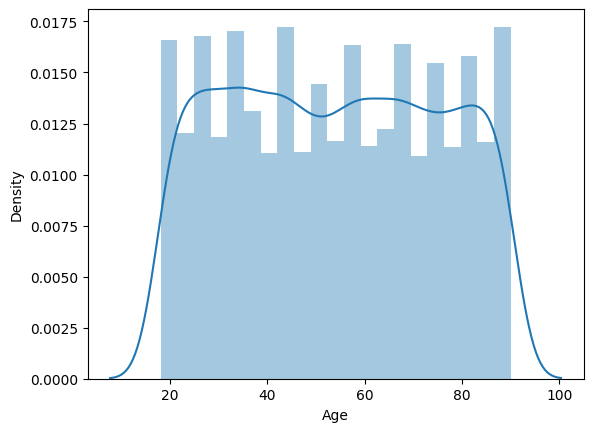

In [1914]:
sns.distplot(df['Age'])

In [1915]:
df['Age'].describe()

count    8763.000000
mean       53.707977
std        21.249509
min        18.000000
25%        35.000000
50%        54.000000
75%        72.000000
max        90.000000
Name: Age, dtype: float64

In [1916]:
buckets = [17, 30, 60, 91]


labels = ['Thanh niên', 'Trung niên',  'Cao tuổi']


discretised_Age = pd.cut(df['Age'], bins=buckets, labels=labels, include_lowest=True)
pd.concat([discretised_Age, df['Age']], axis=1).head(10)


,Age,Age
0,Cao tuổi,67
1,Thanh niên,21
2,Thanh niên,21
3,Cao tuổi,84
4,Cao tuổi,66
5,Trung niên,54
6,Cao tuổi,90
7,Cao tuổi,84
8,Thanh niên,20
9,Trung niên,43


In [1917]:
df['Age'] = discretised_Age
df['Age'].head()

0      Cao tuổi
1    Thanh niên
2    Thanh niên
3      Cao tuổi
4      Cao tuổi
Name: Age, dtype: category
Categories (3, object): ['Thanh niên' < 'Trung niên' < 'Cao tuổi']

(array([0, 1, 2]),
 [Text(0, 0, 'Thanh niên'), Text(1, 0, 'Trung niên'), Text(2, 0, 'Cao tuổi')])

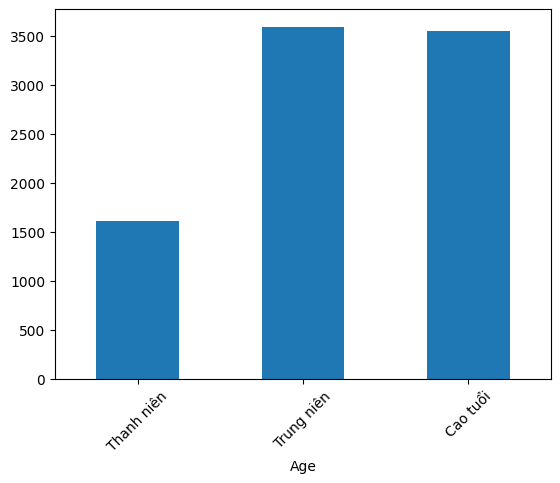

In [1918]:
df.groupby('Age')['Age'].count().plot.bar()
plt.xticks(rotation=45)


Cholesterol

<Axes: xlabel='Cholesterol', ylabel='Density'>

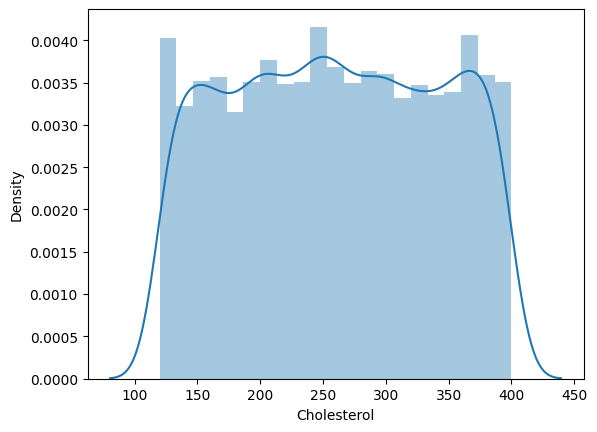

In [1919]:
sns.distplot(df['Cholesterol'])

In [1920]:
df['Cholesterol'].describe()

count    8763.000000
mean      259.877211
std        80.863276
min       120.000000
25%       192.000000
50%       259.000000
75%       330.000000
max       400.000000
Name: Cholesterol, dtype: float64

In [1921]:
buckets = [119, 199, 238, 401]


labels = ['Bình thường',  'Cao', 'Rất cao']


discretised_Cholesterol = pd.cut(df['Cholesterol'], bins=buckets, labels=labels, include_lowest=True)
pd.concat([discretised_Cholesterol, df['Cholesterol']], axis=1).head(10)


,Cholesterol,Cholesterol
0,Cao,208
1,Rất cao,389
2,Rất cao,324
3,Rất cao,383
4,Rất cao,318
5,Rất cao,297
6,Rất cao,358
7,Cao,220
8,Bình thường,145
9,Rất cao,248


In [1922]:
df['Cholesterol'] = discretised_Cholesterol
df['Cholesterol'].head()

0        Cao
1    Rất cao
2    Rất cao
3    Rất cao
4    Rất cao
Name: Cholesterol, dtype: category
Categories (3, object): ['Bình thường' < 'Cao' < 'Rất cao']

(array([0, 1, 2]),
 [Text(0, 0, 'Bình thường'), Text(1, 0, 'Cao'), Text(2, 0, 'Rất cao')])

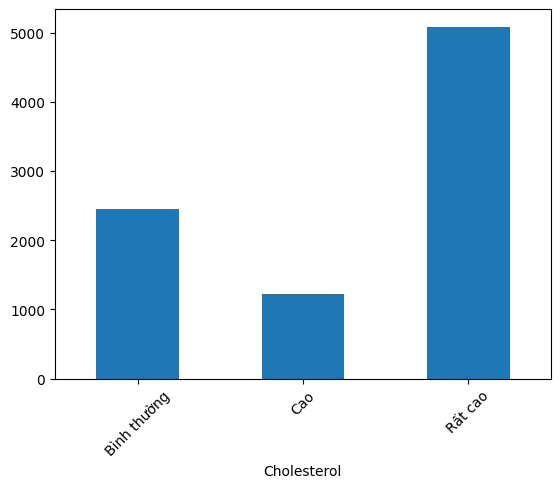

In [1923]:
df.groupby('Cholesterol')['Cholesterol'].count().plot.bar()
plt.xticks(rotation=45)


Systolic Blood Pressure

<Axes: xlabel='Systolic Blood Pressure', ylabel='Density'>

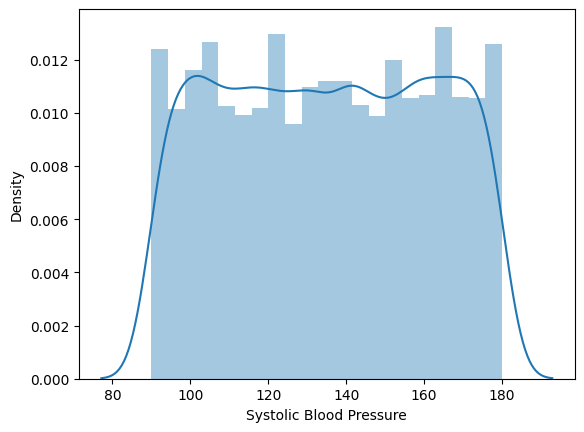

In [1924]:
sns.distplot(df['Systolic Blood Pressure'])

In [1925]:
df['Systolic Blood Pressure'].describe()

count    8763.000000
mean      135.075659
std        26.349976
min        90.000000
25%       112.000000
50%       135.000000
75%       158.000000
max       180.000000
Name: Systolic Blood Pressure, dtype: float64

In [1926]:
buckets = [89, 119, 130, 181]


labels = ['Bình thường',  'Cao', 'Rất cao']


discretised_Systolic = pd.cut(df['Systolic Blood Pressure'], bins=buckets, labels=labels, include_lowest=True)
pd.concat([discretised_Systolic, df['Systolic Blood Pressure']], axis=1).head(10)


,Systolic Blood Pressure,Systolic Blood Pressure
0,Rất cao,158
1,Rất cao,165
2,Rất cao,174
3,Rất cao,163
4,Bình thường,91
5,Rất cao,172
6,Bình thường,102
7,Rất cao,131
8,Rất cao,144
9,Rất cao,160


In [1927]:
df['Systolic Blood Pressure'] = discretised_Systolic
df['Systolic Blood Pressure'].head()

0        Rất cao
1        Rất cao
2        Rất cao
3        Rất cao
4    Bình thường
Name: Systolic Blood Pressure, dtype: category
Categories (3, object): ['Bình thường' < 'Cao' < 'Rất cao']

(array([0, 1, 2]),
 [Text(0, 0, 'Bình thường'), Text(1, 0, 'Cao'), Text(2, 0, 'Rất cao')])

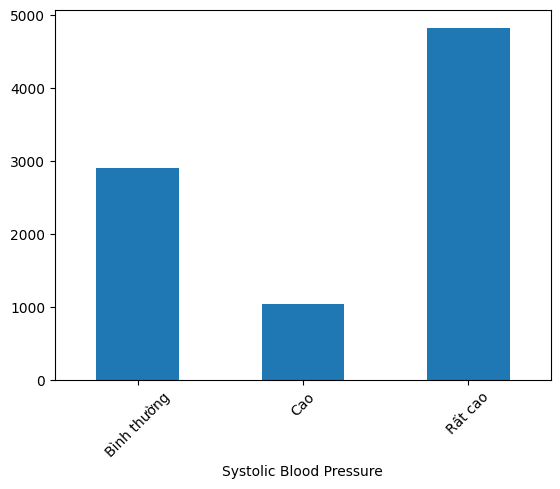

In [1928]:
df.groupby('Systolic Blood Pressure')['Systolic Blood Pressure'].count().plot.bar()
plt.xticks(rotation=45)


Diastolic Blood Pressure

<Axes: xlabel='Diastolic Blood Pressure', ylabel='Density'>

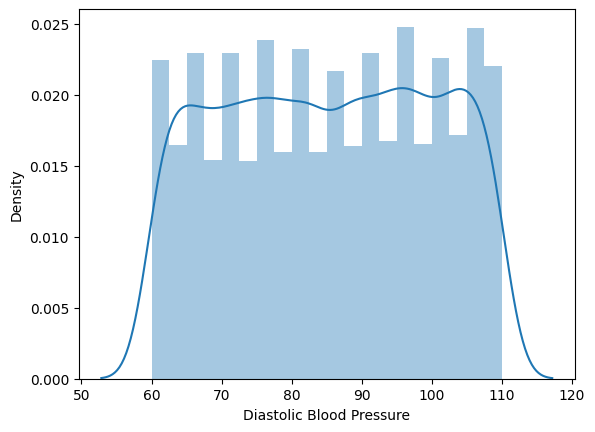

In [1929]:
sns.distplot(df['Diastolic Blood Pressure'])

In [1930]:
df['Diastolic Blood Pressure'].describe()

count    8763.000000
mean       85.156111
std        14.676565
min        60.000000
25%        72.000000
50%        85.000000
75%        98.000000
max       110.000000
Name: Diastolic Blood Pressure, dtype: float64

In [1931]:
buckets = [59, 79, 89, 111]


labels = ['Bình thường',  'Cao', 'Rất cao']


discretised_Diastolic = pd.cut(df['Diastolic Blood Pressure'], bins=buckets, labels=labels, include_lowest=True)
pd.concat([discretised_Diastolic, df['Diastolic Blood Pressure']], axis=1).head(10)


,Diastolic Blood Pressure,Diastolic Blood Pressure
0,Cao,88
1,Rất cao,93
2,Rất cao,99
3,Rất cao,100
4,Cao,88
5,Cao,86
6,Bình thường,73
7,Bình thường,68
8,Rất cao,105
9,Bình thường,70


In [1932]:
df['Diastolic Blood Pressure'] = discretised_Diastolic
df['Diastolic Blood Pressure'].head()

0        Cao
1    Rất cao
2    Rất cao
3    Rất cao
4        Cao
Name: Diastolic Blood Pressure, dtype: category
Categories (3, object): ['Bình thường' < 'Cao' < 'Rất cao']

(array([0, 1, 2]),
 [Text(0, 0, 'Bình thường'), Text(1, 0, 'Cao'), Text(2, 0, 'Rất cao')])

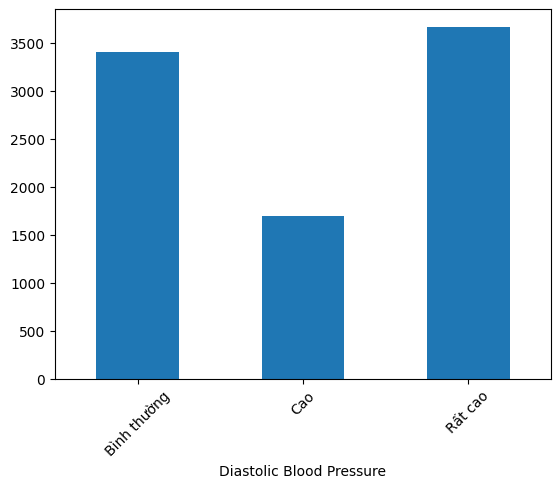

In [1933]:
df.groupby('Diastolic Blood Pressure')['Diastolic Blood Pressure'].count().plot.bar()
plt.xticks(rotation=45)


Heart Rate

<Axes: xlabel='Heart Rate', ylabel='Density'>

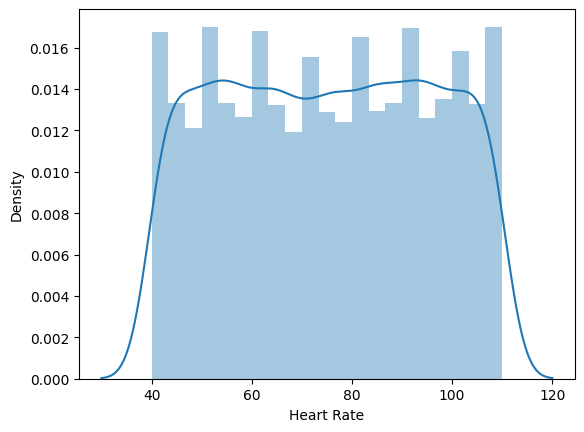

In [1934]:
sns.distplot(df['Heart Rate'])

In [1935]:
df['Heart Rate'].describe()

count    8763.000000
mean       75.021682
std        20.550948
min        40.000000
25%        57.000000
50%        75.000000
75%        93.000000
max       110.000000
Name: Heart Rate, dtype: float64

In [1936]:
buckets = [39, 59, 100, 111]


labels = ['Thấp' , 'Bình thường', 'Cao']


discretised_Rate = pd.cut(df['Heart Rate'], bins=buckets, labels=labels, include_lowest=True)
pd.concat([discretised_Rate, df['Heart Rate']], axis=1).head(10)


,Heart Rate,Heart Rate
0,Bình thường,72
1,Bình thường,98
2,Bình thường,72
3,Bình thường,73
4,Bình thường,93
5,Thấp,48
6,Bình thường,84
7,Cao,107
8,Bình thường,68
9,Thấp,55


In [1937]:
df['Heart Rate'] = discretised_Rate
df['Heart Rate'].head()

0    Bình thường
1    Bình thường
2    Bình thường
3    Bình thường
4    Bình thường
Name: Heart Rate, dtype: category
Categories (3, object): ['Thấp' < 'Bình thường' < 'Cao']

(array([0, 1, 2]),
 [Text(0, 0, 'Thấp'), Text(1, 0, 'Bình thường'), Text(2, 0, 'Cao')])

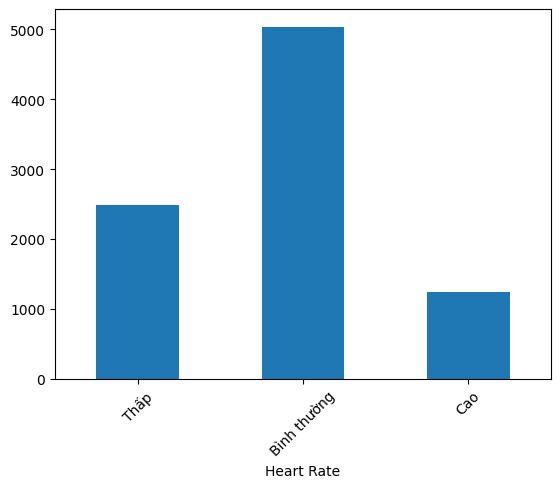

In [1938]:
df.groupby('Heart Rate')['Heart Rate'].count().plot.bar()
plt.xticks(rotation=45)


BMI

<Axes: xlabel='BMI', ylabel='Density'>

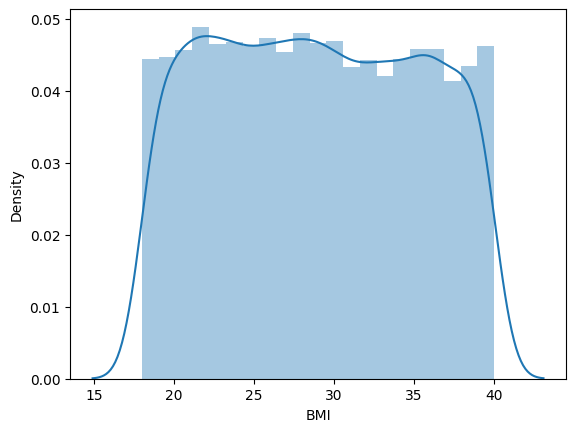

In [1939]:
sns.distplot(df['BMI'])

In [1940]:
df['BMI'].describe()

count    8763.000000
mean       28.891446
std         6.319181
min        18.002337
25%        23.422985
50%        28.768999
75%        34.324594
max        39.997211
Name: BMI, dtype: float64

In [1941]:
buckets = [18, 24.9, 29, 40]


labels = ['Bình thường', 'Thừa cân', 'Béo phì']


discretised_bmi = pd.cut(df['BMI'], bins=buckets, labels=labels, include_lowest=True)
pd.concat([discretised_bmi, df['BMI']], axis=1).head(10)


,BMI,BMI
0,Béo phì,31.251233
1,Thừa cân,27.194973
2,Thừa cân,28.176571
3,Béo phì,36.464704
4,Bình thường,21.809144
5,Bình thường,20.146840
6,Thừa cân,28.885811
7,Bình thường,22.221862
8,Béo phì,35.809901
9,Bình thường,22.558917


In [1942]:
df['BMI'] = discretised_bmi
df['BMI'].head()

0        Béo phì
1       Thừa cân
2       Thừa cân
3        Béo phì
4    Bình thường
Name: BMI, dtype: category
Categories (3, object): ['Bình thường' < 'Thừa cân' < 'Béo phì']

(array([0, 1, 2]),
 [Text(0, 0, 'Bình thường'), Text(1, 0, 'Thừa cân'), Text(2, 0, 'Béo phì')])

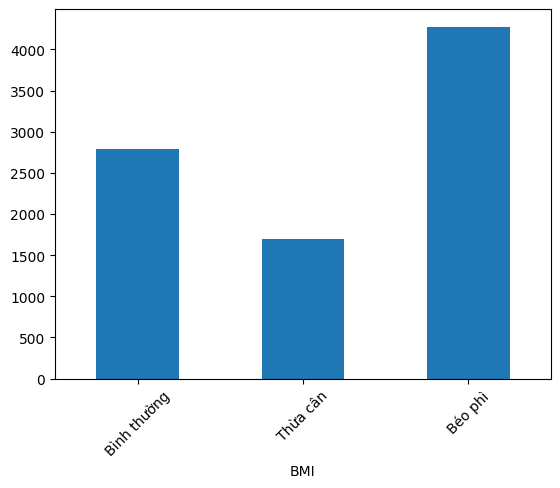

In [1943]:
df.groupby('BMI')['BMI'].count().plot.bar()
plt.xticks(rotation=45)


stress level

<Axes: xlabel='Stress Level', ylabel='Density'>

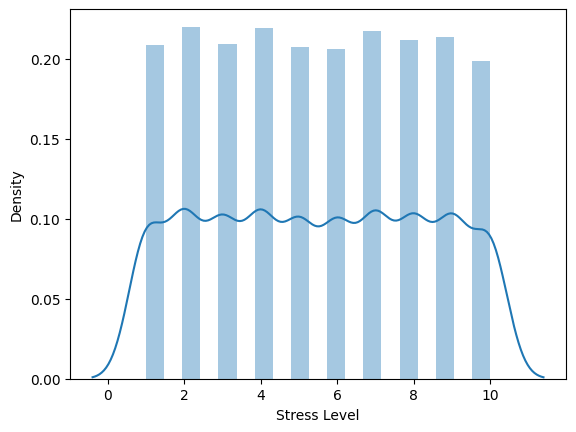

In [1944]:
sns.distplot(df['Stress Level'])

In [1945]:
df['Stress Level'].describe()

count    8763.000000
mean        5.469702
std         2.859622
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Stress Level, dtype: float64

In [1946]:
buckets = [0, 3, 6, 10]


labels = ['bình thường', 'cao', 'rất cao']


df['Stress Level'] = pd.cut(df['Stress Level'], bins=buckets, labels=labels, include_lowest=True)

df['Stress Level'].head()


0        rất cao
1    bình thường
2        rất cao
3        rất cao
4            cao
Name: Stress Level, dtype: category
Categories (3, object): ['bình thường' < 'cao' < 'rất cao']

(array([0, 1, 2]),
 [Text(0, 0, 'bình thường'), Text(1, 0, 'cao'), Text(2, 0, 'rất cao')])

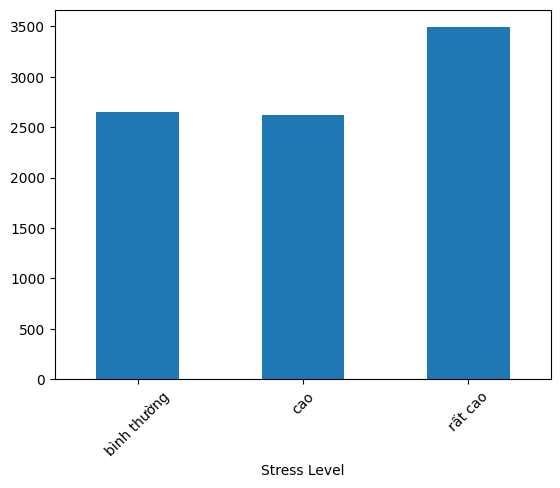

In [1947]:
df.groupby('Stress Level')['Stress Level'].count().plot.bar()
plt.xticks(rotation=45)


Activity_Balance_Index

In [1948]:
df['Activity_Balance_Index'] = ((df['Exercise Hours Per Week']/7) + (df['Physical Activity Days Per Week']*24)/7) / (df['Sedentary Hours Per Day']+df['Sleep Hours Per Day'])
df['Activity_Balance_Index'].describe()

count    8763.000000
mean        1.155530
std         0.855383
min         0.000052
25%         0.511264
50%         1.021044
75%         1.591378
max         6.457430
Name: Activity_Balance_Index, dtype: float64

<Axes: xlabel='Activity_Balance_Index', ylabel='Density'>

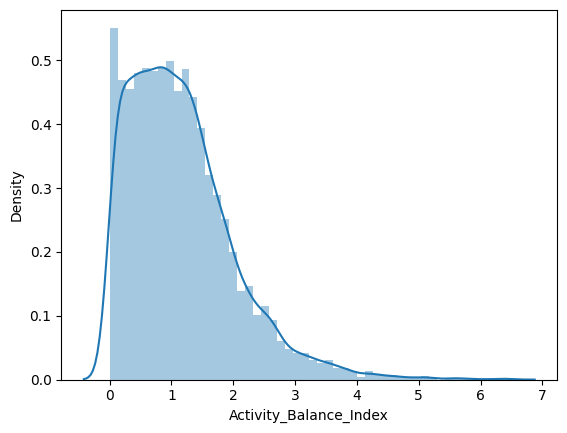

In [1949]:
sns.distplot(df['Activity_Balance_Index'])

In [1950]:
buckets = [0, 0.49, 1.5, 7]


labels = ['thấp', 'bình thường', 'cao']


discretised_abi = pd.cut(df['Activity_Balance_Index'], bins=buckets, labels=labels, include_lowest=True)
pd.concat([discretised_abi, df['Activity_Balance_Index']], axis=1).head(10)


,Activity_Balance_Index,Activity_Balance_Index
0,thấp,0.047202
1,thấp,0.308239
2,bình thường,1.040686
3,bình thường,1.003498
4,bình thường,0.653549
5,bình thường,0.968166
6,bình thường,1.345559
7,bình thường,1.200490
8,cao,1.720641
9,cao,2.173454


In [1951]:
df['Activity_Balance_Index'] = discretised_abi
df['Activity_Balance_Index'].head()

0           thấp
1           thấp
2    bình thường
3    bình thường
4    bình thường
Name: Activity_Balance_Index, dtype: category
Categories (3, object): ['thấp' < 'bình thường' < 'cao']

(array([0, 1, 2]),
 [Text(0, 0, 'thấp'), Text(1, 0, 'bình thường'), Text(2, 0, 'cao')])

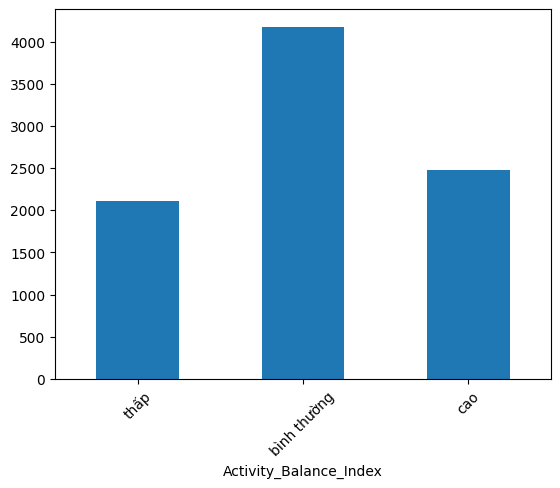

In [1952]:
df.groupby('Activity_Balance_Index')['Activity_Balance_Index'].count().plot.bar()
plt.xticks(rotation=45)


Triglycerides

<Axes: xlabel='Triglycerides', ylabel='Density'>

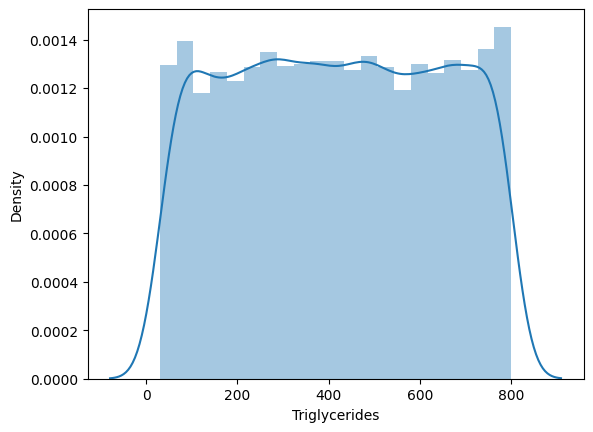

In [1953]:
sns.distplot(df['Triglycerides'])

In [1954]:
df['Triglycerides'].describe()

count    8763.000000
mean      417.677051
std       223.748137
min        30.000000
25%       225.500000
50%       417.000000
75%       612.000000
max       800.000000
Name: Triglycerides, dtype: float64

In [1955]:
buckets = [29, 149, 199, 801]


labels = ['Bình thường',  'Cao', 'Rất cao']


discretised_Triglycerides = pd.cut(df['Triglycerides'], bins=buckets, labels=labels, include_lowest=True)
pd.concat([discretised_Triglycerides, df['Triglycerides']], axis=1).head(10)


,Triglycerides,Triglycerides
0,Rất cao,286
1,Rất cao,235
2,Rất cao,587
3,Rất cao,378
4,Rất cao,231
5,Rất cao,795
6,Rất cao,284
7,Rất cao,370
8,Rất cao,790
9,Rất cao,232


In [1956]:
df['Triglycerides'] = discretised_Triglycerides
df['Triglycerides'].head()

0    Rất cao
1    Rất cao
2    Rất cao
3    Rất cao
4    Rất cao
Name: Triglycerides, dtype: category
Categories (3, object): ['Bình thường' < 'Cao' < 'Rất cao']

(array([0, 1, 2]),
 [Text(0, 0, 'Bình thường'), Text(1, 0, 'Cao'), Text(2, 0, 'Rất cao')])

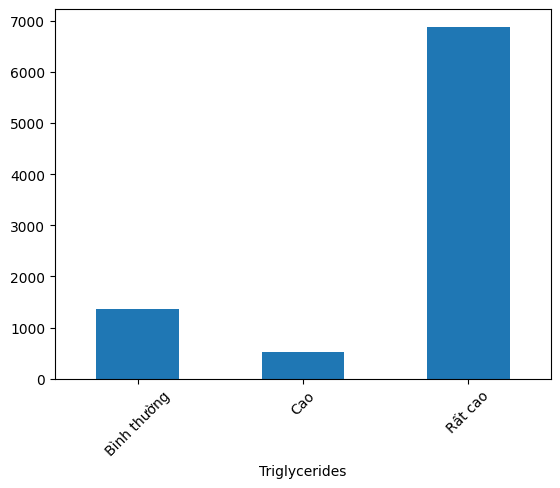

In [1957]:
df.groupby('Triglycerides')['Triglycerides'].count().plot.bar()
plt.xticks(rotation=45)


In [1958]:
df

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic Blood Pressure,Diastolic Blood Pressure,Activity_Balance_Index
0,Cao tuổi,Male,Cao,Bình thường,0,0,1,0,0,4.168189,...,Rất cao,0,6,Argentina,South America,Southern Hemisphere,0,Rất cao,Cao,thấp
1,Thanh niên,Male,Rất cao,Bình thường,1,1,1,1,1,1.813242,...,Rất cao,1,7,Canada,North America,Northern Hemisphere,0,Rất cao,Rất cao,thấp
2,Thanh niên,Female,Rất cao,Bình thường,1,0,0,0,0,2.078353,...,Rất cao,4,4,France,Europe,Northern Hemisphere,0,Rất cao,Rất cao,bình thường
3,Cao tuổi,Male,Rất cao,Bình thường,1,1,1,0,1,9.828130,...,Rất cao,3,4,Canada,North America,Northern Hemisphere,0,Rất cao,Rất cao,bình thường
4,Cao tuổi,Male,Rất cao,Bình thường,1,1,1,1,0,5.804299,...,Rất cao,1,5,Thailand,Asia,Northern Hemisphere,0,Bình thường,Cao,bình thường
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,Trung niên,Male,Bình thường,Bình thường,1,1,1,0,1,7.917342,...,Bình thường,7,7,Thailand,Asia,Northern Hemisphere,0,Bình thường,Bình thường,bình thường
8759,Thanh niên,Female,Bình thường,Bình thường,1,0,0,1,0,16.558426,...,Rất cao,4,9,Canada,North America,Northern Hemisphere,0,Rất cao,Rất cao,bình thường
8760,Trung niên,Male,Rất cao,Cao,0,1,1,1,1,3.148438,...,Rất cao,4,4,Brazil,South America,Southern Hemisphere,1,Rất cao,Bình thường,cao
8761,Trung niên,Male,Bình thường,Bình thường,1,0,1,0,0,3.789950,...,Bình thường,2,8,Brazil,South America,Southern Hemisphere,0,Bình thường,Bình thường,bình thường


##### Chuẩn hóa chữ về dạng số

In [1959]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Age                              8763 non-null   category
 1   Sex                              8763 non-null   object  
 2   Cholesterol                      8763 non-null   category
 3   Heart Rate                       8763 non-null   category
 4   Diabetes                         8763 non-null   int64   
 5   Family History                   8763 non-null   int64   
 6   Smoking                          8763 non-null   int64   
 7   Obesity                          8763 non-null   int64   
 8   Alcohol Consumption              8763 non-null   int64   
 9   Exercise Hours Per Week          8763 non-null   float64 
 10  Diet                             8763 non-null   object  
 11  Previous Heart Problems          8763 non-null   int64   
 12  Medica

Age

In [1960]:
df.groupby(['Age'])['Heart Attack Risk'].mean().sort_values()

Age
Trung niên    0.351697
Thanh niên    0.361610
Cao tuổi      0.363253
Name: Heart Attack Risk, dtype: float64

In [1961]:
ordered_cats = df.groupby(['Age'])['Heart Attack Risk'].mean().sort_values().index
cat_map= {k: i for i, k in enumerate(ordered_cats, 0)}
df['Age'] = df['Age'].map(cat_map).astype(int)

Sex

In [1962]:
df.groupby(['Sex'])['Heart Attack Risk'].mean().sort_values()

Sex
Female    0.355958
Male      0.359188
Name: Heart Attack Risk, dtype: float64

In [1963]:
ordered_cats = df.groupby(['Sex'])['Heart Attack Risk'].mean().sort_values().index
cat_map= {k: i for i, k in enumerate(ordered_cats, 0)}
df['Sex'] = df['Sex'].map(cat_map)

Country

In [1964]:
df.groupby(['Country'])['Heart Attack Risk'].mean().sort_values()

Country
India             0.313107
Italy             0.315545
Japan             0.332564
South Africa      0.338824
New Zealand       0.347126
Vietnam           0.348235
Spain             0.348837
United Kingdom    0.350109
France            0.352018
Brazil            0.352814
China             0.355505
Canada            0.359091
Germany           0.360587
Argentina         0.369427
Australia         0.374165
Thailand          0.376168
Colombia          0.377622
United States     0.395238
Nigeria           0.397321
South Korea       0.398533
Name: Heart Attack Risk, dtype: float64

In [1965]:
ordered_cats = df.groupby(['Country'])['Heart Attack Risk'].mean().sort_values().index
cat_map= {k: i for i, k in enumerate(ordered_cats, 0)}
df['Country'] = df['Country'].map(cat_map)

Continent

In [1966]:
df.groupby(['Continent'])['Heart Attack Risk'].mean().sort_values()

Continent
Europe           0.345828
Asia             0.353913
Australia        0.360860
South America    0.366373
Africa           0.368843
North America    0.376744
Name: Heart Attack Risk, dtype: float64

In [1967]:
ordered_cats = df.groupby(['Continent'])['Heart Attack Risk'].mean().sort_values().index
cat_map= {k: i for i, k in enumerate(ordered_cats, 0)}
df['Continent'] = df['Continent'].map(cat_map)

Hemisphere

In [1968]:
df.groupby(['Hemisphere'])['Heart Attack Risk'].mean().sort_values()

Hemisphere
Southern Hemisphere    0.349984
Northern Hemisphere    0.362721
Name: Heart Attack Risk, dtype: float64

In [1969]:
ordered_cats = df.groupby(['Hemisphere'])['Heart Attack Risk'].mean().sort_values().index
cat_map= {k: i for i, k in enumerate(ordered_cats, 0)}
df['Hemisphere'] = df['Hemisphere'].map(cat_map)

Cholesterol

In [1970]:
# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder

custom_order = ['Bình thường', 'Cao	', 'Rất cao']

# Khởi tạo LabelEncoder với thứ tự đã chỉ định
le = LabelEncoder()
le.classes_ = custom_order

le.fit(df['Cholesterol'])

df['Cholesterol'] = le.transform(df['Cholesterol'])


Diet

In [1971]:
# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder

custom_order = ['Healthy', 'Average', 'Unhealthy']

# Khởi tạo LabelEncoder với thứ tự đã chỉ định
le = LabelEncoder()
le.classes_ = custom_order

le.fit(df['Diet'])

df['Diet'] = le.transform(df['Diet'])


Heart Rate

In [1972]:
# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder

custom_order = ['Bình thường', 'Thấp', 'Cao']

# Khởi tạo LabelEncoder với thứ tự đã chỉ định
le = LabelEncoder()
le.classes_ = custom_order

le.fit(df['Heart Rate'])

df['Heart Rate'] = le.transform(df['Heart Rate'])


BMI

In [1973]:
# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder

custom_order = ['Bình thường', 'Thừa cân', 'Béo phì']

# Khởi tạo LabelEncoder với thứ tự đã chỉ định
le = LabelEncoder()
le.classes_ = custom_order

le.fit(df['BMI'])

df['BMI'] = le.transform(df['BMI'])


stress level

In [1974]:
# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder

custom_order = ['bình thường', 'cao', 'rất cao']

# Khởi tạo LabelEncoder với thứ tự đã chỉ định
le = LabelEncoder()
le.classes_ = custom_order

le.fit(df['Stress Level'])

df['Stress Level'] = le.transform(df['Stress Level'])


Activity_Balance_Index

In [1975]:
# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder

custom_order = ['bình thường', 'cao', 'thấp']

# Khởi tạo LabelEncoder với thứ tự đã chỉ định
le = LabelEncoder()
le.classes_ = custom_order

le.fit(df['Activity_Balance_Index'])

df['Activity_Balance_Index'] = le.transform(df['Activity_Balance_Index'])


Triglycerides

In [1976]:
# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder

custom_order = ['Bình thường', 'Cao', 'Rất cao']

# Khởi tạo LabelEncoder với thứ tự đã chỉ định
le = LabelEncoder()
le.classes_ = custom_order

le.fit(df['Triglycerides'])

df['Triglycerides'] = le.transform(df['Triglycerides'])


Systolic Blood Pressure

In [1977]:
# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder

custom_order = ['Bình thường', 'Cao', 'Rất cao']

# Khởi tạo LabelEncoder với thứ tự đã chỉ định
le = LabelEncoder()
le.classes_ = custom_order

le.fit(df['Systolic Blood Pressure'])

df['Systolic Blood Pressure'] = le.transform(df['Systolic Blood Pressure'])


Diastolic Blood Pressure

In [1978]:
# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder

custom_order = ['Bình thường', 'Cao', 'Rất cao']

# Khởi tạo LabelEncoder với thứ tự đã chỉ định
le = LabelEncoder()
le.classes_ = custom_order

le.fit(df['Diastolic Blood Pressure'])

df['Diastolic Blood Pressure'] = le.transform(df['Diastolic Blood Pressure'])


In [1979]:
df

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic Blood Pressure,Diastolic Blood Pressure,Activity_Balance_Index
0,2,1,1,0,0,0,1,0,0,4.168189,...,2,0,6,13,3,0,0,2,1,2
1,1,1,2,0,1,1,1,1,1,1.813242,...,2,1,7,11,5,1,0,2,2,2
2,1,0,2,0,1,0,0,0,0,2.078353,...,2,4,4,8,0,1,0,2,2,0
3,2,1,2,0,1,1,1,0,1,9.828130,...,2,3,4,11,5,1,0,2,2,0
4,2,1,2,0,1,1,1,1,0,5.804299,...,2,1,5,15,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,0,1,0,0,1,1,1,0,1,7.917342,...,0,7,7,15,1,1,0,0,0,0
8759,1,0,0,0,1,0,0,1,0,16.558426,...,2,4,9,11,5,1,0,2,2,0
8760,0,1,2,1,0,1,1,1,1,3.148438,...,2,4,4,9,3,0,1,2,0,1
8761,0,1,0,0,1,0,1,0,0,3.789950,...,0,2,8,9,3,0,0,0,0,0


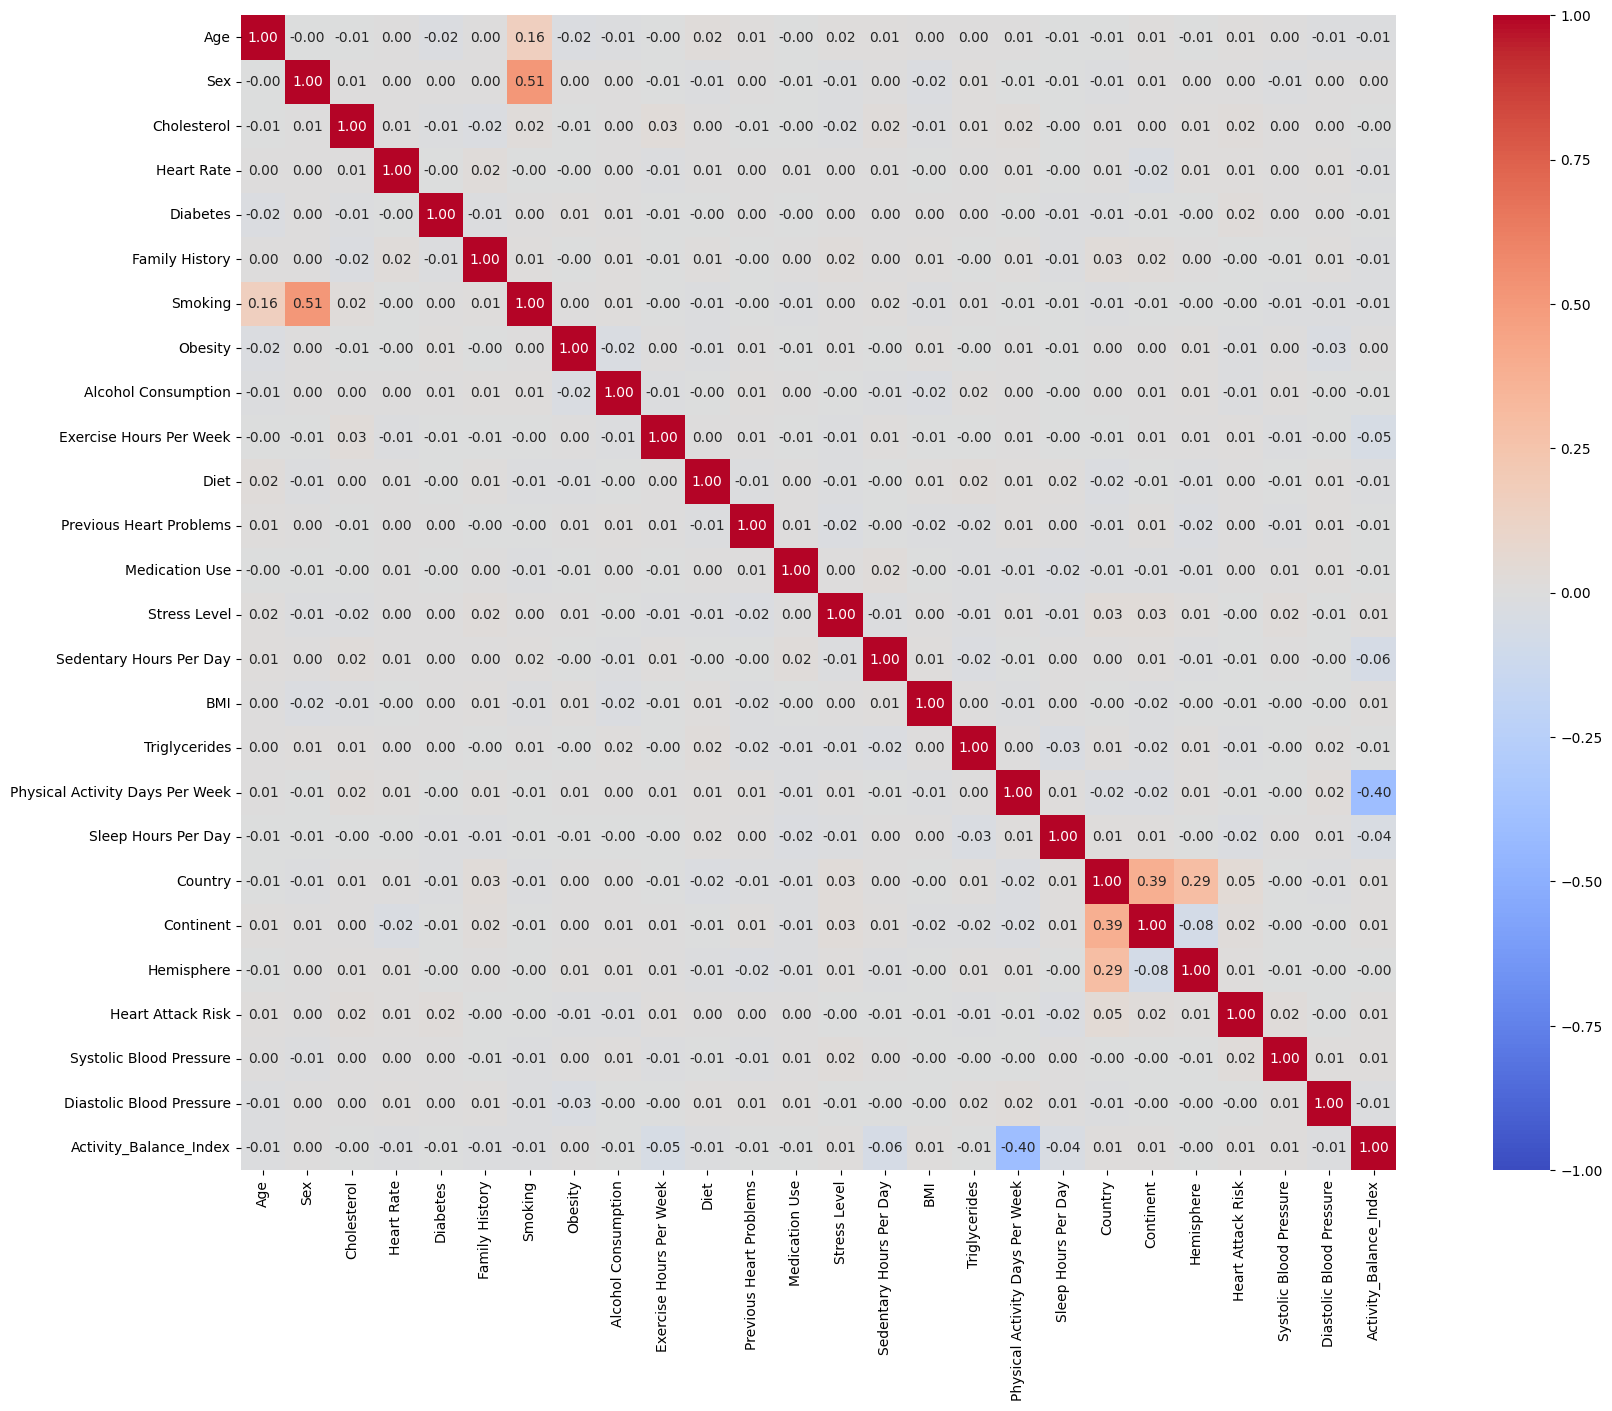

In [1980]:

plt.figure(figsize=(25, 15))  # Kích thước 25x15 inch
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", square=True, cmap='coolwarm')  # Sử dụng bảng màu 'coolwarm'
plt.show()


**các đặc trưng không có sự tương quan mạnh với nhau và có thể làm hiệu suất mô hình giảm nên em tạo thêm đặc trưng mới được kết hợp từ các đặc trưng có sẵn để tăng hiệu suất mô hình** 

In [1981]:
# Chọn các đặc trưng bạn muốn cộng
selected_features = ['Age','Cholesterol', 'Heart Rate', 
                      'Diet', 
                     'Stress Level', 'BMI', 'Triglycerides',
                     'Systolic Blood Pressure', 'Diastolic Blood Pressure','Activity_Balance_Index']

# Tạo một đặc trưng mới là tổng của các đặc trưng đã chọn
df['Chỉ số sức khỏe'] = df[selected_features].sum(axis=1) / len(selected_features)
# Chọn các đặc trưng bạn muốn cộng
df['Medication Use']=1-df['Medication Use']
selected_features = ['Sex','Diabetes', 'Family History', 'Smoking', 'Obesity',
                     'Alcohol Consumption',  'Previous Heart Problems' ,'Medication Use']

# Tạo một đặc trưng mới là tổng của các đặc trưng đã chọn
df['lối sống'] = df[selected_features].sum(axis=1) / len(selected_features)

# Nhân đôi chỉ số "risk level" khi "Cholesterol" có giá trị là 2
# df['risk level'] += df['Cholesterol'].apply(lambda x: x * 2 if x == 2 else 0)
# Chọn các đặc trưng bạn muốn cộng
# selected_features = ['Country',	'Continent'	,'Hemisphere']

# Tạo một đặc trưng mới là tổng của các đặc trưng đã chọn
df['môi tường sống'] = ((df['Country'])+(df['Continent'])+df['Hemisphere'])/3

df


,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Country,Continent,Hemisphere,Heart Attack Risk,Systolic Blood Pressure,Diastolic Blood Pressure,Activity_Balance_Index,Chỉ số sức khỏe,lối sống,môi tường sống
0,2,1,1,0,0,0,1,0,0,4.168189,...,13,3,0,0,2,1,2,1.2,0.375,5.333333
1,1,1,2,0,1,1,1,1,1,1.813242,...,11,5,1,0,2,2,2,1.5,1.000,5.666667
2,1,0,2,0,1,0,0,0,0,2.078353,...,8,0,1,0,2,2,0,1.4,0.250,3.000000
3,2,1,2,0,1,1,1,0,1,9.828130,...,11,5,1,0,2,2,0,1.2,0.875,5.666667
4,2,1,2,0,1,1,1,1,0,5.804299,...,15,1,1,0,0,1,0,1.1,0.875,5.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,0,1,0,0,1,1,1,0,1,7.917342,...,15,1,1,0,0,0,0,0.4,0.750,5.666667
8759,1,0,0,0,1,0,0,1,0,16.558426,...,11,5,1,0,2,2,0,1.1,0.375,5.666667
8760,0,1,2,1,0,1,1,1,1,3.148438,...,9,3,0,1,2,0,1,0.9,0.875,4.000000
8761,0,1,0,0,1,0,1,0,0,3.789950,...,9,3,0,0,0,0,0,0.5,0.500,4.000000


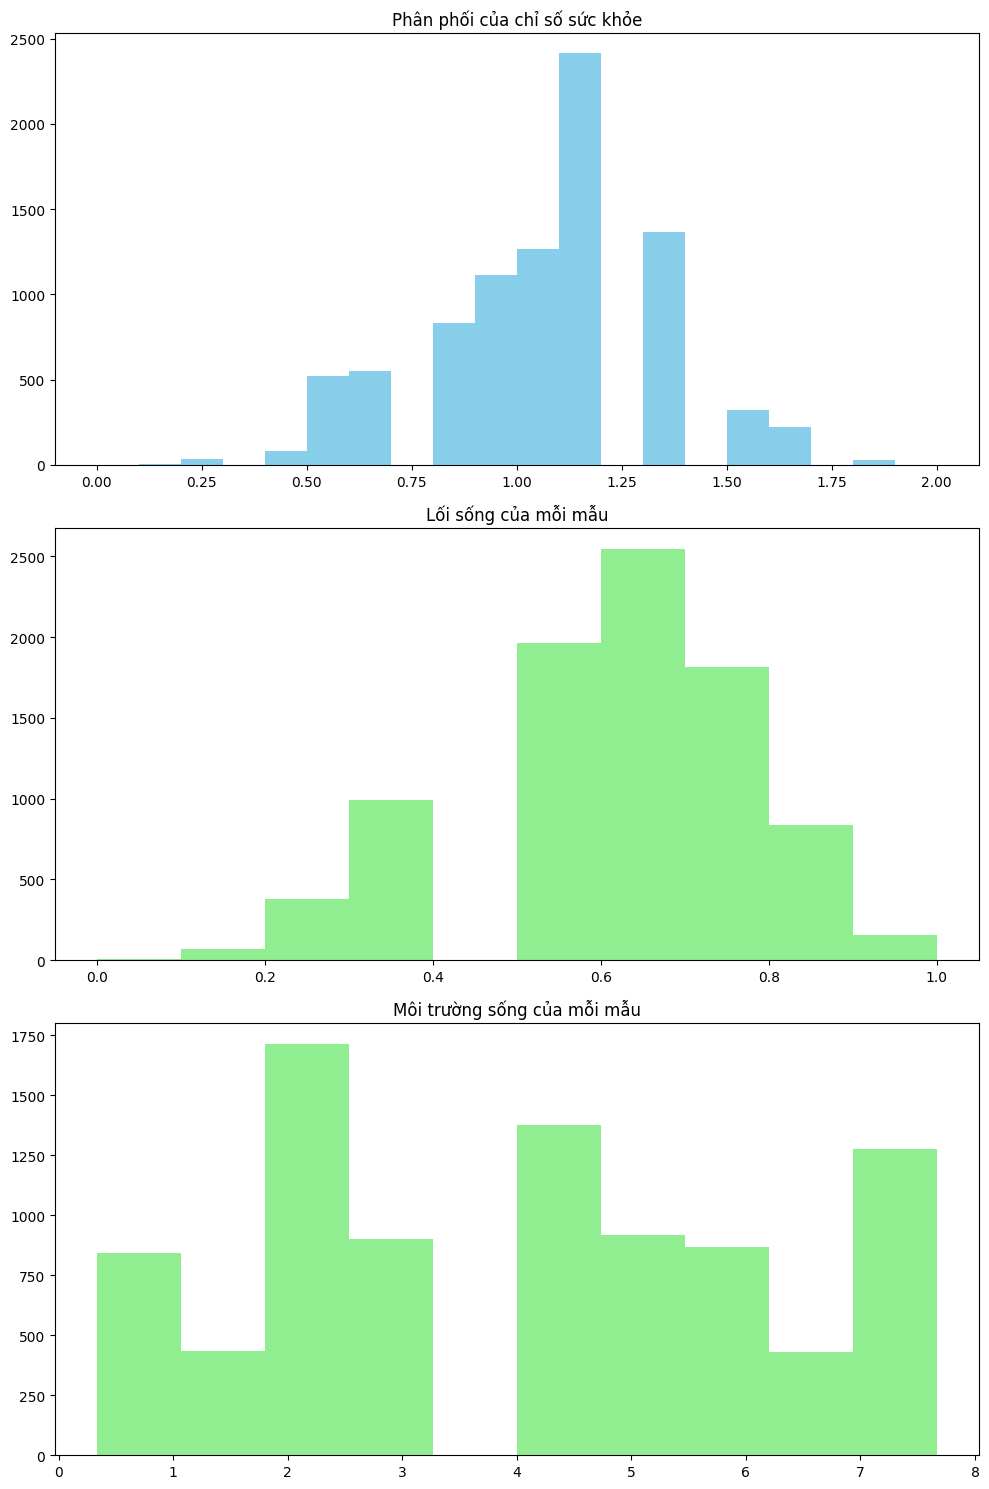

In [1982]:
import matplotlib.pyplot as plt

# Tạo subplot cho các cột mới
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Trực quan hóa chỉ số sức khỏe
axes[0].hist(df['Chỉ số sức khỏe'], bins=20, color='skyblue')
axes[0].set_title('Phân phối của chỉ số sức khỏe')

# Trực quan hóa môi trường sống
axes[1].hist(df['lối sống'], color='lightgreen')
axes[1].set_title('Lối sống của mỗi mẫu')

# Trực quan hóa môi trường sống
axes[2].hist(df['môi tường sống'], color='lightgreen')
axes[2].set_title('Môi trường sống của mỗi mẫu')
plt.tight_layout()
plt.show()


In [1983]:
df[['Chỉ số sức khỏe','lối sống','môi tường sống']].describe()

,Chỉ số sức khỏe,lối sống,môi tường sống
count,8763.000000,8763.000000,8763.000000
mean,1.045087,0.604559,4.008635
std,0.269044,0.173953,2.216110
min,0.000000,0.000000,0.333333
25%,0.900000,0.500000,2.333333
50%,1.000000,0.625000,4.000000
75%,1.200000,0.750000,5.666667
max,2.000000,1.000000,7.666667


In [1984]:
df["Heart Attack Risk"].value_counts()

0    5624
1    3139
Name: Heart Attack Risk, dtype: int64

In [1985]:
(3139/5629)*2

1.1152957896606857

In [1986]:
(3139/5629)*1

0.5576478948303428

In [1987]:
(3139/5629)*8

4.461183158642743

In [1988]:
# import pandas as pd

# class HeartRiskAssessment:
#     def __init__(self, risk_level,loisong,risk_place, heart_attack_risk):
#         self.risk_level = risk_level
#         self.heart_attack_risk = heart_attack_risk
#         self.risk_place=risk_place
#         self.loisong=loisong
#     def calculate_risk_score(self):
        
#         # Tính toán điểm rủi ro
#         risk_score = self.risk_level+self.loisong + self.risk_place/3
#         return risk_score

#     def assess_risk_level(self):
#         risk_score = self.calculate_risk_score()
#         heart_attack_risk=self.heart_attack_risk
#         # Xác định mức độ rủi ro dựa trên điểm rủi ro
#         if heart_attack_risk == 0 and 0<=risk_score<=1.1 :
#             return 0
#         elif heart_attack_risk == 0 and 1.1 < risk_score <= 2.2:
#             return 1
#         elif heart_attack_risk == 1 and 2.2 < risk_score <= 3.1:
#             return 2
#         elif heart_attack_risk == 1 and risk_score>3.1:
#             return 3




# # Áp dụng HeartRiskAssessment cho từng hàng và thêm kết quả vào cột 'new'
# df['mức độ nguy cơ'] = df.apply(lambda row: HeartRiskAssessment(row['Chỉ số sức khỏe'],row['lối sống'],row['môi tường sống'], row['Heart Attack Risk']).assess_risk_level(), axis=1)

# print(df)


In [1989]:
import pandas as pd

class HeartRiskAssessment:
    def __init__(self, risk_level,loisong,risk_place, heart_attack_risk):
        self.risk_level = risk_level
        self.heart_attack_risk = heart_attack_risk
        self.risk_place=risk_place
        self.loisong=loisong
    def calculate_risk_score(self):
        heart_attack_risk=self.heart_attack_risk
        # Tính toán điểm rủi ro
        risk_level = self.risk_level
        loisong=self.loisong 
        risk_place=self.risk_place
         # Xác định mức độ rủi ro dựa trên điểm rủi ro
        if heart_attack_risk == 0 and (0<=risk_level<=0.53 and 0<=loisong<=0.279 and 0<=risk_place<=2.1375) :
            return 0
        elif heart_attack_risk == 0 and ((0<=risk_level<=0.53 and 0<=loisong<=0.279)or(0<=loisong<=0.279 and 0<=risk_place<=2.1375)or(0<=risk_level<=0.53 and 0<=risk_place<=2.1375)):
            return 1
        elif heart_attack_risk == 0 and (0<=risk_level<=0.53 or 0<=loisong<=0.279 or 0<=risk_place<=2.1375):
            if (1.05<=risk_level<=1.475 or 0.558<=loisong<=0.779 or 4.275<=risk_place<=5.971) and (risk_level>1.475 or loisong>0.779 or risk_place>5.971):
                return None
            else:
                return 2
        elif heart_attack_risk == 0 and (0.53<=risk_level<=1.05 and 0.279<=loisong<=0.558 and 2.1375<=risk_place<=4.275) :
            return 3
        elif heart_attack_risk == 0 and ((0.53<=risk_level<=1.05 and 0.279<=loisong<=0.558)or(2.1375<=loisong<=0.558 and 2.1375<=risk_place<=4.275)or(0.53<=risk_level<=1.05 and 2.1375<=risk_place<=4.275 )):
            return 4
        elif heart_attack_risk == 0 and (0.53<=risk_level<=1.05 or 0.279<=loisong<=0.558 or 2.1375<=risk_place<=4.275):
            if (1.05<=risk_level<=1.475 or 0.558<=loisong<=0.779 or 4.275<=risk_place<=5.971) and (risk_level>1.475 or loisong>0.779 or risk_place>5.971):
                return None
            else:
                return 5
        elif heart_attack_risk == 1 and (1.05<=risk_level<=1.475 or 0.558<=loisong<=0.779 or 4.275<=risk_place<=5.971):
            return 6
        
        elif heart_attack_risk == 1 and ((1.05<=risk_level<=1.475 and 0.558<=loisong<=0.779)or(0.558<=loisong<=0.779 and 4.275<=risk_place<=5.971)or(1.05<=risk_level<=1.475 and 4.275<=risk_place<=5.971 )):
            return 7
        elif heart_attack_risk == 1 and (1.05<=risk_level<=1.475 and 0.558<=loisong<=0.779 and 4.275<=risk_place<=5.971) :
            return 8
        elif heart_attack_risk == 1 and (risk_level>1.475 or loisong>0.779 or risk_place>5.971):
            return 9
        elif heart_attack_risk == 1 and ((risk_level>1.475 and loisong>0.779)or(loisong>0.779 and risk_place>5.971)or(risk_level>1.475 and risk_place>5.971)):
            return 10
        elif heart_attack_risk == 1 and (risk_level>1.475 and loisong>0.779 and risk_place>5.971):
            return 11
        # if heart_attack_risk == 0 and (0<=risk_level<=1.05 and 0<=loisong<=0.558 and 0<=risk_place<=4.275) :
        #     return 0
        # elif heart_attack_risk == 0 and ((0<=risk_level<=1.05 and 0<=loisong<=0.558)or(0<=loisong<=0.558 and 0<=risk_place<=4.275)or(0<=risk_level<=1.05 and 0<=risk_place<=4.275 )):
        #     return 1
        # elif heart_attack_risk == 0 and (0<=risk_level<=1.05 or 0<=loisong<=0.558 or 0<=risk_place<=4.275):
        #     return 2
        # elif heart_attack_risk == 1 and (risk_level>1.05 or loisong>0.558 or risk_place>4.275):
        #     return 3
        # elif heart_attack_risk == 1 and ((risk_level>1.05 and loisong>0.558)or(loisong>0.558 and risk_place>4.275)or(risk_level>1.05 and risk_place>4.275)):
        #     return 4
        # elif heart_attack_risk == 1 and (risk_level>1.05 and loisong>0.558 and risk_place>4.275):
        #     return 5
        

    




# Áp dụng HeartRiskAssessment cho từng hàng và thêm kết quả vào cột 'new'
df['mức độ nguy cơ'] = df.apply(lambda row: HeartRiskAssessment(row['Chỉ số sức khỏe'],row['lối sống'],row['môi tường sống'], row['Heart Attack Risk']).calculate_risk_score(), axis=1)

df


,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Continent,Hemisphere,Heart Attack Risk,Systolic Blood Pressure,Diastolic Blood Pressure,Activity_Balance_Index,Chỉ số sức khỏe,lối sống,môi tường sống,mức độ nguy cơ
0,2,1,1,0,0,0,1,0,0,4.168189,...,3,0,0,2,1,2,1.2,0.375,5.333333,5.0
1,1,1,2,0,1,1,1,1,1,1.813242,...,5,1,0,2,2,2,1.5,1.000,5.666667,NaN
2,1,0,2,0,1,0,0,0,0,2.078353,...,0,1,0,2,2,0,1.4,0.250,3.000000,2.0
3,2,1,2,0,1,1,1,0,1,9.828130,...,5,1,0,2,2,0,1.2,0.875,5.666667,NaN
4,2,1,2,0,1,1,1,1,0,5.804299,...,1,1,0,0,1,0,1.1,0.875,5.666667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,0,1,0,0,1,1,1,0,1,7.917342,...,1,1,0,0,0,0,0.4,0.750,5.666667,2.0
8759,1,0,0,0,1,0,0,1,0,16.558426,...,5,1,0,2,2,0,1.1,0.375,5.666667,5.0
8760,0,1,2,1,0,1,1,1,1,3.148438,...,3,0,1,2,0,1,0.9,0.875,4.000000,9.0
8761,0,1,0,0,1,0,1,0,0,3.789950,...,3,0,0,0,0,0,0.5,0.500,4.000000,2.0


In [1990]:
df.isnull().sum()

Age                                   0
Sex                                   0
Cholesterol                           0
Heart Rate                            0
Diabetes                              0
Family History                        0
Smoking                               0
Obesity                               0
Alcohol Consumption                   0
Exercise Hours Per Week               0
Diet                                  0
Previous Heart Problems               0
Medication Use                        0
Stress Level                          0
Sedentary Hours Per Day               0
BMI                                   0
Triglycerides                         0
Physical Activity Days Per Week       0
Sleep Hours Per Day                   0
Country                               0
Continent                             0
Hemisphere                            0
Heart Attack Risk                     0
Systolic Blood Pressure               0
Diastolic Blood Pressure              0


In [1991]:
df=df.dropna()
df.isnull().sum()


Age                                0
Sex                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
Systolic Blood Pressure            0
Diastolic Blood Pressure           0
Activity_Balance_Index             0
Chỉ số sức khỏe                    0
l

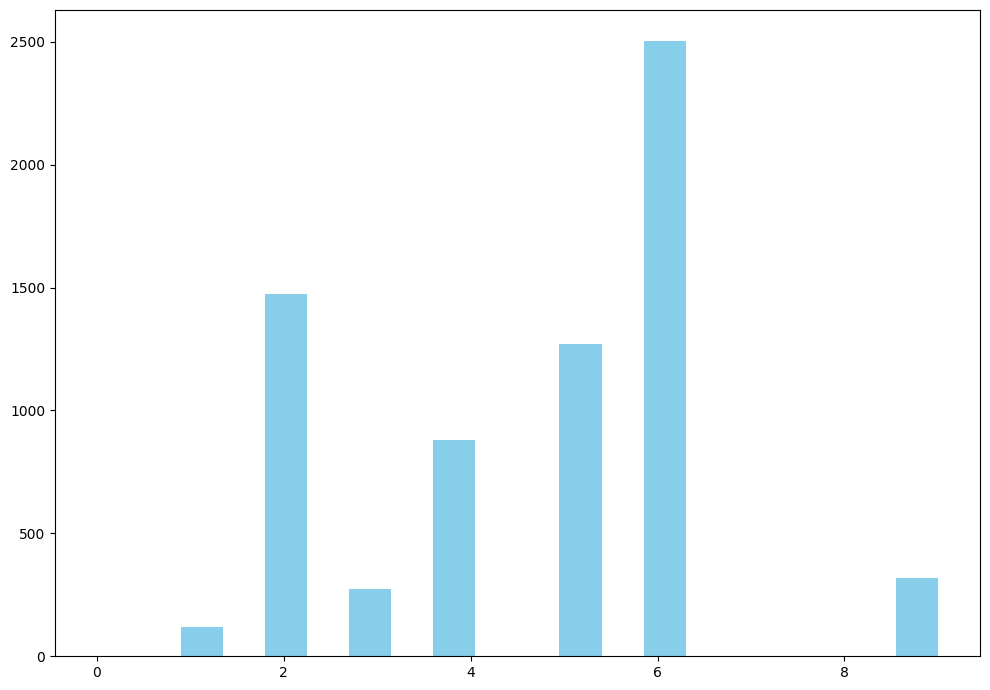

In [1992]:
import matplotlib.pyplot as plt

# Tạo subplot cho các cột mới
fig = plt.subplots(figsize=(10, 7))

# Trực quan hóa chỉ số sức khỏe
plt.hist(df['mức độ nguy cơ'], bins=20, color='skyblue')



plt.tight_layout()
plt.show()


In [1993]:
df['mức độ nguy cơ'].value_counts()

6.0    2504
2.0    1475
5.0    1272
4.0     881
9.0     319
3.0     275
1.0     121
0.0       2
Name: mức độ nguy cơ, dtype: int64

In [1994]:
df

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Continent,Hemisphere,Heart Attack Risk,Systolic Blood Pressure,Diastolic Blood Pressure,Activity_Balance_Index,Chỉ số sức khỏe,lối sống,môi tường sống,mức độ nguy cơ
0,2,1,1,0,0,0,1,0,0,4.168189,...,3,0,0,2,1,2,1.2,0.375,5.333333,5.0
2,1,0,2,0,1,0,0,0,0,2.078353,...,0,1,0,2,2,0,1.4,0.250,3.000000,2.0
5,0,0,2,2,1,1,1,0,1,0.625008,...,0,1,1,2,1,0,1.2,0.625,4.333333,6.0
6,2,1,2,0,0,0,1,0,1,4.098177,...,5,1,1,0,0,0,1.1,0.500,5.666667,6.0
8,1,1,0,0,1,0,1,1,0,16.868302,...,3,0,0,2,2,1,0.9,0.625,4.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8757,0,0,2,0,0,1,1,1,0,1.857908,...,1,1,0,0,0,2,0.7,0.500,4.000000,3.0
8758,0,1,0,0,1,1,1,0,1,7.917342,...,1,1,0,0,0,0,0.4,0.750,5.666667,2.0
8759,1,0,0,0,1,0,0,1,0,16.558426,...,5,1,0,2,2,0,1.1,0.375,5.666667,5.0
8760,0,1,2,1,0,1,1,1,1,3.148438,...,3,0,1,2,0,1,0.9,0.875,4.000000,9.0


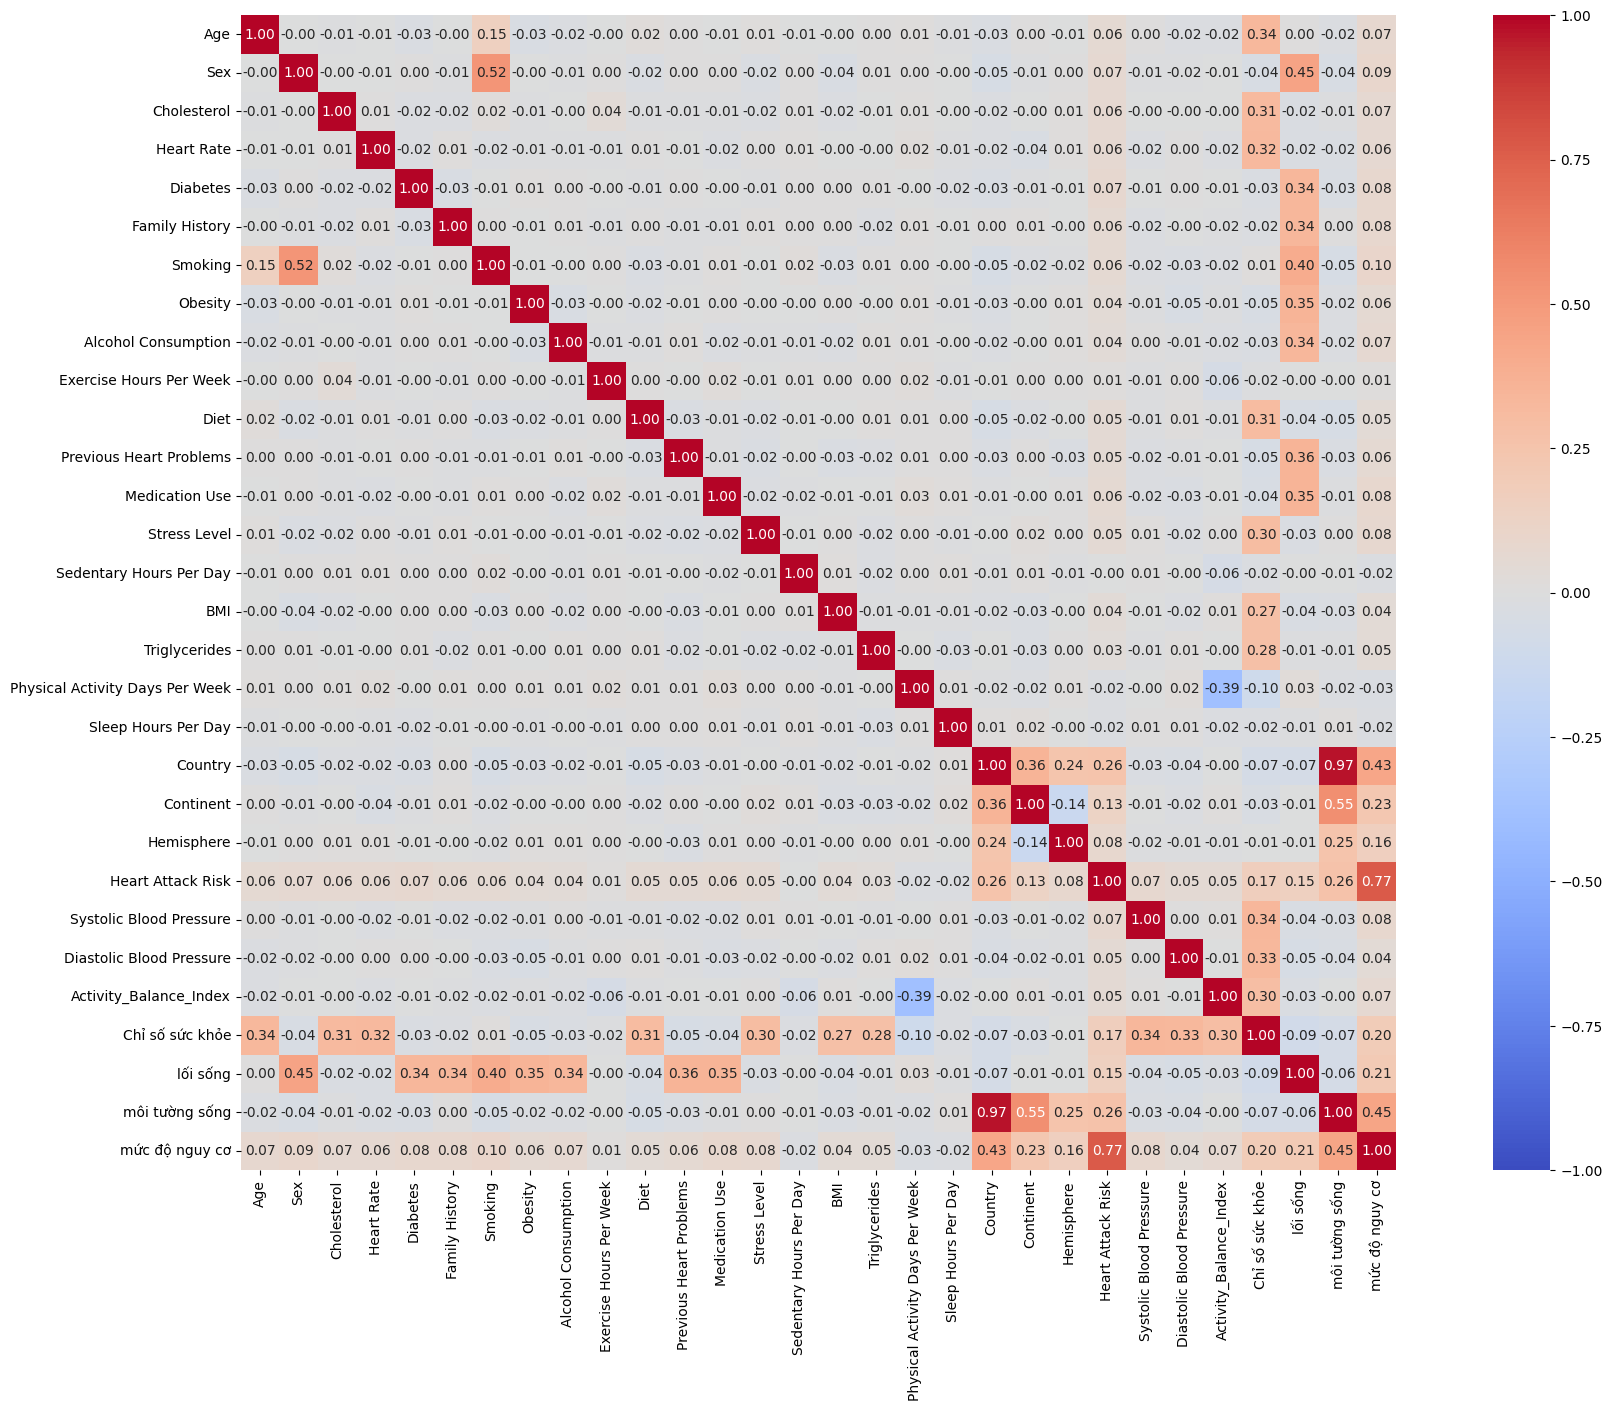

In [1995]:

plt.figure(figsize=(25, 15))  # Kích thước 25x15 inch
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", square=True, cmap='coolwarm')  # Sử dụng bảng màu 'coolwarm'
plt.show()


##### Xử lý ngoại lệ

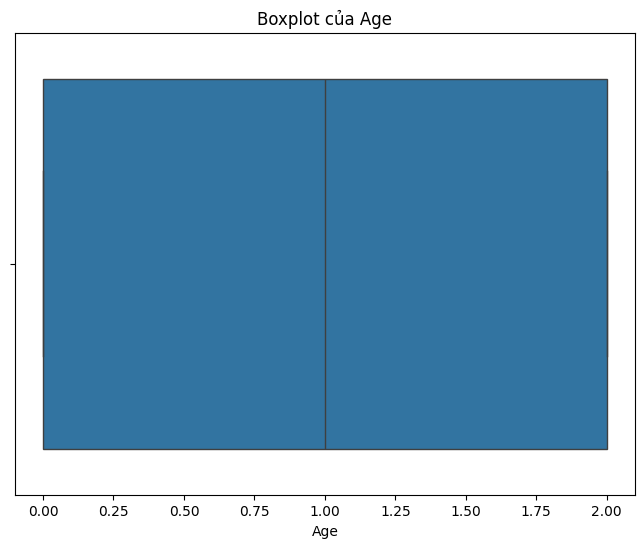

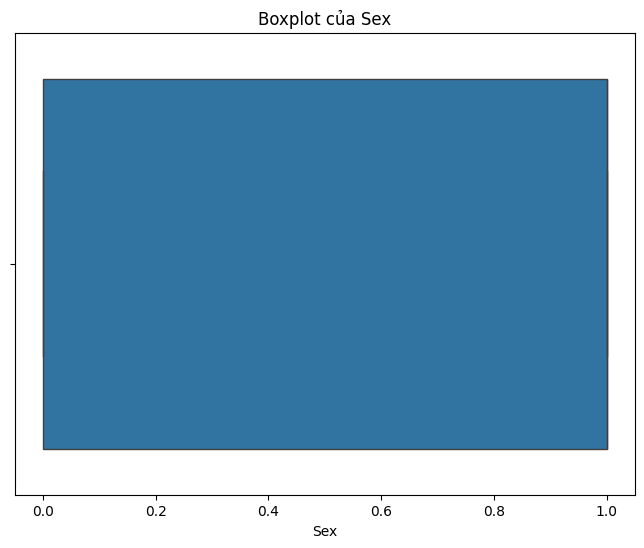

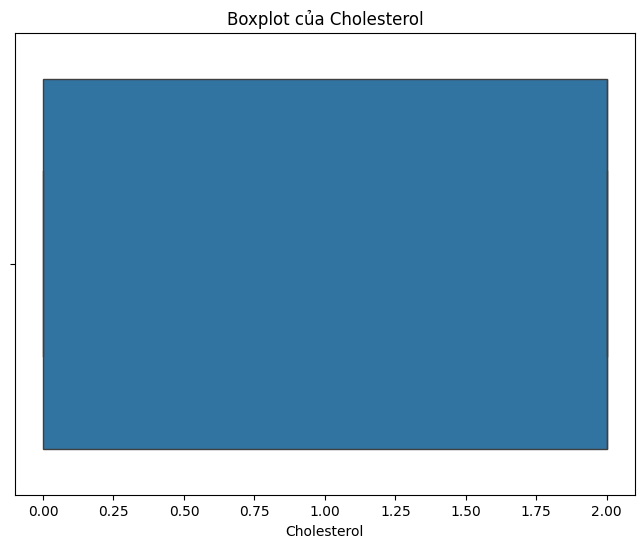

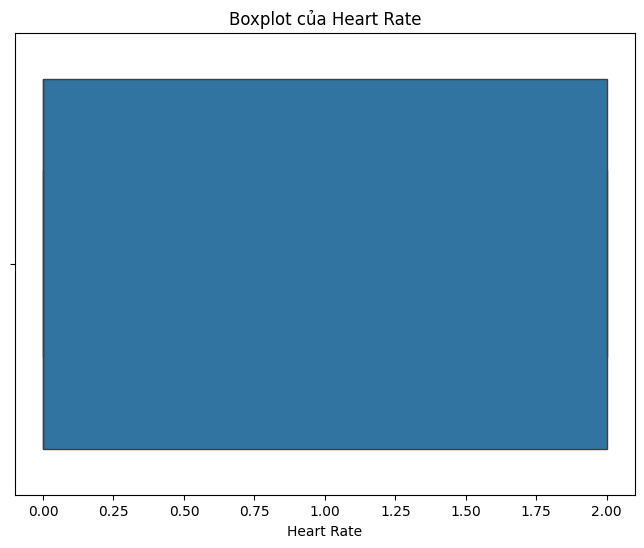

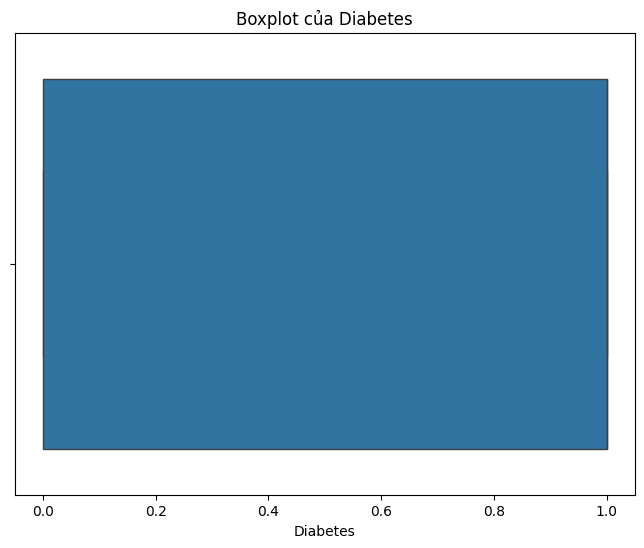

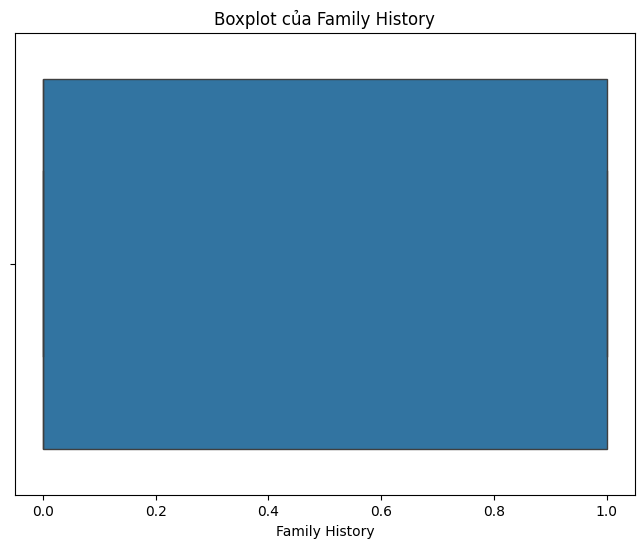

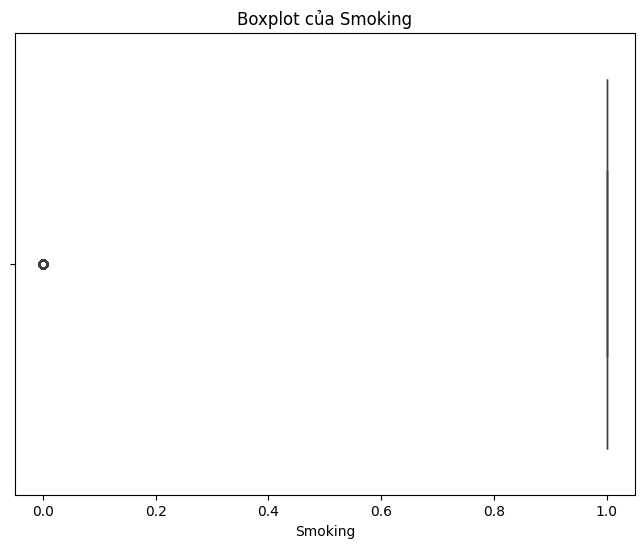

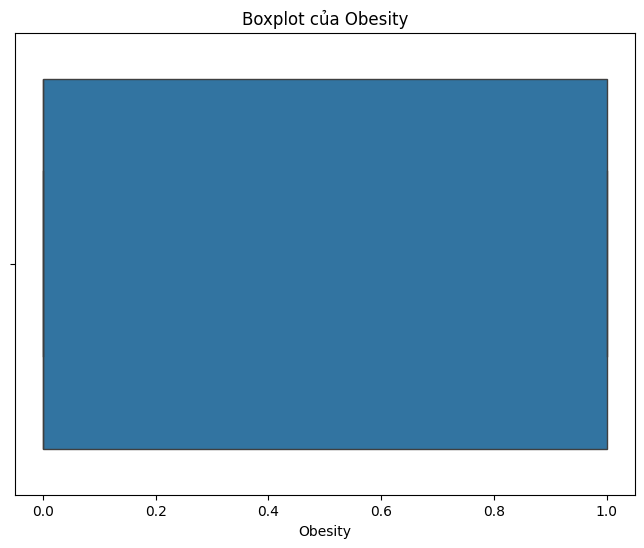

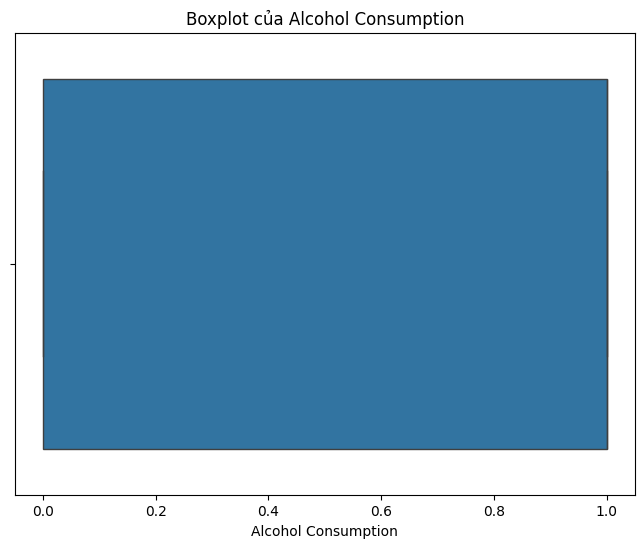

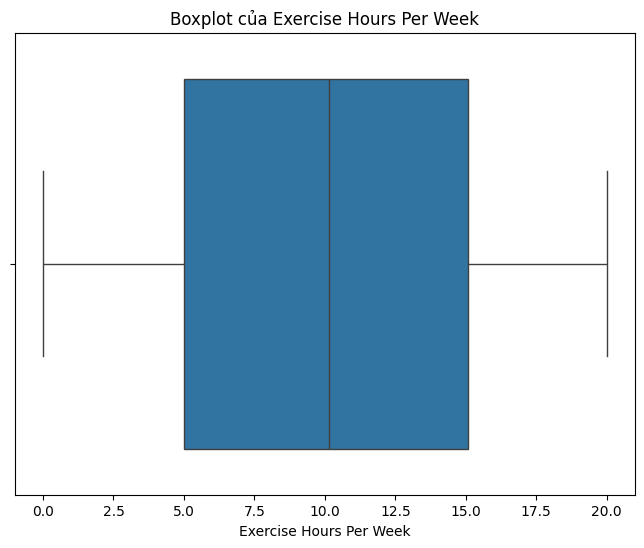

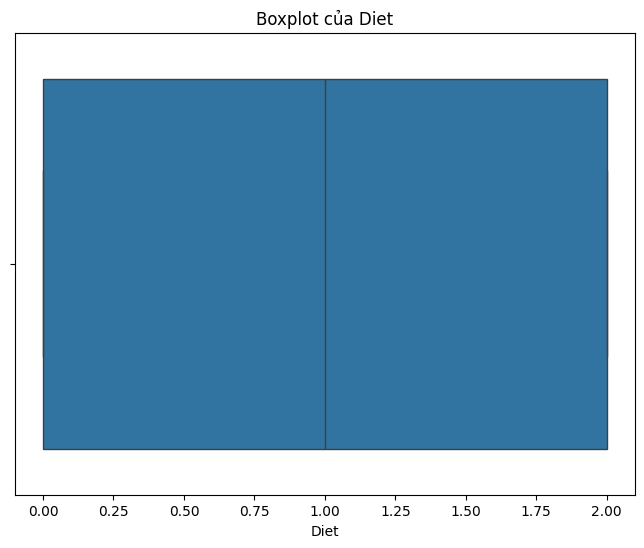

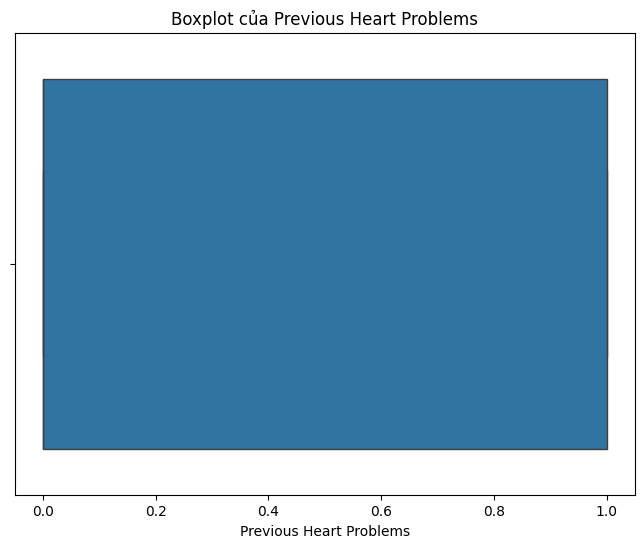

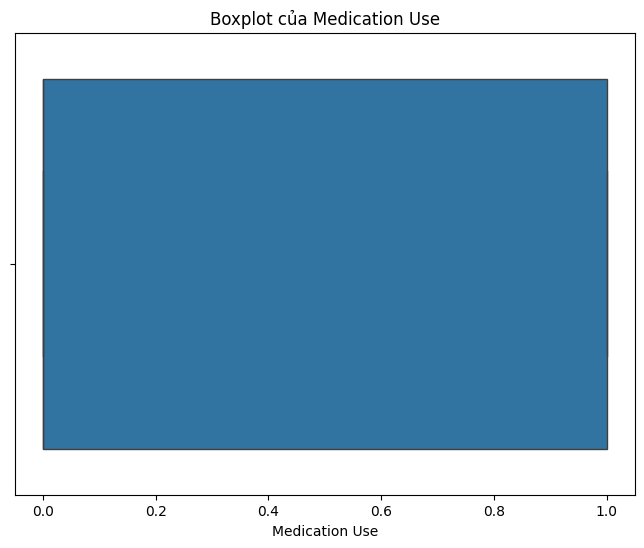

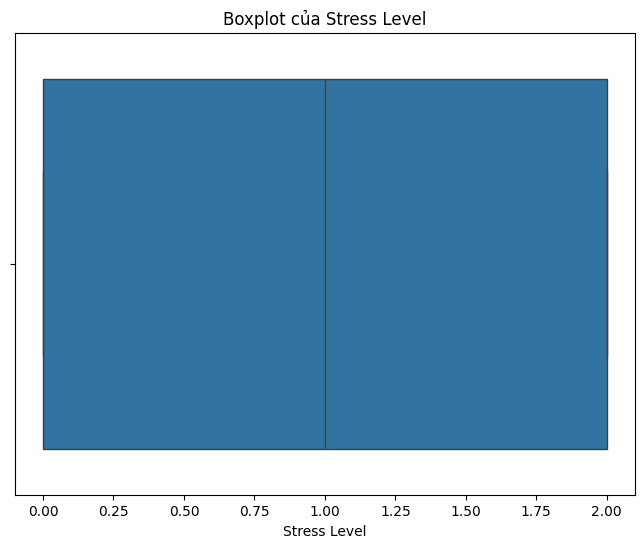

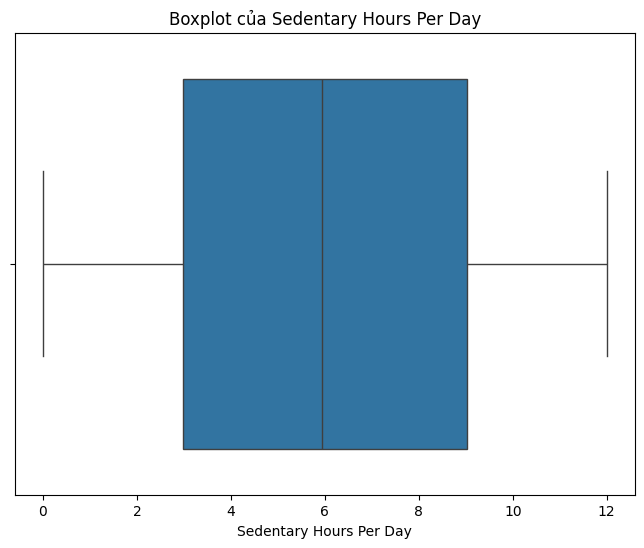

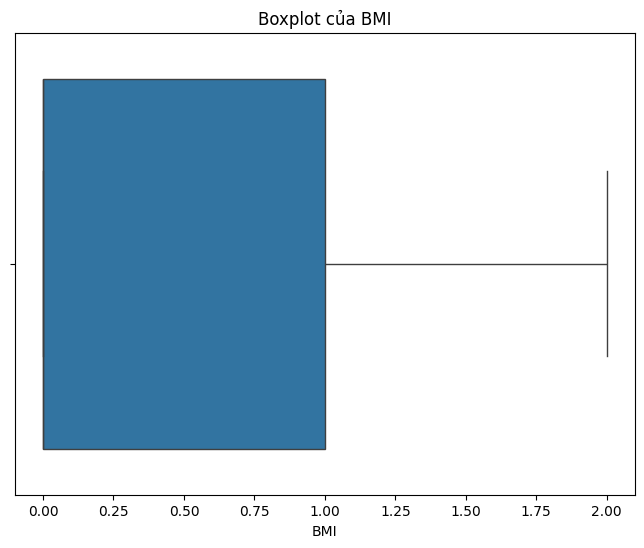

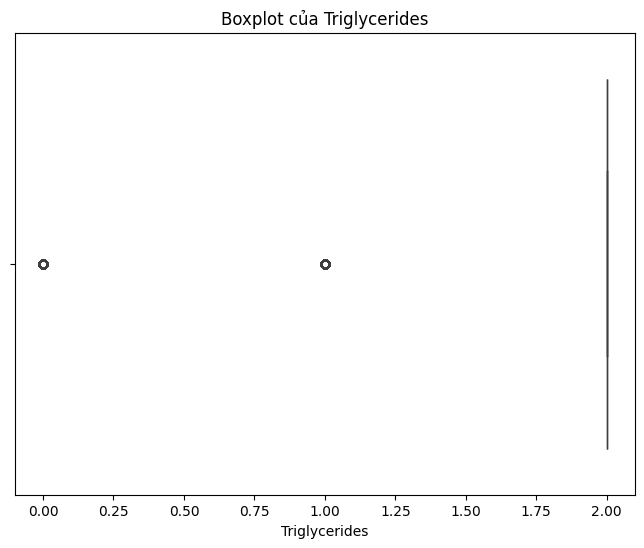

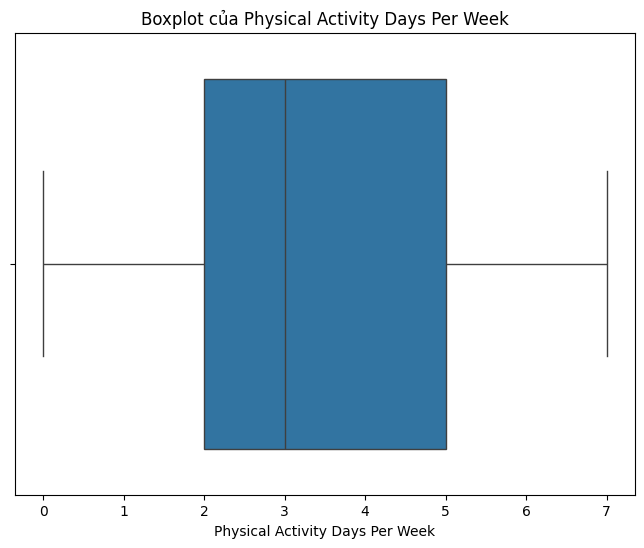

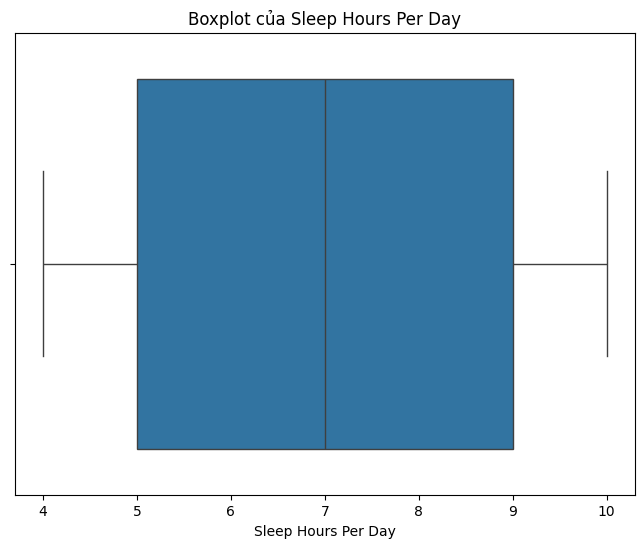

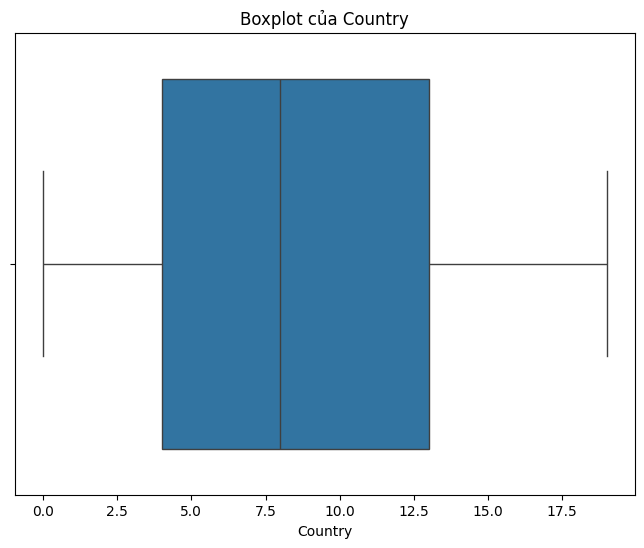

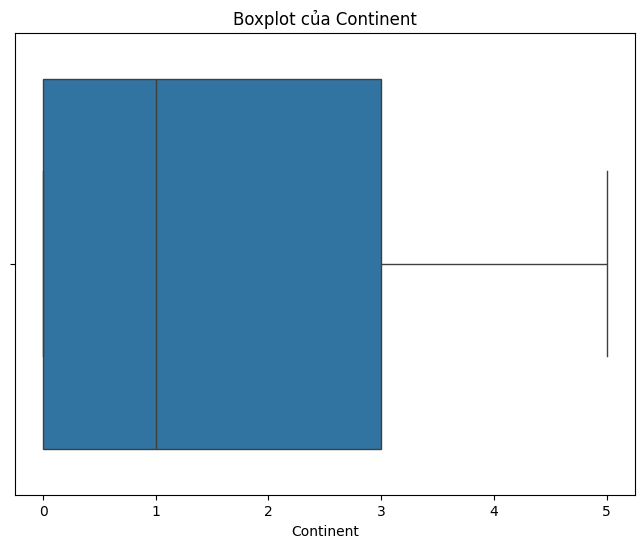

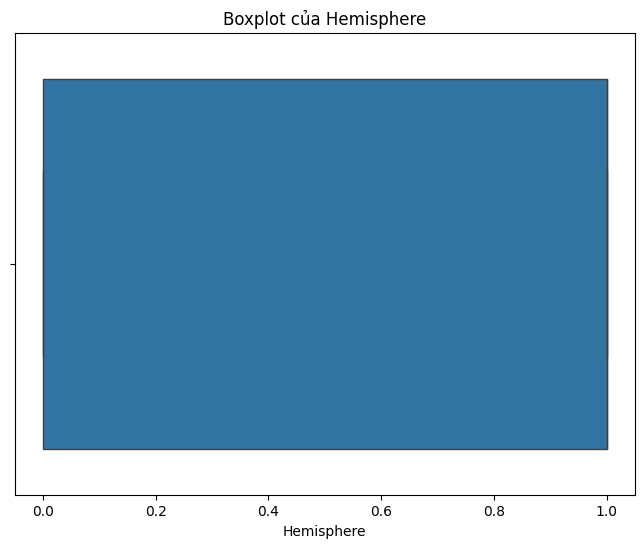

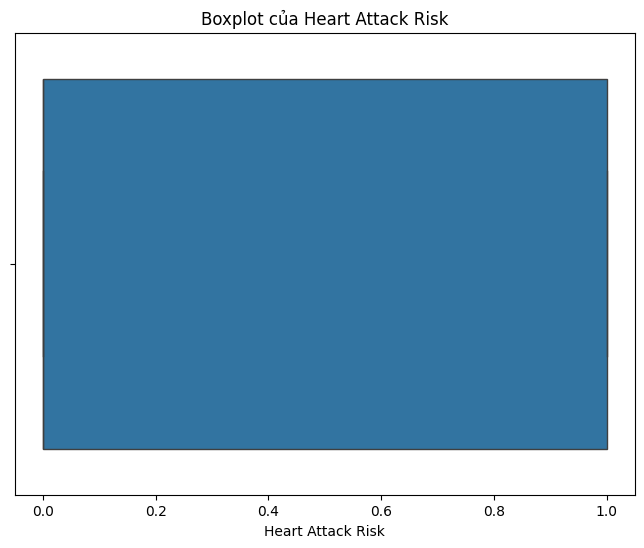

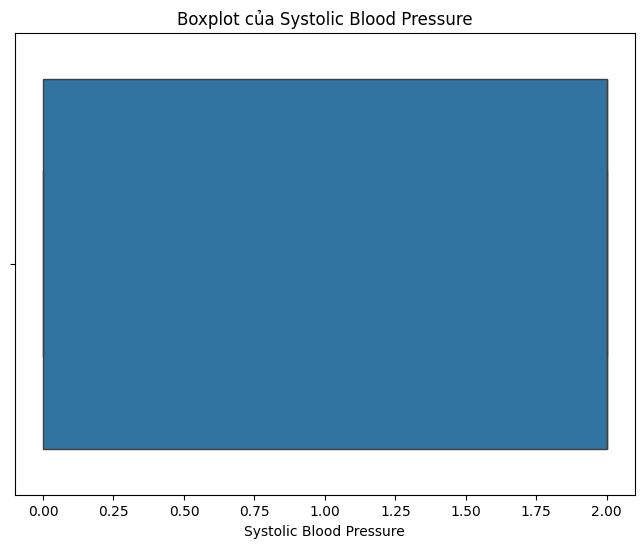

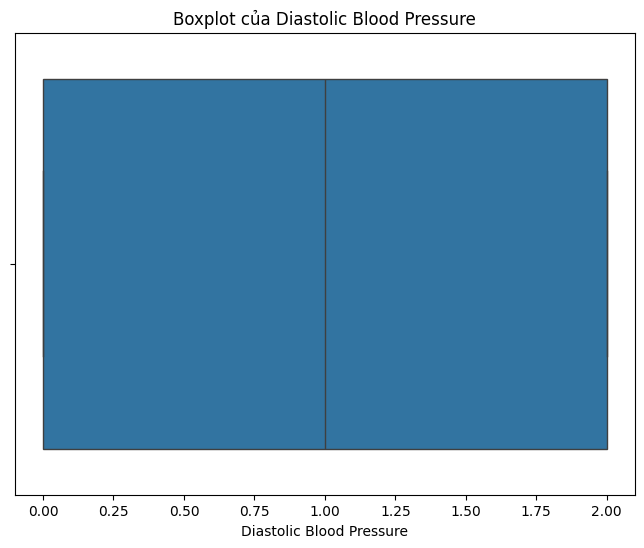

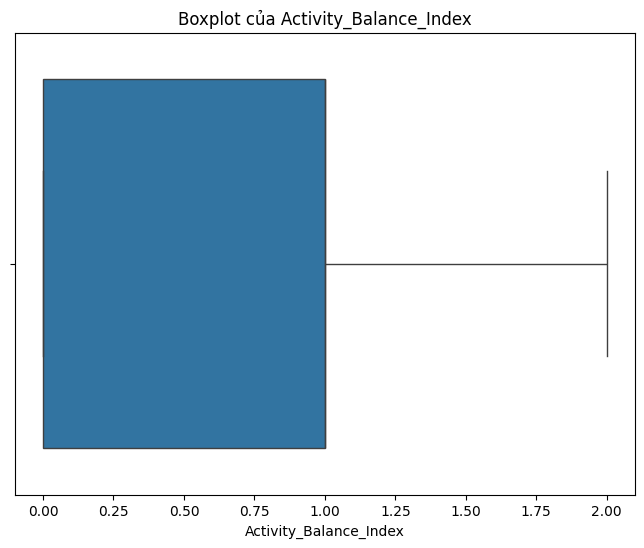

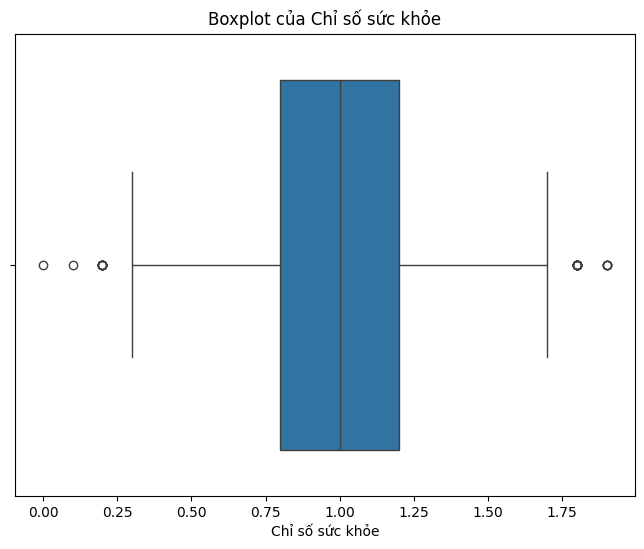

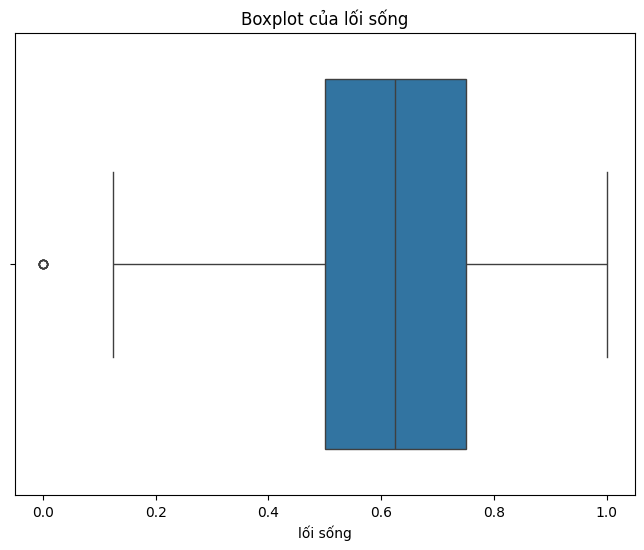

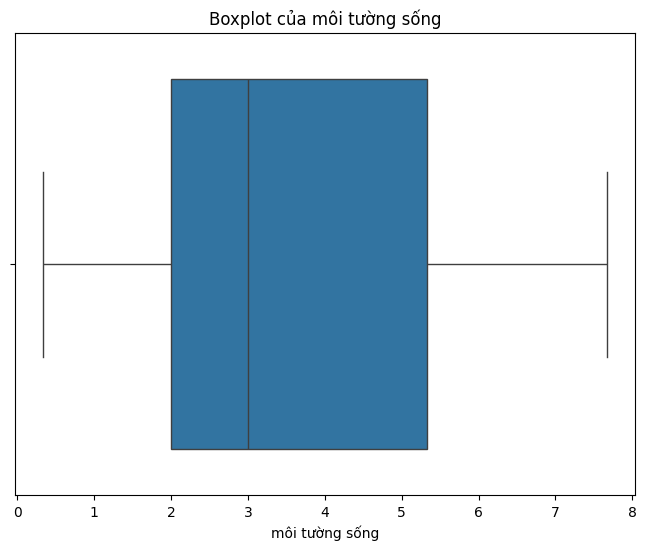

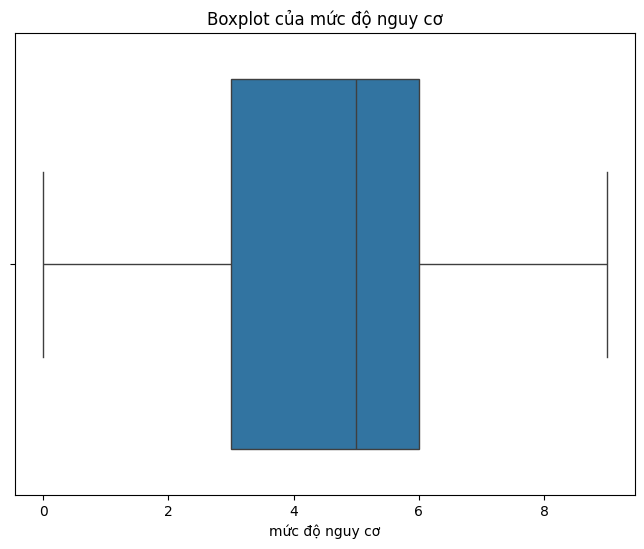

In [1996]:
# Tạo biểu đồ boxplot cho từng biến số
for column in df.columns:
    if df[column].dtype in ['float64', 'int64','int32']:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot của {column}')
        plt.show()

##### Cân bằng dữ liệu

<Axes: xlabel='Heart Attack Risk', ylabel='count'>

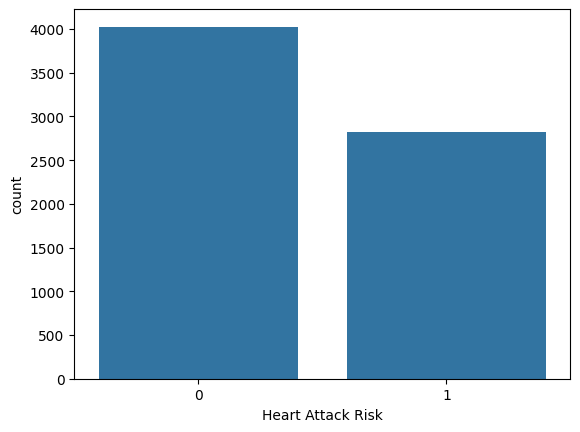

In [1997]:
sns.countplot(x='Heart Attack Risk', data=df)

In [1998]:
y = df[["Heart Attack Risk"]]
X = df.drop("Heart Attack Risk", axis = 1)
y["Heart Attack Risk"].value_counts()

0    4026
1    2823
Name: Heart Attack Risk, dtype: int64

In [1999]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_us, y_us = sm.fit_resample(X, y)

# Tạo DataFrame từ dữ liệu đã được lấy mẫu và nhãn tương ứng
df_X_us = pd.DataFrame(X_us)  
df_y_us = pd.DataFrame(y_us)
df_combined = pd.concat([df_X_us, df_y_us], axis=1)



<Axes: xlabel='Heart Attack Risk', ylabel='count'>

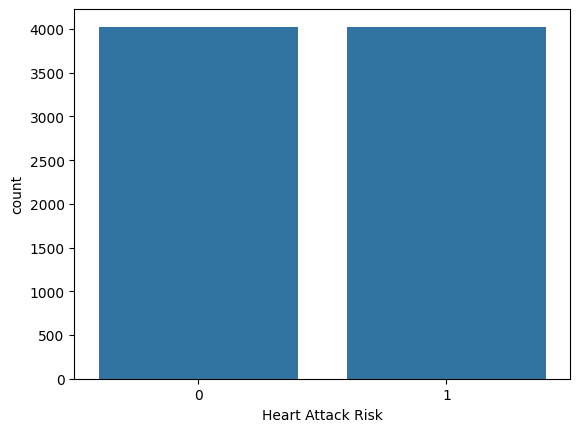

In [2000]:
sns.countplot(x='Heart Attack Risk', data=y_us)

In [2001]:
y_us.value_counts()

Heart Attack Risk
0                    4026
1                    4026
dtype: int64

In [2002]:
df=df_combined
df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Continent,Hemisphere,Systolic Blood Pressure,Diastolic Blood Pressure,Activity_Balance_Index,Chỉ số sức khỏe,lối sống,môi tường sống,mức độ nguy cơ,Heart Attack Risk
0,2,1,1,0,0,0,1,0,0,4.168189,...,3,0,2,1,2,1.2,0.375,5.333333,5.0,0
1,1,0,2,0,1,0,0,0,0,2.078353,...,0,1,2,2,0,1.4,0.250,3.000000,2.0,0
2,0,0,2,2,1,1,1,0,1,0.625008,...,0,1,2,1,0,1.2,0.625,4.333333,6.0,1
3,2,1,2,0,0,0,1,0,1,4.098177,...,5,1,0,0,0,1.1,0.500,5.666667,6.0,1
4,1,1,0,0,1,0,1,1,0,16.868302,...,3,0,2,2,1,0.9,0.625,4.000000,4.0,0


In [2003]:
df.describe()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Continent,Hemisphere,Systolic Blood Pressure,Diastolic Blood Pressure,Activity_Balance_Index,Chỉ số sức khỏe,lối sống,môi tường sống,mức độ nguy cơ,Heart Attack Risk
count,8052.000000,8052.000000,8052.000000,8052.000000,8052.00000,8052.000000,8052.000000,8052.000000,8052.000000,8052.000000,...,8052.000000,8052.000000,8052.000000,8052.000000,8052.000000,8052.000000,8052.000000,8052.000000,8052.000000,8052.000000
mean,0.942871,0.666170,1.258942,0.654247,0.61848,0.445976,0.883135,0.452558,0.557874,10.043512,...,1.723299,0.609165,1.184675,0.978639,0.735097,1.032684,0.597156,3.782387,4.871513,0.500000
std,0.888360,0.471609,0.876352,0.851648,0.48579,0.497104,0.321280,0.497775,0.496670,5.791805,...,1.606699,0.487968,0.908727,0.887563,0.807827,0.259350,0.167612,2.146538,1.846002,0.500031
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.002442,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,4.979932,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.900000,0.500000,2.000000,4.000000,0.000000
50%,1.000000,1.000000,2.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,10.140888,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.625000,4.000000,5.500000,0.500000
75%,2.000000,1.000000,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,15.077278,...,3.000000,1.000000,2.000000,2.000000,1.000000,1.200000,0.750000,5.354690,6.000000,1.000000
max,2.000000,1.000000,2.000000,2.000000,1.00000,1.000000,1.000000,1.000000,1.000000,19.998709,...,5.000000,1.000000,2.000000,2.000000,2.000000,1.900000,1.000000,7.666667,9.000000,1.000000


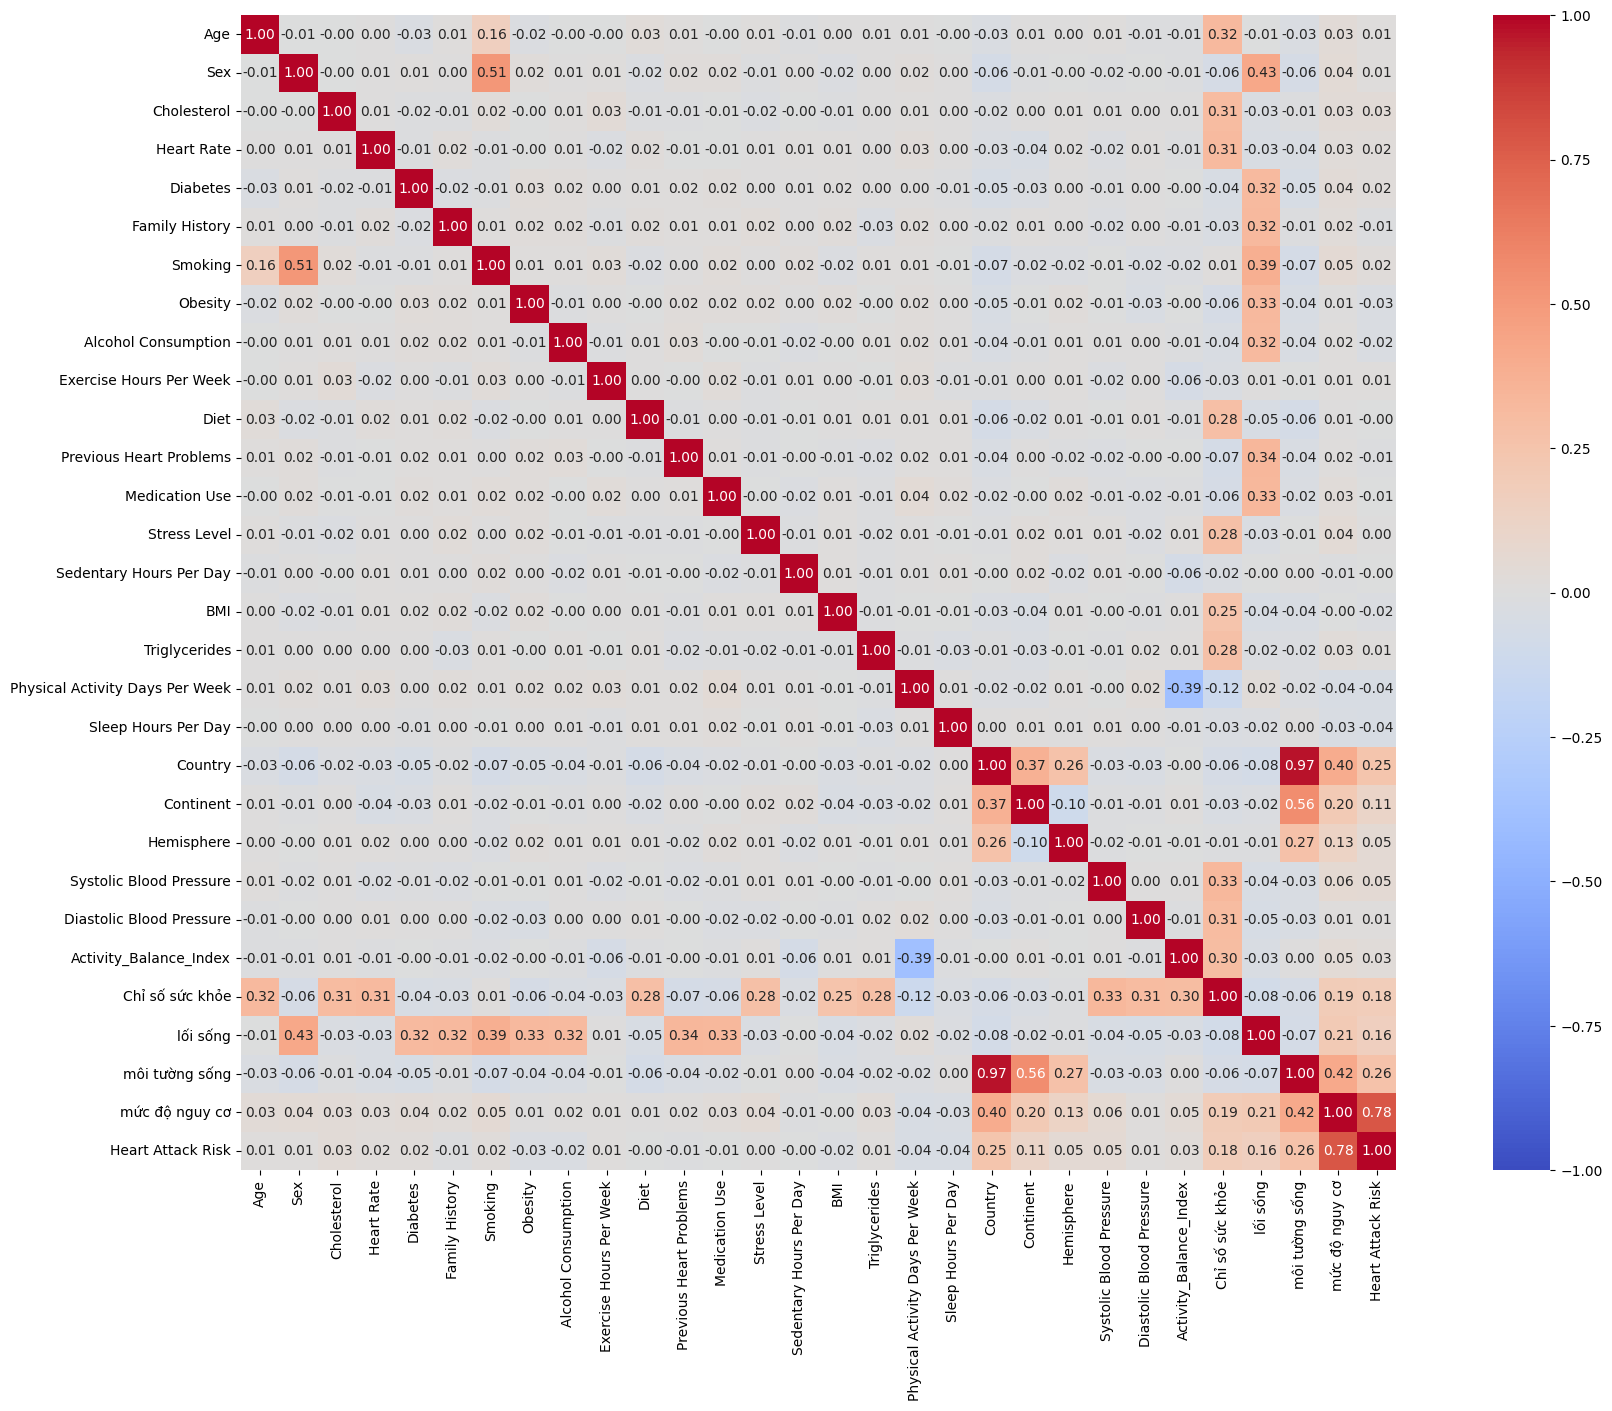

In [2004]:

plt.figure(figsize=(25, 15))  # Kích thước 25x15 inch
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", square=True, cmap='coolwarm')  # Sử dụng bảng màu 'coolwarm'
plt.show()


In [2005]:
df

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Continent,Hemisphere,Systolic Blood Pressure,Diastolic Blood Pressure,Activity_Balance_Index,Chỉ số sức khỏe,lối sống,môi tường sống,mức độ nguy cơ,Heart Attack Risk
0,2,1,1,0,0,0,1,0,0,4.168189,...,3,0,2,1,2,1.200000,0.375000,5.333333,5.0,0
1,1,0,2,0,1,0,0,0,0,2.078353,...,0,1,2,2,0,1.400000,0.250000,3.000000,2.0,0
2,0,0,2,2,1,1,1,0,1,0.625008,...,0,1,2,1,0,1.200000,0.625000,4.333333,6.0,1
3,2,1,2,0,0,0,1,0,1,4.098177,...,5,1,0,0,0,1.100000,0.500000,5.666667,6.0,1
4,1,1,0,0,1,0,1,1,0,16.868302,...,3,0,2,2,1,0.900000,0.625000,4.000000,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8047,1,1,2,2,0,1,1,1,1,8.306994,...,1,0,2,1,2,1.567329,0.750000,4.996689,6.0,1
8048,1,0,2,2,0,0,1,0,0,5.238842,...,4,1,2,2,2,1.694182,0.382273,7.666667,9.0,1
8049,2,1,2,1,0,1,1,0,0,2.451884,...,3,0,2,1,0,1.300000,0.589416,5.333333,6.0,1
8050,0,1,2,1,0,0,1,1,1,19.040503,...,1,1,2,2,0,1.280155,0.633269,0.666667,6.0,1


##### Lưu file

In [2006]:
# Lưu DataFrame thành tập tin CSV
df.to_csv('new_dataset.csv', index=False)

#### Phân tích,trực quan hóa dữ liệu

In [2007]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df = pd.read_csv("heart_attack_prediction_dataset.csv")


['Bin_no_1', 'Bin_no_2', 'Bin_no_3']


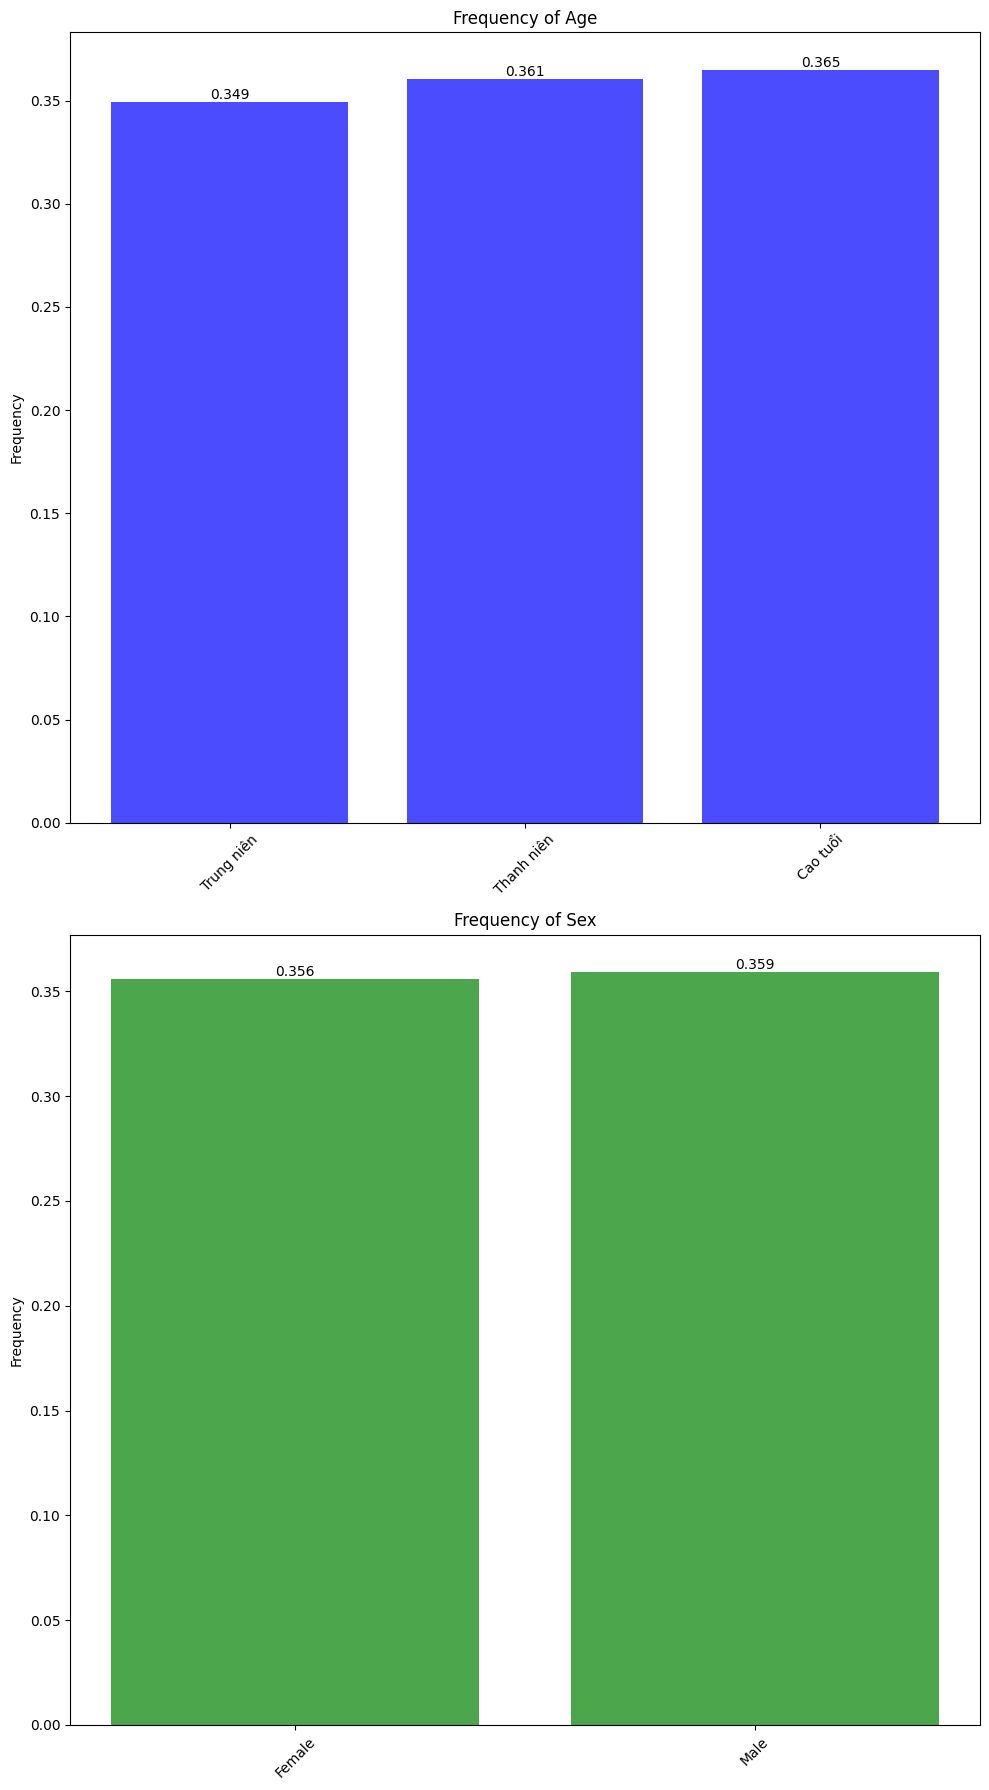

In [2008]:
import matplotlib.pyplot as plt

# Tính số lần xuất hiện của mỗi quốc gia theo châu lục và bán cầu
# country_counts = df[df['Heart Attack Risk'] == 1].groupby(['Age']).size().sort_values()
# continent_counts = df[df['Heart Attack Risk'] == 1].groupby(['Sex']).size().sort_values()
discretised_age, bins = pd.qcut(df['Age'], 3, labels=None, retbins=True, precision=3, duplicates='raise')

pd.concat([discretised_age, df['Age']], axis=1)
bin_labels = ['Bin_no_' +str(i) for i in range(1,4)]
print(bin_labels)

df['Age'] = pd.cut(x=df['Age'], bins=bins, labels=bin_labels, include_lowest=True)
df['Age'] = df['Age'].replace({'Bin_no_1': 'Thanh niên', 'Bin_no_2': 'Trung niên', 'Bin_no_3': 'Cao tuổi'})



# Tính trung bình nguy cơ bị bệnh tim của mỗi quốc gia, châu lục, bán cầu
country_counts = df.groupby(['Age'])['Heart Attack Risk'].mean().sort_values()
continent_counts = df.groupby(['Sex'])['Heart Attack Risk'].mean().sort_values()


# Tạo 3 biểu đồ
fig, axs = plt.subplots(2, 1, figsize=(10, 18))

# Biểu đồ cho số lần xuất hiện của mỗi quốc gia
axs[0].bar(country_counts.index, country_counts.values, color='b', alpha=0.7)
axs[0].set_title('Frequency of Age')
axs[0].set_ylabel('Frequency')
axs[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(country_counts.values):
    axs[0].text(i, v, "{:.3f}".format(v), ha='center', va='bottom')

# Biểu đồ cho số lần xuất hiện của mỗi châu lục
axs[1].bar(continent_counts.index, continent_counts.values, color='g', alpha=0.7)
axs[1].set_title('Frequency of Sex')
axs[1].set_ylabel('Frequency')
axs[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(continent_counts.values):
    axs[1].text(i, v, "{:.3f}".format(v), ha='center', va='bottom')



plt.tight_layout()
plt.show()


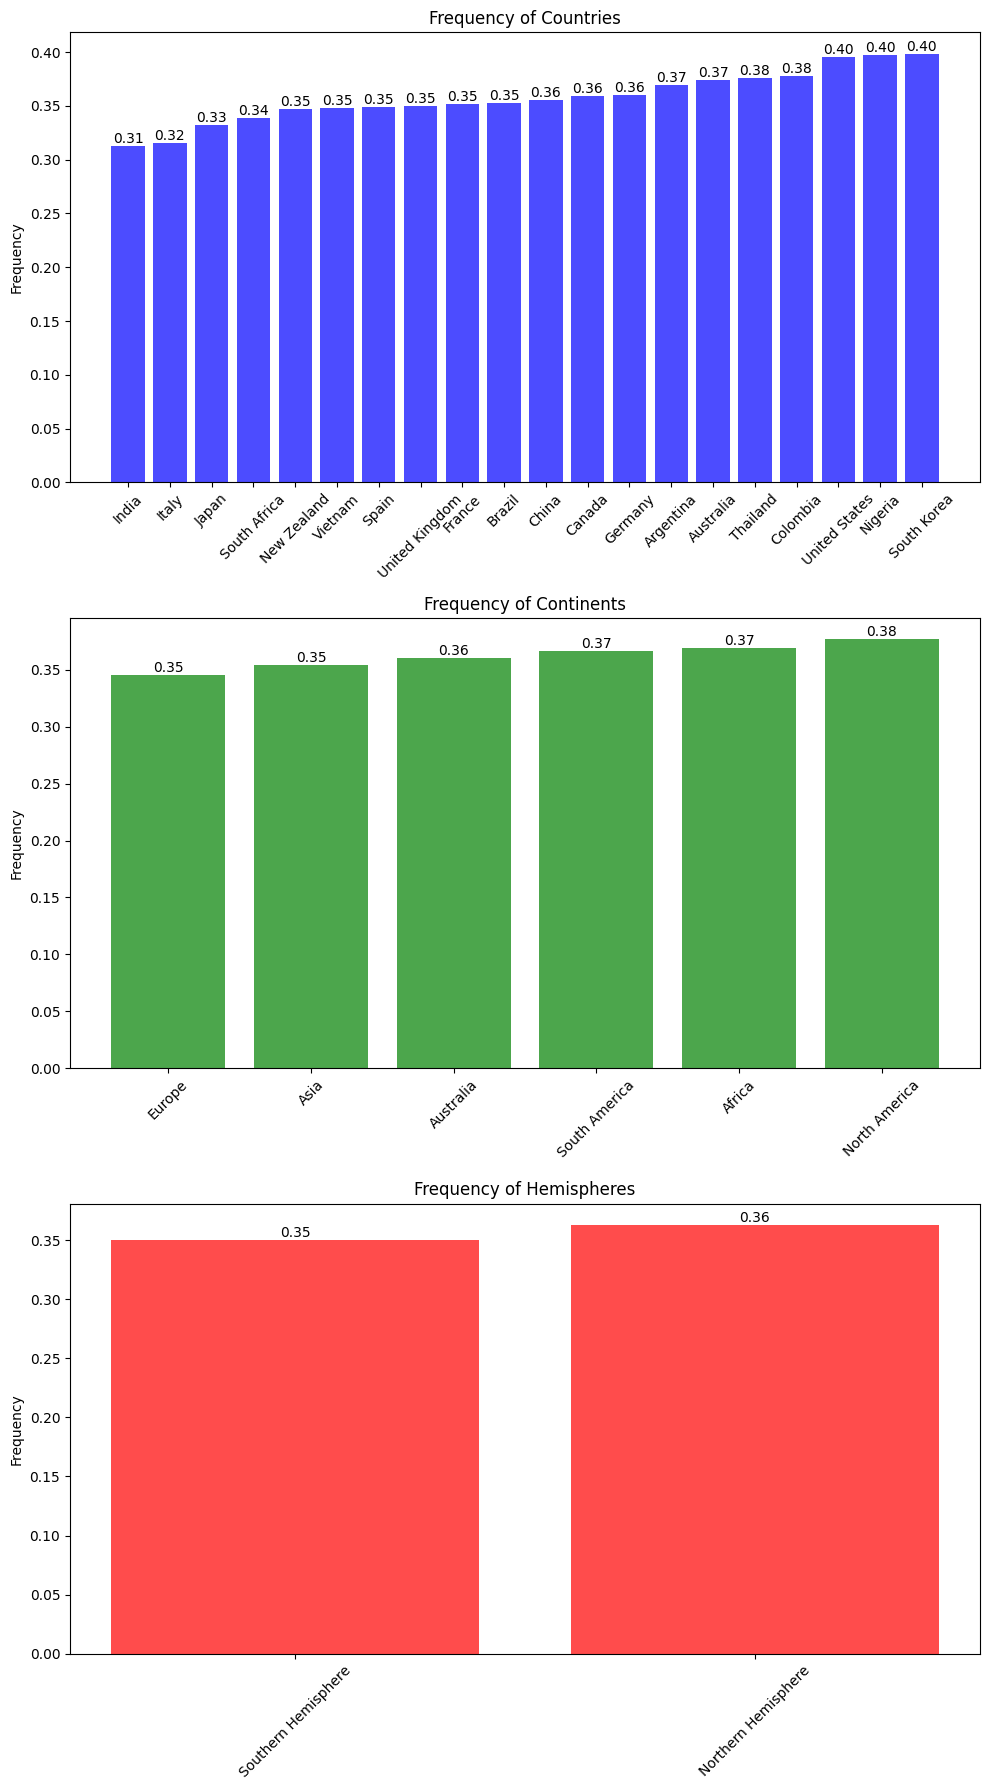

In [2009]:
import matplotlib.pyplot as plt

# Tính số lần xuất hiện của mỗi quốc gia theo châu lục và bán cầu
# country_counts = df[df['Heart Attack Risk'] == 1].groupby(['Country']).size().sort_values()
# continent_counts = df[df['Heart Attack Risk'] == 1].groupby(['Continent']).size().sort_values()
# hemisphere_counts = df[df['Heart Attack Risk'] == 1].groupby(['Hemisphere']).size().sort_values()
# Tính trung bình nguy cơ bị bệnh tim của mỗi quốc gia, châu lục, bán cầu
country_counts = df.groupby(['Country'])['Heart Attack Risk'].mean().sort_values()
continent_counts = df.groupby(['Continent'])['Heart Attack Risk'].mean().sort_values()
hemisphere_counts = df.groupby(['Hemisphere'])['Heart Attack Risk'].mean().sort_values()

# Tạo 3 biểu đồ
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Biểu đồ cho số lần xuất hiện của mỗi quốc gia
axs[0].bar(country_counts.index, country_counts.values, color='b', alpha=0.7)
axs[0].set_title('Frequency of Countries')
axs[0].set_ylabel('Frequency')
axs[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(country_counts.values):
    axs[0].text(i, v, "{:.2f}".format(v), ha='center', va='bottom')

# Biểu đồ cho số lần xuất hiện của mỗi châu lục
axs[1].bar(continent_counts.index, continent_counts.values, color='g', alpha=0.7)
axs[1].set_title('Frequency of Continents')
axs[1].set_ylabel('Frequency')
axs[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(continent_counts.values):
    axs[1].text(i, v, "{:.2f}".format(v), ha='center', va='bottom')

# Biểu đồ cho số lần xuất hiện của mỗi bán cầu
axs[2].bar(hemisphere_counts.index, hemisphere_counts.values, color='r', alpha=0.7)
axs[2].set_title('Frequency of Hemispheres')
axs[2].set_ylabel('Frequency')
axs[2].tick_params(axis='x', rotation=45)
for i, v in enumerate(hemisphere_counts.values):
    axs[2].text(i, v, "{:.2f}".format(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Mô hình

#### Xây dựng mô hình

##### Học máy

**Perceptron**

In [2010]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset
df = pd.read_csv('new_dataset.csv')


X_data = df.drop(columns=['Heart Attack Risk'])
y_data = df['Heart Attack Risk']




X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,shuffle=True,random_state=42)


perceptron_model = Perceptron()
perceptron_model.fit(X_train, y_train)  

# Make predictions on the test set
y_pred = perceptron_model.predict(X_test)

# Print evaluation metrics
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))
print('Precision Score:', metrics.precision_score(y_test, y_pred, average='micro'))
print('Recall Score:', metrics.recall_score(y_test, y_pred, average='micro'))
print('F1 Score:', metrics.f1_score(y_test, y_pred, average='micro'))
from sklearn.metrics import accuracy_score, confusion_matrix

# Hàm tính toán các độ đo đáng giá hiệu suất
def evaluate_performance(y_true, y_pred):
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Sensitivity (Recall)
    sensitivity = tp / (tp + fn)
    
    # Specificity
    specificity = tn / (tn + fp)
    
    # Precision
    precision = tp / (tp + fp)
    
    # Negative Predictive Value (NPV)
    npv = tn / (tn + fn)
    
    # False Positive Rate (FPR)
    fpr = fp / (fp + tn)
    
    # False Discovery Rate (FDR)
    fdr = fp / (fp + tp)
    
    # False Negative Rate (FNR)
    fnr = fn / (fn + tp)
    
    # F1-Score
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
    
    # Matthews correlation coefficient (MCC)
    mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
    
    return specificity,npv, fpr, fdr, fnr, mcc


specificity,npv, fpr, fdr, fnr,mcc = evaluate_performance(y_test, y_pred)





print("NPV:", npv)
print("FPR:", fpr)
print("FDR:", fdr)
print("FNR:", fnr)

print("MCC:", mcc)

Accuracy Score: 0.9987582781456954
Precision Score: 0.9987582781456954
Recall Score: 0.9987582781456954
F1 Score: 0.9987582781456954
NPV: 0.9983361064891847
FPR: 0.0008326394671107411
FDR: 0.0008237232289950577
FNR: 0.0016460905349794238
MCC: 0.9975168266191534


In [2011]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from gridsearchCV import perform_grid_search
# Load the dataset
df = pd.read_csv('new_dataset.csv')

X_data = df.drop(columns=['Heart Attack Risk'])
y_data = df['Heart Attack Risk']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, shuffle=True, random_state=42)

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'fit_intercept': [True, False],
    'max_iter': [100, 200, 300, 400, 500]
}


# Create GridSearchCV
grid_search,perceptron, best_params, best_score = perform_grid_search(Perceptron(), param_grid, X_train,y_train)

y_pred=perceptron.predict(X_test)
print("Best Parameters:", best_params)
print("Best Score:", best_score)

print(perceptron)
accuracy_perceptron=accuracy_score(y_test, y_pred)
precision_perceptron=metrics.precision_score(y_test, y_pred, average='micro')
recall_perceptron=metrics.recall_score(y_test, y_pred, average='micro')
f1_perceptron= metrics.f1_score(y_test, y_pred, average='micro')
# Print evaluation metrics
print('Accuracy Score:', accuracy_perceptron)
print('Precision Score:', metrics.precision_score(y_test, y_pred, average='micro'))
print('Recall Score:', metrics.recall_score(y_test, y_pred, average='micro'))
print('F1 Score:', metrics.f1_score(y_test, y_pred, average='micro'))


def evaluate_performance(y_true, y_pred):
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Specificity
    specificity = tn / (tn + fp)
    
    # Negative Predictive Value (NPV)
    npv = tn / (tn + fn)
    
    # False Positive Rate (FPR)
    fpr = fp / (fp + tn)
    
    # False Discovery Rate (FDR)
    fdr = fp / (fp + tp)
    
    # False Negative Rate (FNR)
    fnr = fn / (fn + tp)
    
    # Matthews correlation coefficient (MCC)
    mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
    
    return specificity, npv, fpr, fdr, fnr, mcc

specificity, npv, fpr, fdr, fnr, mcc = evaluate_performance(y_test, y_pred)

print("NPV:", npv)
print("FPR:", fpr)
print("FDR:", fdr)
print("FNR:", fnr)
print("MCC:", mcc)


Best Parameters: {'alpha': 0.001, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l1'}
Best Score: 1.0
Perceptron(alpha=0.001, max_iter=100, penalty='l1')
Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
NPV: 1.0
FPR: 0.0
FDR: 0.0
FNR: 0.0
MCC: 1.0


In [2012]:
from joblib import dump, load
dump(perceptron, 'perceptron.joblib')

['perceptron.joblib']

**SVM**

In [2013]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics


df = pd.read_csv('new_dataset.csv')

X_data = df.drop(columns=['Heart Attack Risk'])
y_data = df['Heart Attack Risk']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,shuffle=True,random_state=42)


svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)  


y_pred = svm_model.predict(X_test)


accuracy_svm=accuracy_score(y_test, y_pred)
precision_svm=metrics.precision_score(y_test, y_pred, average='micro')
recall_svm=metrics.recall_score(y_test, y_pred, average='micro')
f1_svm= metrics.f1_score(y_test, y_pred, average='micro')
# Print evaluation metrics
print('Accuracy Score:', accuracy_svm)
print('Precision Score:', metrics.precision_score(y_test, y_pred, average='micro'))
print('Recall Score:', metrics.recall_score(y_test, y_pred, average='micro'))
print('F1 Score:', metrics.f1_score(y_test, y_pred, average='micro'))


Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0


In [2014]:
from joblib import dump, load
dump(svm_model, 'svm_model.joblib')

['svm_model.joblib']

**ID3**

In [2015]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


df = pd.read_csv('new_dataset.csv')

X_data = df.drop(columns=['Heart Attack Risk'])
y_data = df['Heart Attack Risk']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,shuffle=True,random_state=42)

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)


y_pred = decision_tree_model.predict(X_test)


accuracy_id3=accuracy_score(y_test, y_pred)
precision_id3=metrics.precision_score(y_test, y_pred, average='micro')
recall_id3=metrics.recall_score(y_test, y_pred, average='micro')
f1_id3= metrics.f1_score(y_test, y_pred, average='micro')
# Print evaluation metrics
print('Accuracy Score:', accuracy_id3)
print('Precision Score:', metrics.precision_score(y_test, y_pred, average='micro'))
print('Recall Score:', metrics.recall_score(y_test, y_pred, average='micro'))
print('F1 Score:', metrics.f1_score(y_test, y_pred, average='micro'))
def evaluate_performance(y_true, y_pred):
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Specificity
    specificity = tn / (tn + fp)
    
    # Negative Predictive Value (NPV)
    npv = tn / (tn + fn)
    
    # False Positive Rate (FPR)
    fpr = fp / (fp + tn)
    
    # False Discovery Rate (FDR)
    fdr = fp / (fp + tp)
    
    # False Negative Rate (FNR)
    fnr = fn / (fn + tp)
    
    # Matthews correlation coefficient (MCC)
    mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
    
    return specificity, npv, fpr, fdr, fnr, mcc

specificity, npv, fpr, fdr, fnr, mcc = evaluate_performance(y_test, y_pred)

print("NPV:", npv)
print("FPR:", fpr)
print("FDR:", fdr)
print("FNR:", fnr)
print("MCC:", mcc)



Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
NPV: 1.0
FPR: 0.0
FDR: 0.0
FNR: 0.0
MCC: 1.0


In [2016]:
X_new=[[2,1,0,0,1,0,1,0,1,0.9988204892407148,2,1,0,0,0.1000587084178947,1,2,0,8,18,4,1,2,2,2,1.3,0.625,7.666666666666667,6.0]]
predictions = decision_tree_model.predict(X_new)
predictions

array([1], dtype=int64)

In [2017]:
from joblib import dump, load
dump(decision_tree_model, 'decision_tree_model.joblib')

['decision_tree_model.joblib']

**Logistic**

In [2018]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('new_dataset.csv')

X_data = df.drop(columns=['Heart Attack Risk'])
y_data = df['Heart Attack Risk']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=42)


logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)


y_pred = logistic_model.predict(X_test)


accuracy_logistic=accuracy_score(y_test, y_pred)
precision_logistic=metrics.precision_score(y_test, y_pred, average='micro')
recall_logistic=metrics.recall_score(y_test, y_pred, average='micro')
f1_logistic= metrics.f1_score(y_test, y_pred, average='micro')
# Print evaluation metrics
print('Accuracy Score:', accuracy_logistic)
print('Precision Score:', metrics.precision_score(y_test, y_pred, average='micro'))
print('Recall Score:', metrics.recall_score(y_test, y_pred, average='micro'))
print('F1 Score:', metrics.f1_score(y_test, y_pred, average='micro'))
def evaluate_performance(y_true, y_pred):
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Specificity
    specificity = tn / (tn + fp)
    
    # Negative Predictive Value (NPV)
    npv = tn / (tn + fn)
    
    # False Positive Rate (FPR)
    fpr = fp / (fp + tn)
    
    # False Discovery Rate (FDR)
    fdr = fp / (fp + tp)
    
    # False Negative Rate (FNR)
    fnr = fn / (fn + tp)
    
    # Matthews correlation coefficient (MCC)
    mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
    
    return specificity, npv, fpr, fdr, fnr, mcc

specificity, npv, fpr, fdr, fnr, mcc = evaluate_performance(y_test, y_pred)

print("NPV:", npv)
print("FPR:", fpr)
print("FDR:", fdr)
print("FNR:", fnr)
print("MCC:", mcc)




Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
NPV: 1.0
FPR: 0.0
FDR: 0.0
FNR: 0.0
MCC: 1.0


In [2019]:
from joblib import dump, load
dump(logistic_model, 'logistic_model.joblib')

['logistic_model.joblib']

**Neural Network**

In [2020]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


df = pd.read_csv('new_dataset.csv')

X_data = df.drop(columns=['Heart Attack Risk'])
y_data = df['Heart Attack Risk']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=42)


MLP_model = MLPClassifier(random_state=42)
MLP_model.fit(X_train, y_train)
y_pred = MLP_model.predict(X_test)




accuracy_MLP=accuracy_score(y_test, y_pred)
precision_MLP=metrics.precision_score(y_test, y_pred, average='micro')
recall_MLP=metrics.recall_score(y_test, y_pred, average='micro')
f1_MLP= metrics.f1_score(y_test, y_pred, average='micro')
# Print evaluation metrics
print('Accuracy Score:', accuracy_MLP)
print('Precision Score:', metrics.precision_score(y_test, y_pred, average='micro'))
print('Recall Score:', metrics.recall_score(y_test, y_pred, average='micro'))
print('F1 Score:', metrics.f1_score(y_test, y_pred, average='micro'))
def evaluate_performance(y_true, y_pred):
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Specificity
    specificity = tn / (tn + fp)
    
    # Negative Predictive Value (NPV)
    npv = tn / (tn + fn)
    
    # False Positive Rate (FPR)
    fpr = fp / (fp + tn)
    
    # False Discovery Rate (FDR)
    fdr = fp / (fp + tp)
    
    # False Negative Rate (FNR)
    fnr = fn / (fn + tp)
    
    # Matthews correlation coefficient (MCC)
    mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
    
    return specificity, npv, fpr, fdr, fnr, mcc

specificity, npv, fpr, fdr, fnr, mcc = evaluate_performance(y_test, y_pred)

print("NPV:", npv)
print("FPR:", fpr)
print("FDR:", fdr)
print("FNR:", fnr)
print("MCC:", mcc)


Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
NPV: 1.0
FPR: 0.0
FDR: 0.0
FNR: 0.0
MCC: 1.0


In [2021]:
from joblib import dump, load
dump(MLP_model, 'MLP_model.joblib')

['MLP_model.joblib']

**KNeighbors**

In [2022]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from gridsearchCV import perform_grid_search

# Load the dataset
df = pd.read_csv('new_dataset.csv')

X_data = df.drop(columns=['Heart Attack Risk'])
y_data = df['Heart Attack Risk']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)



# Create an instance of the model
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

# Predict on test set using the best model
y_pred = knn.predict(X_test)

accuracy_kn=accuracy_score(y_test, y_pred)
precision_kn=metrics.precision_score(y_test, y_pred, average='micro')
recall_kn=metrics.recall_score(y_test, y_pred, average='micro')
f1_kn= metrics.f1_score(y_test, y_pred, average='micro')
# Print evaluation metrics
print('Accuracy Score:', accuracy_kn)
print('Precision Score:', metrics.precision_score(y_test, y_pred, average='micro'))
print('Recall Score:', metrics.recall_score(y_test, y_pred, average='micro'))
print('F1 Score:', metrics.f1_score(y_test, y_pred, average='micro'))
def evaluate_performance(y_true, y_pred):
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Specificity
    specificity = tn / (tn + fp)
    
    # Negative Predictive Value (NPV)
    npv = tn / (tn + fn)
    
    # False Positive Rate (FPR)
    fpr = fp / (fp + tn)
    
    # False Discovery Rate (FDR)
    fdr = fp / (fp + tp)
    
    # False Negative Rate (FNR)
    fnr = fn / (fn + tp)
    
    # Matthews correlation coefficient (MCC)
    mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
    
    return specificity, npv, fpr, fdr, fnr, mcc

specificity, npv, fpr, fdr, fnr, mcc = evaluate_performance(y_test, y_pred)

print("NPV:", npv)
print("FPR:", fpr)
print("FDR:", fdr)
print("FNR:", fnr)
print("MCC:", mcc)





Accuracy Score: 0.8311258278145696
Precision Score: 0.8311258278145696
Recall Score: 0.8311258278145696
F1 Score: 0.8311258278145696
NPV: 0.8875855327468231
FPR: 0.24396336386344714
FDR: 0.21033740129217515
FNR: 0.09465020576131687
MCC: 0.6692702922893621


In [2023]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from gridsearchCV import perform_grid_search

# Load the dataset
df = pd.read_csv('new_dataset.csv')

X_data = df.drop(columns=['Heart Attack Risk'])
y_data = df['Heart Attack Risk']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[10,20,30,40]
}


# Create GridSearchCV
grid_search,KNeighbors, best_params, best_score = perform_grid_search(KNeighborsClassifier(),param_grid,X_train,y_train)



# Predict on test set using the best model
y_pred = KNeighbors.predict(X_test)

# Print evaluation metrics
print('Best Parameters:', best_params)
print('Best Score:', best_score)
accuracy_kn=accuracy_score(y_test, y_pred)
precision_kn=metrics.precision_score(y_test, y_pred, average='micro')
recall_kn=metrics.recall_score(y_test, y_pred, average='micro')
f1_kn= metrics.f1_score(y_test, y_pred, average='micro')
# Print evaluation metrics
print('Accuracy Score:', accuracy_kn)
print('Precision Score:', metrics.precision_score(y_test, y_pred, average='micro'))
print('Recall Score:', metrics.recall_score(y_test, y_pred, average='micro'))
print('F1 Score:', metrics.f1_score(y_test, y_pred, average='micro'))
def evaluate_performance(y_true, y_pred):
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Specificity
    specificity = tn / (tn + fp)
    
    # Negative Predictive Value (NPV)
    npv = tn / (tn + fn)
    
    # False Positive Rate (FPR)
    fpr = fp / (fp + tn)
    
    # False Discovery Rate (FDR)
    fdr = fp / (fp + tp)
    
    # False Negative Rate (FNR)
    fnr = fn / (fn + tp)
    
    # Matthews correlation coefficient (MCC)
    mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
    
    return specificity, npv, fpr, fdr, fnr, mcc

specificity, npv, fpr, fdr, fnr, mcc = evaluate_performance(y_test, y_pred)

print("NPV:", npv)
print("FPR:", fpr)
print("FDR:", fdr)
print("FNR:", fnr)
print("MCC:", mcc)





Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best Score: 0.8956723114777827
Accuracy Score: 0.8915562913907285
Precision Score: 0.8915562913907285
Recall Score: 0.8915562913907285
F1 Score: 0.8915562913907285
NPV: 0.942507068803016
FPR: 0.16736053288925895
FDR: 0.14833948339483394
FNR: 0.050205761316872426
MCC: 0.788278812903336


In [2024]:
from joblib import dump, load
dump(KNeighbors, 'KNeighbors.joblib')

['KNeighbors.joblib']

**AdaBoost**

In [2025]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('new_dataset.csv')

X_data = df.drop(columns=['Heart Attack Risk'])
y_data = df['Heart Attack Risk']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=42)


adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train, y_train)
y_pred = adaboost_model.predict(X_test)




accuracy_adaboost=accuracy_score(y_test, y_pred)
precision_adaboost=metrics.precision_score(y_test, y_pred, average='micro')
recall_adaboost=metrics.recall_score(y_test, y_pred, average='micro')
f1_adaboost= metrics.f1_score(y_test, y_pred, average='micro')
# Print evaluation metrics
print('Accuracy Score:', accuracy_adaboost)
print('Precision Score:', metrics.precision_score(y_test, y_pred, average='micro'))
print('Recall Score:', metrics.recall_score(y_test, y_pred, average='micro'))
print('F1 Score:', metrics.f1_score(y_test, y_pred, average='micro'))
def evaluate_performance(y_true, y_pred):
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Specificity
    specificity = tn / (tn + fp)
    
    # Negative Predictive Value (NPV)
    npv = tn / (tn + fn)
    
    # False Positive Rate (FPR)
    fpr = fp / (fp + tn)
    
    # False Discovery Rate (FDR)
    fdr = fp / (fp + tp)
    
    # False Negative Rate (FNR)
    fnr = fn / (fn + tp)
    
    # Matthews correlation coefficient (MCC)
    mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
    
    return specificity, npv, fpr, fdr, fnr, mcc

specificity, npv, fpr, fdr, fnr, mcc = evaluate_performance(y_test, y_pred)

print("NPV:", npv)
print("FPR:", fpr)
print("FDR:", fdr)
print("FNR:", fnr)
print("MCC:", mcc)







Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
NPV: 1.0
FPR: 0.0
FDR: 0.0
FNR: 0.0
MCC: 1.0


In [2026]:
from joblib import dump, load
dump(adaboost_model, 'adaboost_model.joblib')

['adaboost_model.joblib']

##### Học sâu

**LSTM**

In [2027]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
df = pd.read_csv('new_dataset.csv')

# Split features and labels
X_data = df.drop(columns=['Heart Attack Risk'])
y_data = df['Heart Attack Risk']

# mảng 3 chiều với hình dạng (số_mẫu, số_bước_thời_gian, số_đặc_trưng)
# Assuming each sample is a sequence of length 1 (no actual time steps)
X_data = X_data.values.reshape((X_data.shape[0], 1, X_data.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# Build the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
LSTM=model
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy_lstm = model.evaluate(X_test, y_test)
print("Accuracy on test set:", accuracy_lstm)

# Predict on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate additional evaluation metrics
precision_lstm = precision_score(y_test, y_pred)
recall_lstm = recall_score(y_test, y_pred)
f1_lstm = f1_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

# Negative Predictive Value (NPV)
npv = tn / (tn + fn)

# False Positive Rate (FPR)
fpr = fp / (fp + tn)

# False Discovery Rate (FDR)
fdr = fp / (fp + tp)

# False Negative Rate (FNR)
fnr = fn / (fn + tp)

# Matthews correlation coefficient (MCC)
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

# Print additional evaluation metrics
print("Precision:", precision_lstm)
print("Recall:", recall_lstm)
print("F1 Score:", f1_lstm)
print("Specificity:", specificity)
print("NPV:", npv)
print("FPR:", fpr)
print("FDR:", fdr)
print("FNR:", fnr)
print("MCC:", mcc)


Epoch 1/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7690 - loss: 0.4786 - val_accuracy: 0.9826 - val_loss: 0.1122
Epoch 2/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9796 - loss: 0.0930 - val_accuracy: 0.9859 - val_loss: 0.0744
Epoch 3/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9918 - loss: 0.0400 - val_accuracy: 0.9992 - val_loss: 0.0286
Epoch 4/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0122 - val_accuracy: 0.9971 - val_loss: 0.0247
Epoch 5/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 1.0000 - val_loss: 0.0037
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 1.0000 - loss: 0.0034
Accuracy on test set: 1.0
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Specificity: 1.0
NPV: 1.0
FPR: 0.0
FDR: 0.0
FNR: 0.0
MCC: 1.0


In [2028]:
# Lưu model và các tham số của nó
LSTM.save('LSTM.h5')

In [2029]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# import time
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# # Load the dataset
# df = pd.read_csv('new_dataset.csv')

# # Split features and labels
# X_data = df.drop(columns=['Heart Attack Risk'])
# y_data = df['Heart Attack Risk']

# # mảng 3 chiều với hình dạng (số_mẫu, số_bước_thời_gian, số_đặc_trưng)
# # Assuming each sample is a sequence of length 1 (no actual time steps)
# X_data = X_data.values.reshape((X_data.shape[0], 1, X_data.shape[1]))

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# # List các mô hình để thử
# models_to_try = [
#     {
#         'name': 'LSTM',
#         'model': LSTM
#     }
# ]

# # Huấn luyện và đánh giá các mô hình
# results = []

# for model_data in models_to_try:
#     model = model_data['model']
#     model_name = model_data['name']
    
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
#     start_time = time.time()
#     model.fit(X_train, y_train, epochs=5, batch_size=32)
#     end_time = time.time()
#     training_time = end_time - start_time
    
#     accuracy = model.evaluate(X_test, y_test)[1]
    
#     results.append({
#         'name': model_name,
#         'accuracy': accuracy,
#         'training_time': training_time
#     })

# # Tìm mô hình có độ chính xác cao nhất và thời gian chạy thấp nhất
# best_model = max(results, key=lambda x: x['accuracy'] / x['training_time'])

# print("Best Model:", best_model['name'])
# print("Accuracy:", best_model['accuracy'])
# print("Training Time:", best_model['training_time'])


##### học kết hợp

**Stacking**

In [2030]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
# Load the dataset
df = pd.read_csv('new_dataset.csv')

# Prepare the data
X_data = df.drop(columns=['Heart Attack Risk'])
y_data = df['Heart Attack Risk']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, shuffle=True, random_state=42)


# Define the stacking ensemble
stacking = StackingClassifier(
    estimators=[
        ('perceptron', Perceptron()),
        ('svm', SVC(probability=True)),
        ('decision_tree', DecisionTreeClassifier()),
        ('mlp',MLPClassifier()),
        ('KNN',KNeighborsClassifier()),
        
    ],
    final_estimator=LogisticRegression()
)

# Fit the stacking ensemble
stacking.fit(X_train, y_train)
y_pred_stacking = stacking.predict(X_test)
accuracy_stacking=accuracy_score(y_test, y_pred_stacking)
precision_stacking=metrics.precision_score(y_test, y_pred_stacking, average='micro')
recall_stacking=metrics.recall_score(y_test, y_pred_stacking, average='micro')
f1_stacking= metrics.f1_score(y_test, y_pred_stacking, average='micro')
# Evaluate Stacking
print('Stacking Accuracy:', metrics.accuracy_score(y_test, y_pred_stacking))
print('Stacking Precision:', metrics.precision_score(y_test, y_pred_stacking, average='micro'))
print('Stacking Recall:', metrics.recall_score(y_test, y_pred_stacking, average='micro'))
print('Stacking F1 Score:', metrics.f1_score(y_test, y_pred_stacking, average='micro'))




def evaluate_performance(y_true, y_pred):
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Specificity
    specificity = tn / (tn + fp)
    
    # Negative Predictive Value (NPV)
    npv = tn / (tn + fn)
    
    # False Positive Rate (FPR)
    fpr = fp / (fp + tn)
    
    # False Discovery Rate (FDR)
    fdr = fp / (fp + tp)
    
    # False Negative Rate (FNR)
    fnr = fn / (fn + tp)
    
    # Matthews correlation coefficient (MCC)
    mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
    
    return specificity, npv, fpr, fdr, fnr, mcc

specificity, npv, fpr, fdr, fnr, mcc = evaluate_performance(y_test, y_pred_stacking)

print("NPV:", npv)
print("FPR:", fpr)
print("FDR:", fdr)
print("FNR:", fnr)
print("MCC:", mcc)


Stacking Accuracy: 1.0
Stacking Precision: 1.0
Stacking Recall: 1.0
Stacking F1 Score: 1.0
NPV: 1.0
FPR: 0.0
FDR: 0.0
FNR: 0.0
MCC: 1.0


In [2031]:
from joblib import dump, load
dump(stacking, 'stacking.joblib')

['stacking.joblib']

**Voting**

In [2032]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
# Load the dataset
df = pd.read_csv('new_dataset.csv')

# Prepare the data
X_data = df.drop(columns=['Heart Attack Risk'])
y_data = df['Heart Attack Risk']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, shuffle=True, random_state=42)


# Khởi tạo mô hình VotingClassifier với các mô hình cơ sở
voting_model = VotingClassifier(estimators=[
    ('perceptron', Perceptron()),
        ('svm', SVC(probability=True)),
        ('decision_tree', DecisionTreeClassifier()),
        ('mlp',MLPClassifier()),
        ('KNN',KNeighborsClassifier()),
        ('LogisticRegression',LogisticRegression())
], voting='hard')  # 'hard' voting: lấy dự đoán của mỗi mô hình và đưa ra quyết định bằng cách đa số

# Huấn luyện mô hình
voting_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_voting = voting_model.predict(X_test)

# Đánh giá hiệu suất của mô hình VotingClassifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting=metrics.precision_score(y_test, y_pred_voting, average='micro')
recall_voting=metrics.recall_score(y_test, y_pred_voting, average='micro')
f1_voting= metrics.f1_score(y_test, y_pred_voting, average='micro')
# Evaluate Stacking
print('Voting Accuracy:', metrics.accuracy_score(y_test, y_pred_voting))
print('Voting Precision:', metrics.precision_score(y_test, y_pred_voting, average='micro'))
print('Voting Recall:', metrics.recall_score(y_test, y_pred_voting, average='micro'))
print('Voting F1 Score:', metrics.f1_score(y_test, y_pred_voting, average='micro'))




def evaluate_performance(y_true, y_pred):
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Specificity
    specificity = tn / (tn + fp)
    
    # Negative Predictive Value (NPV)
    npv = tn / (tn + fn)
    
    # False Positive Rate (FPR)
    fpr = fp / (fp + tn)
    
    # False Discovery Rate (FDR)
    fdr = fp / (fp + tp)
    
    # False Negative Rate (FNR)
    fnr = fn / (fn + tp)
    
    # Matthews correlation coefficient (MCC)
    mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
    
    return specificity, npv, fpr, fdr, fnr, mcc

specificity, npv, fpr, fdr, fnr, mcc = evaluate_performance(y_test, y_pred_voting)

print("NPV:", npv)
print("FPR:", fpr)
print("FDR:", fdr)
print("FNR:", fnr)
print("MCC:", mcc)


Voting Accuracy: 1.0
Voting Precision: 1.0
Voting Recall: 1.0
Voting F1 Score: 1.0
NPV: 1.0
FPR: 0.0
FDR: 0.0
FNR: 0.0
MCC: 1.0


In [2033]:
from joblib import dump, load
dump(voting_model, 'voting_model.joblib')

['voting_model.joblib']

#### Đánh giá mô hình

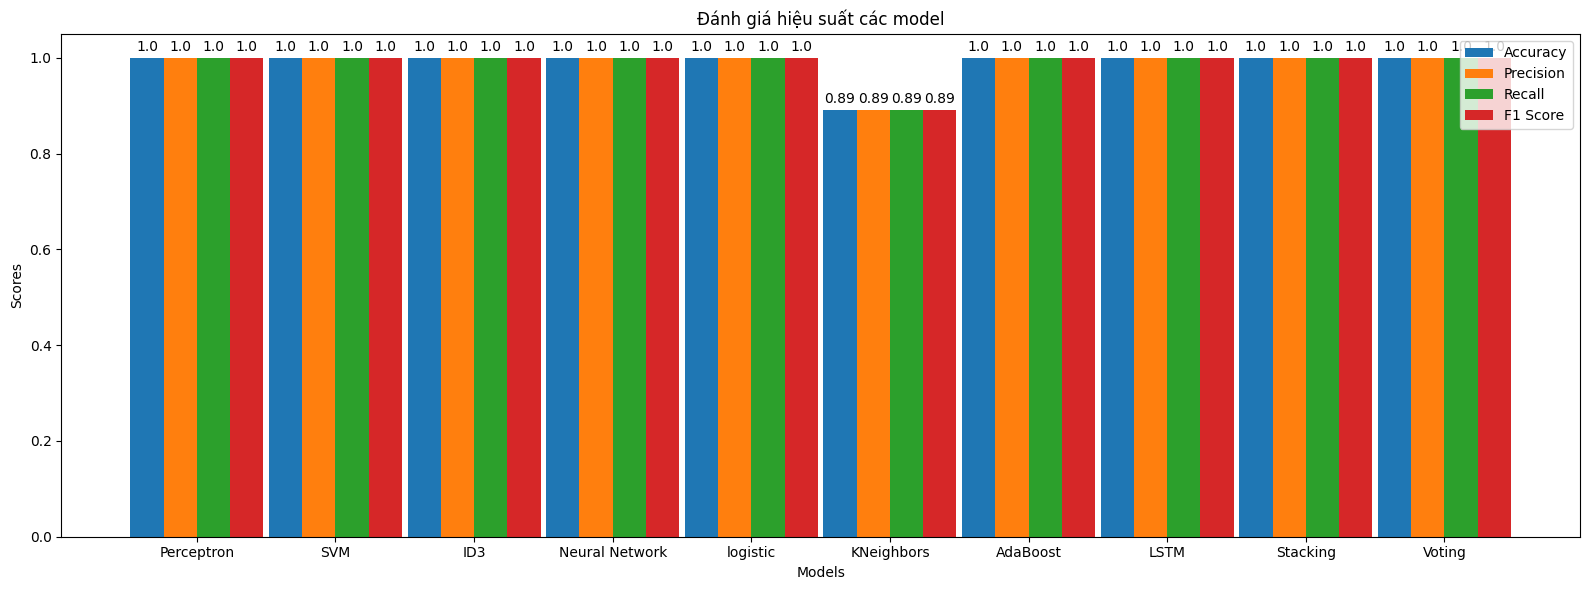

In [2034]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu giả lập về các mô hình và các metric
models = ['Perceptron', 'SVM', 'ID3', 'Neural Network', 'logistic','KNeighbors','AdaBoost','LSTM','Stacking','Voting']
accuracy = [accuracy_perceptron, accuracy_svm, accuracy_id3,accuracy_MLP, accuracy_logistic,round(accuracy_kn,2),accuracy_adaboost,accuracy_lstm,accuracy_stacking,accuracy_voting]
precision = [precision_perceptron, precision_svm, precision_id3,precision_MLP, precision_logistic,round(precision_kn,2),precision_adaboost,precision_lstm,precision_stacking,precision_voting]
recall = [recall_perceptron, recall_svm,recall_id3,recall_MLP, recall_logistic,round(recall_kn,2),recall_adaboost,recall_lstm,recall_stacking,recall_voting]
f1_score = [f1_perceptron, f1_svm, f1_id3,f1_MLP, f1_logistic,round(f1_kn,2),f1_adaboost,f1_lstm,f1_stacking,f1_voting]

# Tạo một biểu đồ
x = np.arange(len(models))  # Tạo các vị trí trên trục x
width = 0.24  # Độ rộng của mỗi thanh

fig, ax = plt.subplots(figsize=(16, 6))

# Vẽ các thanh cho từng metric
rects1 = ax.bar(x - width*1.5, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width/2, precision, width, label='Precision')
rects3 = ax.bar(x + width/2, recall, width, label='Recall')
rects4 = ax.bar(x + width*1.5, f1_score, width, label='F1 Score')

# Thêm các thông tin cho biểu đồ
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Đánh giá hiệu suất các model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Hiển thị giá trị trên đầu các thanh
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

# Hiển thị biểu đồ
plt.show()


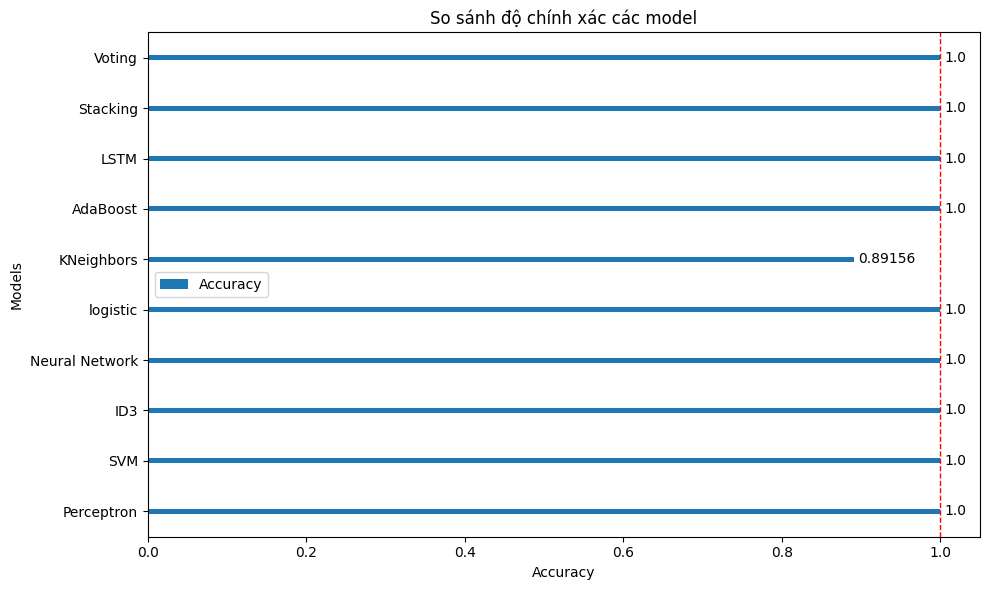

In [2035]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu giả lập về các mô hình và độ chính xác
models = ['Perceptron', 'SVM', 'ID3','Neural Network', 'logistic','KNeighbors','AdaBoost','LSTM','Stacking','Voting']
accuracy = [accuracy_perceptron, accuracy_svm, accuracy_id3,accuracy_MLP,accuracy_logistic,round(accuracy_kn,5),
            accuracy_adaboost,accuracy_lstm, accuracy_stacking,accuracy_voting]  # Thay thế bằng các biến accuracy_perceptron, accuracy_svm nếu cần

# Tạo một biểu đồ
y = np.arange(len(models))  # Tạo các vị trí trên trục y
width = 0.1  # Độ rộng của mỗi thanh

fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ các thanh cho độ chính xác
rects = ax.barh(y, accuracy, width, label='Accuracy')

# Thêm các thông tin cho biểu đồ
ax.set_xlabel('Accuracy')
ax.set_ylabel('Models')
ax.set_title('So sánh độ chính xác các model')
ax.set_yticks(y)
ax.set_yticklabels(models)
ax.legend()

# Hiển thị giá trị trên đầu các thanh
def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        ax.annotate('{}'.format(width),
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center')

autolabel(rects)

# Kẻ vạch dọc cho model có độ chính xác cao nhất
max_accuracy = max(accuracy)
ax.axvline(max_accuracy, color='red', linestyle='--', linewidth=1)

fig.tight_layout()

# Hiển thị biểu đồ
plt.show()


## Dự đoán bằng dữ liệu triệu chứng trên mạng

### Cào dữ liệu trên các trang trên google

In [238]:
# import requests
# from bs4 import BeautifulSoup
# from urllib.parse import urlparse
# import pandas as pd
# import time
# import random
# import warnings

# warnings.filterwarnings("ignore")

# def is_valid_url(url):
#     try:
#         result = urlparse(url)
#         return all([result.scheme, result.netloc])
#     except ValueError:
#         return False

# def get_google_links(query, num_pages=10):
#     headers = {'User-Agent': 'Mozilla/5.0'}
#     result_links = []

#     for page in range(num_pages):
#         url = f"https://www.google.com/search?q={query}&start={page * 10}"
#         response = requests.get(url, headers=headers, timeout=10)

#         if response.status_code == 200:
#             soup = BeautifulSoup(response.text, 'html.parser')
#             links = soup.find_all('a')
#             for link in links:
#                 href = link.get('href')
#                 if href.startswith('/url?q='):
#                     url = href.split('/url?q=')[1].split('&sa=')[0]
#                     if is_valid_url(url) and 'youtube.com' not in url:
#                         result_links.append(url)

#         time.sleep(random.uniform(2, 5))

#     return result_links

# def get_content_from_url(url):
#     try:
#         response = requests.get(url)
#         if response.status_code == 200:
#             soup = BeautifulSoup(response.content, 'html.parser')
#             paragraphs = []
            
#             # Get content from specific tags
#             for tag in ['article', 'div']:
#                 for content in soup.find_all(tag):
#                     if 'class' in content.attrs:
#                         class_list = content.attrs['class']
#                         if any(cls in class_list for cls in ['main-content', 'article-content', 'content-body']):
#                             paragraphs.extend([p.text for p in content.find_all('p')])
            
#             # Fallback to getting all paragraphs if no specific content found
#             if not paragraphs:
#                 paragraphs = [p.text for p in soup.find_all('p')]
            
#             text = ' '.join(paragraphs)
#             import re

#             # Remove unwanted words and email addresses
#             unwanted_words = ["share", "hotline", "Google"]
#             for word in unwanted_words:
#                 text = re.sub(r'\b' + re.escape(word) + r'\b', '', text)

#             # Remove email addresses
#             text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)   
#             return text.encode('utf-8', errors='ignore').decode('utf-8')
#         else:
#             print(f"Failed to fetch the content from {url}")
#             return ''
#     except requests.RequestException as e:
#         print(f"Error fetching {url}: {e}")
#         return ''

# def main(queries, num_pages=10):
#     all_data = {}

#     for query in queries:
#         print(f"Fetching results for query: {query}")
#         google_links = get_google_links(query, num_pages=num_pages)
#         print(f"Found {len(google_links)} links for query: {query}")
#         all_contents = [get_content_from_url(url) for url in google_links]
#         all_data[query] = all_contents

#     df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in all_data.items()]))
#     filename = 'heart.xlsx'
#     df.to_excel(filename, index=False)

# if __name__ == "__main__":
#     queries = ["Triệu chứng Bệnh động mạch vành","Nguyên nhân Bệnh động mạch vành", "Triệu chứng Nhồi máu cơ tim","Nguyên nhân Nhồi máu cơ tim","Nguyên nhân Suy tim", "Triệu chứng Suy tim","Nguyên nhân Rối loạn nhịp tim", "Triệu chứng Rối loạn nhịp tim"]
#     main(queries, num_pages=10)


In [ ]:
# # Import các thư viện cần thiết
# import requests  # Thư viện để gửi yêu cầu HTTP
# from bs4 import BeautifulSoup  # Thư viện để phân tích HTML
# from urllib.parse import urlparse  # Thư viện để phân tích và xác minh URL
# import pandas as pd  # Thư viện để xử lý và lưu trữ dữ liệu dạng bảng
# import time  # Thư viện để sử dụng hàm sleep
# import random  # Thư viện để tạo độ trễ ngẫu nhiên
# import warnings  # Thư viện để quản lý các cảnh báo

# # Tắt các cảnh báo không cần thiết
# warnings.filterwarnings("ignore")

# # Hàm kiểm tra tính hợp lệ của URL
# def is_valid_url(url):
#     try:
#         result = urlparse(url)  # Phân tích URL
#         return all([result.scheme, result.netloc])  # Kiểm tra URL có scheme và netloc
#     except ValueError:
#         return False  # Trả về False nếu URL không hợp lệ

# # Hàm lấy các liên kết từ Google
# def get_google_links(query, num_pages=10):
#     headers = {'User-Agent': 'Mozilla/5.0'}  # Tiêu đề yêu cầu HTTP
#     result_links = []  # Danh sách lưu các liên kết tìm được

#     for page in range(num_pages):  # Lặp qua số trang kết quả tìm kiếm
#         url = f"https://www.google.com/search?q={query}&start={page * 10}"  # Tạo URL tìm kiếm
#         response = requests.get(url, headers=headers, timeout=10)  # Gửi yêu cầu HTTP tới Google

#         if response.status_code == 200:  # Nếu yêu cầu thành công
#             soup = BeautifulSoup(response.text, 'html.parser')  # Phân tích HTML của trang kết quả
#             links = soup.find_all('a')  # Tìm tất cả các thẻ <a>
#             for link in links:
#                 href = link.get('href')  # Lấy thuộc tính href của thẻ <a>
#                 if href.startswith('/url?q='):  # Kiểm tra liên kết bắt đầu với '/url?q='
#                     url = href.split('/url?q=')[1].split('&sa=')[0]  # Trích xuất URL thực tế
#                     if is_valid_url(url) and 'youtube.com' not in url:  # Kiểm tra URL hợp lệ và không phải YouTube
#                         result_links.append(url)  # Thêm URL vào danh sách kết quả

#         time.sleep(random.uniform(2, 5))  # Tạo độ trễ ngẫu nhiên giữa các yêu cầu

#     return result_links  # Trả về danh sách các liên kết tìm được

# # Hàm lấy nội dung từ URL
# def get_content_from_url(url):
#     try:
#         response = requests.get(url)  # Gửi yêu cầu HTTP tới URL
#         if response.status_code == 200:  # Nếu yêu cầu thành công
#             soup = BeautifulSoup(response.content, 'html.parser')  # Phân tích HTML của trang
#             paragraphs = []  # Danh sách lưu các đoạn văn bản

#             # Lấy nội dung từ các thẻ article và div có class phù hợp
#             for tag in ['article', 'div']:
#                 for content in soup.find_all(tag):
#                     if 'class' in content.attrs:
#                         class_list = content.attrs['class']
#                         if any(cls in class_list for cls in ['main-content', 'article-content', 'content-body']):
#                             paragraphs.extend([p.text for p in content.find_all('p')])

#             # Nếu không tìm thấy nội dung cụ thể, lấy tất cả các đoạn văn bản
#             if not paragraphs:
#                 paragraphs = [p.text for p in soup.find_all('p')]

#             text = ' '.join(paragraphs)  # Nối các đoạn văn thành một chuỗi
#             import re  # Thư viện để xử lý biểu thức chính quy

#             # Loại bỏ các từ không mong muốn
#             unwanted_words = ["share", "hotline", "Google"]
#             for word in unwanted_words:
#                 text = re.sub(r'\b' + re.escape(word) + r'\b', '', text)

#             # Loại bỏ địa chỉ email
#             text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)   
#             return text.encode('utf-8', errors='ignore').decode('utf-8')  # Trả về chuỗi văn bản sau khi mã hóa và giải mã để loại bỏ ký tự không hợp lệ
#         else:
#             print(f"Failed to fetch the content from {url}")  # In thông báo lỗi nếu yêu cầu không thành công
#             return ''
#     except requests.RequestException as e:
#         print(f"Error fetching {url}: {e}")  # In thông báo lỗi nếu có ngoại lệ
#         return ''

# # Hàm chính để thực thi
# def main(queries, num_pages=10):
#     all_data = {}  # Từ điển lưu trữ kết quả

#     for query in queries:  # Lặp qua các từ khóa tìm kiếm
#         print(f"Fetching results for query: {query}")
#         google_links = get_google_links(query, num_pages=num_pages)  # Lấy các liên kết từ Google
#         print(f"Found {len(google_links)} links for query: {query}")
#         all_contents = [get_content_from_url(url) for url in google_links]  # Lấy nội dung từ các liên kết
#         all_data[query] = all_contents  # Lưu kết quả vào từ điển

#     # Chuyển đổi dữ liệu từ từ điển sang DataFrame và lưu vào file Excel
#     df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in all_data.items()]))
#     filename = 'heart.xlsx'
#     df.to_excel(filename, index=False)

# # Chạy chương trình
# if __name__ == "__main__":
#     queries = ["Triệu chứng Bệnh động mạch vành","Nguyên nhân Bệnh động mạch vành", "Triệu chứng Nhồi máu cơ tim","Nguyên nhân Nhồi máu cơ tim","Nguyên nhân Suy tim", "Triệu chứng Suy tim","Nguyên nhân Rối loạn nhịp tim", "Triệu chứng Rối loạn nhịp tim"]
#     main(queries, num_pages=10)


### Tiền xử lý dữ liệu văn bản

In [239]:
queries = ["Triệu chứng Bệnh động mạch vành","Nguyên nhân Bệnh động mạch vành", "Triệu chứng Nhồi máu cơ tim","Nguyên nhân Nhồi máu cơ tim","Nguyên nhân Suy tim", "Triệu chứng Suy tim","Nguyên nhân Rối loạn nhịp tim", "Triệu chứng Rối loạn nhịp tim"]
    
# # Loại bỏ "Triệu chứng " và "Nguyên nhân " từ mỗi truy vấn
# queries = [query.replace("Triệu chứng ", "").replace("Nguyên nhân ", "") for query in queries]

# # Remove "Triệu chứng " and "Nguyên nhân " from each query
# queries = [query.replace("Triệu chứng ", "") for query in queries]
# queries = [query.replace("Nguyên nhân ", "") for query in queries]

# # Remove duplicate queries
# queries = list(set(queries))

# print(queries)


In [240]:
queries

['Triệu chứng Bệnh động mạch vành',
 'Nguyên nhân Bệnh động mạch vành',
 'Triệu chứng Nhồi máu cơ tim',
 'Nguyên nhân Nhồi máu cơ tim',
 'Nguyên nhân Suy tim',
 'Triệu chứng Suy tim',
 'Nguyên nhân Rối loạn nhịp tim',
 'Triệu chứng Rối loạn nhịp tim']

In [241]:
import pandas as pd

# Tạo DataFrame với dữ liệu bạn cung cấp
df = pd.read_excel('heart.xlsx', engine='openpyxl')
# Tạo DataFrame mới từ việc "stack" các cột và tạo thành các cột mới "Thông số" và "Nhãn"
df = pd.DataFrame(df[queries].stack(), columns=['Triệu chứng'])
df['Bệnh'] = df.index.get_level_values(1)
df.index = range(len(df))

# Kết hợp ngẫu nhiên các hàng
df = df.sample(frac=1).reset_index(drop=True)
# Loại bỏ các chuỗi 'Nguyên nhân ' và 'Triệu chứng ' từ cột 'Bệnh'
df['Bệnh'] = df['Bệnh'].str.replace('Nguyên nhân ', '').str.replace('Triệu chứng ', '')
df


,Triệu chứng,Bệnh
0,"\nTìm Hiểu Bệnh\n Hiểu đúng, nhận biết sớm về ...",Suy tim
1,Rối loạn nhịp tim là tình trạng nhịp tim nhanh...,Rối loạn nhịp tim
2,\n\n \n1. Triệu chứng rối loạn nhịp tim \n\t...,Rối loạn nhịp tim
3,Multimedia Emagazine Video Infographic Bệ...,Bệnh động mạch vành
4,Tim là một trong những cơ quan rất quan trọng...,Nhồi máu cơ tim
...,...,...
625,Trang chủ » Tim Mạch » Bệnh mạch vành: dấu hiệ...,Bệnh động mạch vành
626,Learn more about\n's Product Experts Program,Bệnh động mạch vành
627,"Nếu không phát hiện kịp thời, bệnh động mạch ...",Bệnh động mạch vành
628,Đã thêm sản phẩm vào giỏ thuốc \n\n Chọn tỉnh...,Rối loạn nhịp tim


In [242]:
import pandas as pd
from pyvi import ViTokenizer

def filter_text(text):
    
    words = ViTokenizer.tokenize(text).split()
    if len(words) <= 50:
        return False
    else:
        return True

# Lọc dữ liệu
filtered_df = df[df['Triệu chứng'].apply(lambda x: filter_text(str(x)))]

df = filtered_df
df


,Triệu chứng,Bệnh
0,"\nTìm Hiểu Bệnh\n Hiểu đúng, nhận biết sớm về ...",Suy tim
1,Rối loạn nhịp tim là tình trạng nhịp tim nhanh...,Rối loạn nhịp tim
2,\n\n \n1. Triệu chứng rối loạn nhịp tim \n\t...,Rối loạn nhịp tim
3,Multimedia Emagazine Video Infographic Bệ...,Bệnh động mạch vành
4,Tim là một trong những cơ quan rất quan trọng...,Nhồi máu cơ tim
...,...,...
624,“Suy tim mạn tính: Các dấu hiệu nhận biết” đượ...,Suy tim
625,Trang chủ » Tim Mạch » Bệnh mạch vành: dấu hiệ...,Bệnh động mạch vành
627,"Nếu không phát hiện kịp thời, bệnh động mạch ...",Bệnh động mạch vành
628,Đã thêm sản phẩm vào giỏ thuốc \n\n Chọn tỉnh...,Rối loạn nhịp tim


In [243]:
from pyvi import ViTokenizer, ViUtils
from sklearn.feature_extraction.text import TfidfVectorizer
import string

# Đọc nội dung từ file vietnamese-stopwords.txt
with open("vietnamese-stopwords.txt", "r", encoding="utf-8") as file:
    vietnamese_stopwords = file.read().splitlines()

# Đọc nội dung từ file stop_words_english.txt
with open("stop_words_english.txt", "r", encoding="utf-8") as file:
    english_stopwords = file.read().splitlines()

# Kết hợp hai danh sách từ dừng lại với nhau
combined_stopwords = vietnamese_stopwords + english_stopwords

# Loại bỏ các từ trùng lặp (nếu có)
stopwords = list(set(combined_stopwords))

# Lưu nội dung kết hợp vào file stop_word.txt
with open("stop_word.txt", "w", encoding="utf-8") as file:
    file.write('\n'.join(stopwords))





# Danh sách các dòng văn bản mẫu
texts = df['Triệu chứng']

# Danh sách các ký tự đặc biệt cần loại bỏ
special_chars = string.punctuation + '1234567890' + '»'+'®'+'®'  # Thêm '>>' vào danh sách

# Loại bỏ từ chỉ chứa chữ cái riêng lẻ
processed_texts = []
for text in texts:
    # Chuyển đổi chữ thường
    text = text.lower()
    # Loại bỏ dấu câu và ký tự đặc biệt
    text = text.translate(str.maketrans('', '', special_chars))
    # Tokenize văn bản
    tokens = ViTokenizer.tokenize(text).split()
    # Loại bỏ từ dừng và từ chỉ chứa chữ cái riêng lẻ
    filtered_tokens = [word for word in tokens if word not in stopwords and len(word) > 1]
    processed_texts.append(' '.join(filtered_tokens))
df['Triệu chứng'] = processed_texts
df




,Triệu chứng,Bệnh
0,tìm_hiểu bệnh hiểu đúng nhận_biết sớm bệnh suy...,Suy tim
1,rối_loạn nhịp tim tình_trạng nhịp tim nhanh ch...,Rối loạn nhịp tim
2,triệu_chứng rối_loạn nhịp tim rối_loạn nhịp ti...,Rối loạn nhịp tim
3,multimedia emagazine video infographic bệnh mạ...,Bệnh động mạch vành
4,tim cơ_quan quan_trọng cơ_thể nhiệm_vụ tim bơm...,Nhồi máu cơ tim
...,...,...
624,suy tim mạn tính dấu_hiệu nhận_biết tư_vấn chu...,Suy tim
625,trang_chủ tim_mạch bệnh mạch vành dấu_hiệu ngu...,Bệnh động mạch vành
627,phát_hiện kịp_thời bệnh động_mạch_vành có_thể ...,Bệnh động mạch vành
628,thêm sản_phẩm giỏ thuốc chọn tỉnh_thành quận h...,Rối loạn nhịp tim


In [244]:
df['bệnh_gốc']=df['Bệnh']

In [245]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
custom_order=queries
# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()
label_encoder.classes_ = custom_order

In [246]:
# Fit và chuyển đổi dữ liệu
df['Bệnh'] = label_encoder.fit_transform(df['bệnh_gốc'])

# Hiển thị DataFrame đã được chuẩn hóa
df


,Triệu chứng,Bệnh,bệnh_gốc
0,tìm_hiểu bệnh hiểu đúng nhận_biết sớm bệnh suy...,3,Suy tim
1,rối_loạn nhịp tim tình_trạng nhịp tim nhanh ch...,2,Rối loạn nhịp tim
2,triệu_chứng rối_loạn nhịp tim rối_loạn nhịp ti...,2,Rối loạn nhịp tim
3,multimedia emagazine video infographic bệnh mạ...,0,Bệnh động mạch vành
4,tim cơ_quan quan_trọng cơ_thể nhiệm_vụ tim bơm...,1,Nhồi máu cơ tim
...,...,...,...
624,suy tim mạn tính dấu_hiệu nhận_biết tư_vấn chu...,3,Suy tim
625,trang_chủ tim_mạch bệnh mạch vành dấu_hiệu ngu...,0,Bệnh động mạch vành
627,phát_hiện kịp_thời bệnh động_mạch_vành có_thể ...,0,Bệnh động mạch vành
628,thêm sản_phẩm giỏ thuốc chọn tỉnh_thành quận h...,2,Rối loạn nhịp tim


In [247]:
# Vector hóa văn bản bằng TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['Triệu chứng'])

print("Tokens after preprocessing:", df['Triệu chứng'])
print("TF-IDF Matrix:\n", tfidf_matrix.toarray())

Tokens after preprocessing: 0      tìm_hiểu bệnh hiểu đúng nhận_biết sớm bệnh suy...
1      rối_loạn nhịp tim tình_trạng nhịp tim nhanh ch...
2      triệu_chứng rối_loạn nhịp tim rối_loạn nhịp ti...
3      multimedia emagazine video infographic bệnh mạ...
4      tim cơ_quan quan_trọng cơ_thể nhiệm_vụ tim bơm...
                             ...                        
624    suy tim mạn tính dấu_hiệu nhận_biết tư_vấn chu...
625    trang_chủ tim_mạch bệnh mạch vành dấu_hiệu ngu...
627    phát_hiện kịp_thời bệnh động_mạch_vành có_thể ...
628    thêm sản_phẩm giỏ thuốc chọn tỉnh_thành quận h...
629    share viết tư_vấn chuyên_môn thạc_sĩ bác_sĩ lã...
Name: Triệu chứng, Length: 552, dtype: object
TF-IDF Matrix:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [249]:
# Lưu DataFrame vào file Excel
df.to_excel('data_train.xlsx', index=False)

### Mô hình

#### Xây dựng mô hình

##### SVM

In [250]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.metrics import classification_report

X = tfidf_matrix  # Chuyển đổi văn bản thành ma trận TF-IDF.Mỗi dòng là một văn bản

label=df['Bệnh']
# Tạo và huấn luyện mô hình SVM

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2, random_state=42)

from gridsearchCV import perform_grid_search


# Định nghĩa lưới các tham số cần thử
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

# Tạo một đối tượng GridSearchCV
grid_search,best_model_svm_nlp, best_params, best_score = perform_grid_search(SVC(), param_grid, X_train,y_train)
# Thực hiện tìm kiếm trên lưới tham số
best_model_svm_nlp.fit(X_train, y_train)

# In ra tham số tốt nhất đã được tìm thấy
print("Tham số tốt nhất:", best_params)

# Dùng tham số tốt nhất để đánh giá mô hình
accuracy_svm_nlp = best_model_svm_nlp.score(X_test, y_test)
print("Độ chính xác trên tập kiểm tra với tham số tốt nhất:", accuracy_svm_nlp)

# Dự đoán nhãn cho tập kiểm tra để xem các chỉ số khác nhau như precision, recall, f1-score
y_pred = best_model_svm_nlp.predict(X_test)
report = classification_report(y_test, y_pred)
print("Báo cáo phân loại trên tập kiểm tra:\n", report)



Tham số tốt nhất: {'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}
Độ chính xác trên tập kiểm tra với tham số tốt nhất: 0.9819819819819819
Báo cáo phân loại trên tập kiểm tra:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.97      0.97      0.97        31
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        36

    accuracy                           0.98       111
   macro avg       0.98      0.98      0.98       111
weighted avg       0.98      0.98      0.98       111



In [251]:
from joblib import dump, load
# Lưu model và các tham số của nó
dump(best_model_svm_nlp, 'best_model_svm_nlp.joblib')

['best_model_svm_nlp.joblib']

##### LogisticRegression

In [252]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Định nghĩa không gian tham số
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}


# Tạo đối tượng GridSearchCV với 5-fold cross-validation
from gridsearchCV import perform_grid_search
grid_search,best_model_Logistic_nlp, best_params, best_score = perform_grid_search(LogisticRegression(), param_grid, X_train,y_train)
# Huấn luyện GridSearchCV trên tập huấn luyện
grid_search.fit(X_train, y_train)

# In ra các tham số tốt nhất_
print("Best parameters found: ", best_params)

# Đánh giá hiệu suất trên tập kiểm tra
accuracy_Logistic_nlp = best_model_Logistic_nlp.score(X_test, y_test)
print("Độ chính xác trên tập kiểm tra (Logistic Regression):", accuracy_Logistic_nlp)

# Dự đoán nhãn cho tập kiểm tra để xem các chỉ số khác nhau như precision, recall, f1-score
y_pred_logistic = best_model_Logistic_nlp.predict(X_test)
report_logistic = classification_report(y_test, y_pred_logistic)
print("Báo cáo phân loại (Logistic Regression):\n", report_logistic)


Best parameters found:  {'C': 100, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}
Độ chính xác trên tập kiểm tra (Logistic Regression): 0.972972972972973
Báo cáo phân loại (Logistic Regression):
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        31
           1       0.94      0.97      0.95        31
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        36

    accuracy                           0.97       111
   macro avg       0.98      0.98      0.98       111
weighted avg       0.97      0.97      0.97       111



In [253]:
from joblib import dump, load
# Lưu model và các tham số của nó
dump(best_model_Logistic_nlp, 'best_model_Logistic_nlp.joblib')

['best_model_Logistic_nlp.joblib']

##### MLPClassifier

In [254]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from gridsearchCV import perform_grid_search

# Định nghĩa không gian tham số cho MLP
param_grid = {
    'hidden_layer_sizes': [(100, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.05],
}

# Tạo đối tượng GridSearchCV với 5-fold cross-validation
grid_search,best_model_mlp, best_params, best_score = perform_grid_search(MLPClassifier(), param_grid, X_train,y_train)

# Huấn luyện GridSearchCV trên tập huấn luyện
best_model_mlp.fit(X_train, y_train)

# In ra các tham số tốt nhất
print("Best parameters found for MLP: ", best_params)

# Đánh giá hiệu suất trên tập kiểm tra
accuracy_mlp_nlp = best_model_mlp.score(X_test, y_test)
print("Độ chính xác trên tập kiểm tra (MLP):", accuracy_mlp_nlp)

# Dự đoán nhãn cho tập kiểm tra để xem các chỉ số khác nhau như precision, recall, f1-score
y_pred_mlp = best_model_mlp.predict(X_test)
report_mlp = classification_report(y_test, y_pred_mlp)
print("Báo cáo phân loại (MLP):\n", report_mlp)


Best parameters found for MLP:  {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100, 50)}
Độ chính xác trên tập kiểm tra (MLP): 0.963963963963964
Báo cáo phân loại (MLP):
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        31
           1       0.91      0.97      0.94        31
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00        36

    accuracy                           0.96       111
   macro avg       0.97      0.96      0.96       111
weighted avg       0.97      0.96      0.96       111



In [255]:
from joblib import dump, load
# Lưu model và các tham số của nó
dump(best_model_mlp, 'best_model_mlp.joblib')

['best_model_mlp.joblib']

##### học sâu

In [256]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Assuming tfidf_matrix and df are already defined
# Example: tfidf_matrix = TfidfVectorizer().fit_transform(corpus)
# label = df['Bệnh']

X = tfidf_matrix  # Feature matrix from TF-IDF
y = df['Bệnh']    # Labels

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.2, random_state=42)



# Convert labels to categorical one-hot encoding
num_classes = len(set(y_train))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define the deep learning model
model_MLP_nlp = Sequential([
    ### một lớp kết nối
    Dense(512, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
# Compile the model
model_MLP_nlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_MLP_nlp.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test data
loss, accuracy_MLP = model_MLP_nlp.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy_MLP:.4f}")

# Predict the labels for the test set
y_pred = model_MLP_nlp.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
y_test_classes = y_test.argmax(axis=-1)




Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.4513 - loss: 1.3386 - val_accuracy: 0.7928 - val_loss: 1.1095
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7873 - loss: 0.9507 - val_accuracy: 0.8919 - val_loss: 0.5853
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9351 - loss: 0.4213 - val_accuracy: 0.8919 - val_loss: 0.2922
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9755 - loss: 0.1466 - val_accuracy: 0.9550 - val_loss: 0.1559
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9726 - loss: 0.0834 - val_accuracy: 0.9459 - val_loss: 0.1351
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9861 - loss: 0.0484 - val_accuracy: 0.9550 - val_loss: 0.1272
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9845 - loss: 0.0547 - val_accuracy: 0.9099 - val_loss: 0.1864
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9859 - loss: 0.0291 - val_accuracy: 0.9550 - v

In [257]:
# Lưu model và các tham số của nó
model_MLP_nlp.save('model_MLP_nlp.h5')

In [258]:
accuracy_nlp=(accuracy_svm_nlp+accuracy_Logistic_nlp+accuracy_MLP+accuracy_mlp_nlp)/4
accuracy_nlp

0.9662162093697367

In [259]:
# Lưu kết quả xuống file
dump(accuracy_nlp, 'accuracy_nlp.joblib')

['accuracy_nlp.joblib']

In [260]:
# import numpy as np

# # Nhập văn bản từ người dùng
# trieu_chung = input()
# tieu_su = input()
# thoi_quen = input()


In [261]:
# new_text=f"Triệu Chứng: {}\nTiểu sử bệnh: {}\nThói quen sống: {}"

In [262]:
# # Dự đoán nhãn cho đoạn văn bản mới
# new_text_vectorized = vectorizer.transform([new_text])
# svm_prediction = best_model.predict(new_text_vectorized)
# print("Dự đoán (SVM) với tham số tốt nhất:", svm_prediction)

# print("Dự đoán (SVM):", svm_prediction)
# # Dự đoán nhãn cho đoạn văn bản mới
# new_text_vectorized = vectorizer.transform([new_text])
# logistic_prediction = logistic_model.predict(new_text_vectorized)

# print("Dự đoán (Logistic Regression):", logistic_prediction)
# def predict_new_text(new_text):
#     new_text_vectorized = vectorizer.transform([new_text]).toarray()
#     prediction = model.predict(new_text_vectorized)
#     predicted_class = prediction.argmax(axis=-1)
#     predicted_label = encoder.inverse_transform(predicted_class)
#     return predicted_label


# predicted_label = predict_new_text(new_text)
# print("Dự đoán (MLP):", predicted_label)

#### đánh giá mô hình

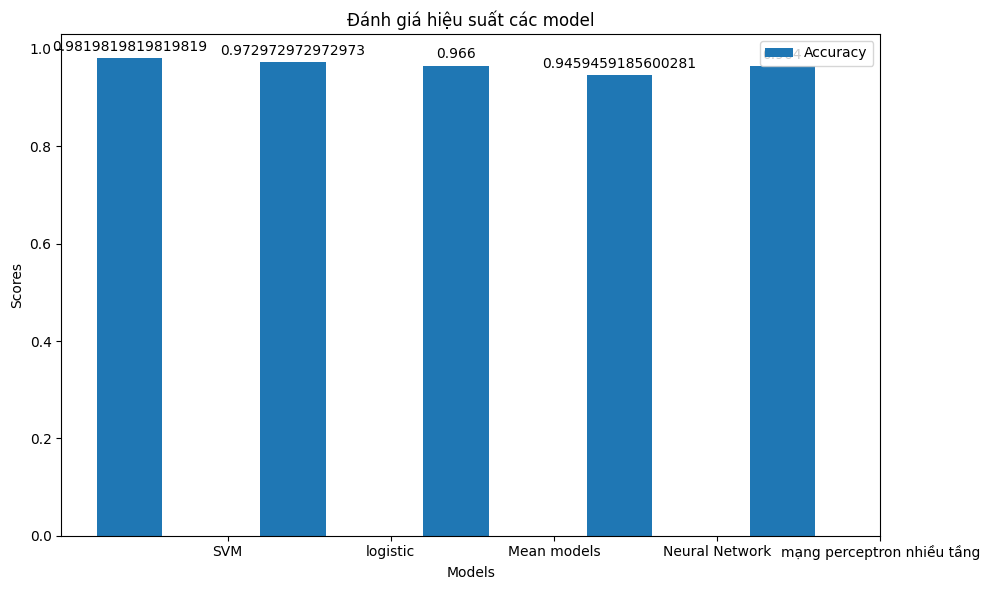

In [263]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu giả lập về các mô hình và các metric
models = ['SVM','logistic','Mean models','Neural Network','mạng perceptron nhiều tầng']
accuracy = [accuracy_svm_nlp,accuracy_Logistic_nlp,round(accuracy_nlp,3),accuracy_MLP,round(accuracy_mlp_nlp,3)]


# Tạo một biểu đồ
x = np.arange(len(models))  # Tạo các vị trí trên trục x
width = 0.4  # Độ rộng của mỗi thanh

fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ các thanh cho từng metric
rects1 = ax.bar(x - width*1.5, accuracy, width, label='Accuracy')


# Thêm các thông tin cho biểu đồ
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Đánh giá hiệu suất các model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Hiển thị giá trị trên đầu các thanh
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)


fig.tight_layout()

# Hiển thị biểu đồ
plt.show()


## Phần mềm

### lấy mô hình tốt nhất

In [2036]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import time
from joblib import dump, load
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv('new_dataset.csv')

X = df.drop(columns=['Heart Attack Risk'])
y = df['Heart Attack Risk']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)
# Creating DataFrames for training and testing data
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Saving to CSV files
train_data.to_csv('Train.csv', index=False)
test_data.to_csv('Test.csv', index=False)
# Initialize models
# logistic_model = LogisticRegression()
# decision_tree_model = DecisionTreeClassifier()
# svm_model = SVC()
# MLP_model = MLPClassifier()
# KNeighbors = KNeighborsClassifier()
# adaboost_model = AdaBoostClassifier()

# Define list of models to test
models = [
    ('Perceptron', load('perceptron.joblib')),
    ('Logistic Regression', load('logistic_model.joblib')),
    ('ID3', load('decision_tree_model.joblib')),
    ('Support Vector Machine', load('svm_model.joblib')),
    ('Neural Network', load('MLP_model.joblib')),
    ('KNeighbors', load('KNeighbors.joblib')),
    ('AdaBoost', load('adaboost_model.joblib'))
]

def get_best_model(models, X_train, y_train, X_test, y_test):
    best_model = None
    best_combined_score = -np.inf
    best_model_name = ""
    
    for name, model in models:
        start_time = time.time() # Start time
        model.fit(X_train, y_train) # Train the model
        
        # Evaluate model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        end_time = time.time() # End time
        elapsed_time = end_time - start_time
        
        # Combine accuracy and time scores
        combined_score = accuracy - elapsed_time
        
        print(f"Model: {name}, Accuracy: {accuracy}, Time: {elapsed_time} seconds, Combined Score: {combined_score}")
        
        # Update best model if current combined score is higher
        if combined_score > best_combined_score:
            best_combined_score = combined_score
            best_model = model
            best_model_name = name
            
    print(f"Best Machine Learning Model: {best_model_name}, Best Combined Score: {best_combined_score}")
    
    return best_model, best_model_name, best_combined_score,accuracy

# Call function and get best model
best_model_ml, model_name_ml, best_score,test_score = get_best_model(models, X_train, y_train, X_test, y_test)

# # Assuming you have defined accuracy_lstm elsewhere
# if accuracy_lstm >= best_score:
#     model_name = 'LSTM'
#     print(f"Best Model: {model_name}, Accuracy: {accuracy_lstm}")
#     test_score = accuracy_lstm
# else:
#     print(f"Best Model: {model_name}")
#     # Evaluate best model on test set
#     test_score = best_model.score(X_test, y_test)
#     print(f"Test Accuracy of Best Model: {test_score}")


Model: Perceptron, Accuracy: 1.0, Time: 0.020841598510742188 seconds, Combined Score: 0.9791584014892578
Model: Logistic Regression, Accuracy: 1.0, Time: 0.05522298812866211 seconds, Combined Score: 0.9447770118713379
Model: ID3, Accuracy: 1.0, Time: 0.007009983062744141 seconds, Combined Score: 0.9929900169372559
Model: Support Vector Machine, Accuracy: 1.0, Time: 0.5681743621826172 seconds, Combined Score: 0.4318256378173828
Model: Neural Network, Accuracy: 1.0, Time: 3.953096628189087 seconds, Combined Score: -2.953096628189087
Model: KNeighbors, Accuracy: 0.8915562913907285, Time: 0.06795549392700195 seconds, Combined Score: 0.8236007974637265
Model: AdaBoost, Accuracy: 1.0, Time: 0.00860738754272461 seconds, Combined Score: 0.9913926124572754
Best Machine Learning Model: ID3, Best Combined Score: 0.9929900169372559


In [2037]:
import pandas as pd
from sklearn.model_selection import train_test_split
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



# Split features and labels
X_data = X
y_data = y

# mảng 3 chiều với hình dạng (số_mẫu, số_bước_thời_gian, số_đặc_trưng)
# Assuming each sample is a sequence of length 1 (no actual time steps)
X_data = X_data.values.reshape((X_data.shape[0], 1, X_data.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# List các mô hình để thử
models_to_try = [
    {
        'name': 'LSTM',
        'model': tf.keras.models.load_model('LSTM.h5')
    }
]

# Huấn luyện và đánh giá các mô hình
results = []

for model_data in models_to_try:
    model = model_data['model']
    model_name = model_data['name']
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    start_time = time.time()
    model.fit(X_train, y_train, epochs=5, batch_size=32)
    end_time = time.time()
    training_time = end_time - start_time
    
    accuracy = model.evaluate(X_test, y_test)[1]
    
    results.append({
        'model':model,
        'name': model_name,
        'accuracy': accuracy,
        'training_time': training_time
    })

# Tìm mô hình có độ chính xác cao nhất và thời gian chạy thấp nhất
best_model_deep = max(results, key=lambda x: x['accuracy'] / x['training_time'])
print("Model:", best_model_deep['model'])
print("Best Model:", best_model_deep['name'])
print("Accuracy:", best_model_deep['accuracy'])
print("Training Time:", best_model_deep['training_time'])


Epoch 1/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 1.0000 - loss: 0.0060
Epoch 2/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0012
Epoch 3/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 6.5149e-04
Epoch 4/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 3.3335e-04
Epoch 5/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 2.2097e-04
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 1.0000 - loss: 1.7826e-04 
Model: <Sequential name=sequential_2, built=True>
Best Model: LSTM
Accuracy: 1.0
Training Time: 3.053184986114502


In [2038]:
# Assuming you have defined accuracy_lstm elsewhere
if (best_model_deep['accuracy']-best_model_deep['training_time']) > best_score:
    model_name = best_model_deep['name']
    print(f"Best Model: {model_name}, Accuracy: {best_model_deep['accuracy']}")
    test_score = best_model_deep['accuracy']
    best_model=best_model_deep['model']
else:
    model_name=model_name_ml
    best_model=best_model_ml
    print(f"Best Model: {model_name}")
    # Evaluate best model on test set
    print(f"Test Accuracy of Best Model: {test_score}")
    from joblib import dump, load
    dump(best_model, 'best_model.joblib')
    # Lưu kết quả xuống file
    dump(test_score, 'test_score.joblib')
    dump(model_name, 'model_name.joblib')

Best Model: ID3
Test Accuracy of Best Model: 1.0


### Tạo phần mềm

In [1]:
from tkinter import *
from tkinter import messagebox
from tkinter import ttk
from PIL import Image, ImageTk
import tkinter as tk


In [2]:
#Tạo form
form = tk.Tk()
##đầu đề form
form.title("Dự đoán nguy cơ bệnh tim")
form.geometry("1600x1600")
# Thiết lập màu nền cho cửa sổ
form.configure(background="lightblue")


In [3]:
lable_info = Label(form, text = "Nhập thông tin cho người bệnh:", font=("Arial Bold", 15), fg="blue", bg='lightblue')
lable_info.grid(row = 1, column=2, columnspan=2, padx=40, pady=10)
# Age
lable_Age = Label(form, text="Age:", font=("Arial Bold", 15),bg='lightblue', fg="black")
lable_Age.grid(row=2, column=1, padx=40, pady=10)
textbox_Age = Entry(form, font=("Arial Bold", 15))
textbox_Age.grid(row=2, column=2, padx=40, pady=10)

# Sex
lable_Sex = Label(form, text="Sex:", font=("Arial Bold", 15),bg='lightblue', fg="black")
lable_Sex.grid(row=2, column=3, padx=40, pady=10)
textbox_Sex = Entry(form, font=("Arial Bold", 15))
textbox_Sex.grid(row=2, column=4, padx=40, pady=10)

# Cholesterol
lable_Cholesterol = Label(form, text="Cholesterol:", font=("Arial Bold", 15),bg='lightblue', fg="black")
lable_Cholesterol.grid(row=3, column=1, padx=40, pady=10)
textbox_Cholesterol = Entry(form, font=("Arial Bold", 15))
textbox_Cholesterol.grid(row=3, column=2, padx=40, pady=10)

# Blood Pressure
lable_BP = Label(form, text="Blood Pressure:", font=("Arial Bold", 15),bg='lightblue', fg="black")
lable_BP.grid(row=3, column=3, padx=40, pady=10)
textbox_BP = Entry(form, font=("Arial Bold", 15))
textbox_BP.grid(row=3, column=4, padx=40, pady=10)

# Heart Rate
lable_HeartRate = Label(form, text="Heart Rate:", font=("Arial Bold", 15),bg='lightblue', fg="black")
lable_HeartRate.grid(row=4, column=1, padx=40, pady=10)
textbox_HeartRate = Entry(form, font=("Arial Bold", 15))
textbox_HeartRate.grid(row=4, column=2, padx=40, pady=10)

# Diabetes
lable_Diabetes = Label(form, text="Diabetes:", font=("Arial Bold", 15),bg='lightblue', fg="black")
lable_Diabetes.grid(row=4, column=3, padx=40, pady=10)
textbox_Diabetes = Entry(form, font=("Arial Bold", 15))
textbox_Diabetes.grid(row=4, column=4, padx=40, pady=10)

# Family History
lable_FamilyHistory = Label(form, text="Family History:", font=("Arial Bold", 15),bg='lightblue', fg="black")
lable_FamilyHistory.grid(row=5, column=1, padx=40, pady=10)
textbox_FamilyHistory = Entry(form, font=("Arial Bold", 15))
textbox_FamilyHistory.grid(row=5, column=2, padx=40, pady=10)

# Smoking
lable_Smoking = Label(form, text="Smoking:", font=("Arial Bold", 15),bg='lightblue', fg="black")
lable_Smoking.grid(row=5, column=3, padx=40, pady=10)
textbox_Smoking = Entry(form, font=("Arial Bold", 15))
textbox_Smoking.grid(row=5, column=4, padx=40, pady=10)

# Obesity
lable_Obesity = Label(form, text="Obesity:", font=("Arial Bold", 15),bg='lightblue', fg="black")
lable_Obesity.grid(row=6, column=1, padx=40, pady=10)
textbox_Obesity = Entry(form, font=("Arial Bold", 15))
textbox_Obesity.grid(row=6, column=2, padx=40, pady=10)

# Alcohol Consumption
lable_Alcohol = Label(form, text="Alcohol Consumption:", font=("Arial Bold", 15),bg='lightblue', fg="black")
lable_Alcohol.grid(row=6, column=3, padx=40, pady=10)
textbox_Alcohol = Entry(form, font=("Arial Bold", 15))
textbox_Alcohol.grid(row=6, column=4, padx=40, pady=10)

# Exercise Hours Per Week
lable_Exercise = Label(form, text="Exercise Hours Per Week:", font=("Arial Bold", 15),bg='lightblue', fg="black")
lable_Exercise.grid(row=7, column=1, padx=40, pady=10)
textbox_Exercise = Entry(form, font=("Arial Bold", 15))
textbox_Exercise.grid(row=7, column=2, padx=40, pady=10)

# Diet
lable_Diet = Label(form, text="Diet:", font=("Arial Bold", 15),bg='lightblue', fg="black")
lable_Diet.grid(row=7, column=3, padx=40, pady=10)
textbox_Diet = Entry(form, font=("Arial Bold", 15))
textbox_Diet.grid(row=7, column=4, padx=40, pady=10)

# Previous Heart Problems
lable_PreviousHeart = Label(form, text="Previous Heart Problems:", font=("Arial Bold", 15),bg='lightblue', fg="black")
lable_PreviousHeart.grid(row=8, column=1, padx=40, pady=10)
textbox_PreviousHeart = Entry(form, font=("Arial Bold", 15))
textbox_PreviousHeart.grid(row=8, column=2, padx=40, pady=10)

# Medication Use
lable_Medication = Label(form, text="Medication Use:", font=("Arial Bold", 15),bg='lightblue', fg="black")
lable_Medication.grid(row=8, column=3, padx=40, pady=10)
textbox_Medication = Entry(form, font=("Arial Bold", 15))
textbox_Medication.grid(row=8, column=4, padx=40, pady=10)

# Stress Level
lable_Stress = Label(form, text="Stress Level:", font=("Arial Bold", 15),bg='lightblue', fg="black")
lable_Stress.grid(row=9, column=1, padx=40, pady=10)
textbox_Stress = Entry(form, font=("Arial Bold", 15))
textbox_Stress.grid(row=9, column=2, padx=40, pady=10)

# Sedentary Hours Per Day
lable_Sedentary = Label(form, text="Sedentary Hours Per Day:", font=("Arial Bold", 15),bg='lightblue', fg="black")
lable_Sedentary.grid(row=9, column=3, padx=40, pady=10)
textbox_Sedentary = Entry(form, font=("Arial Bold", 15))
textbox_Sedentary.grid(row=9, column=4, padx=40, pady=10)


# BMI
lable_BMI = Label(form, text="BMI:", font=("Arial Bold", 15),bg='lightblue', fg="black")
lable_BMI.grid(row=10, column=1, padx=40, pady=10)
textbox_BMI = Entry(form, font=("Arial Bold", 15))
textbox_BMI.grid(row=10, column=2, padx=40, pady=10)

# Triglycerides
lable_Triglycerides = Label(form, text="Triglycerides:", font=("Arial Bold", 15),bg='lightblue', fg="black")
lable_Triglycerides.grid(row=10, column=3, padx=40, pady=10)
textbox_Triglycerides = Entry(form, font=("Arial Bold", 15))
textbox_Triglycerides.grid(row=10, column=4, padx=40, pady=10)

# Physical Activity Days Per Week
lable_PhysicalActivity = Label(form, text="Physical Activity Days Per Week:", font=("Arial Bold", 15),bg='lightblue', fg="black")
lable_PhysicalActivity.grid(row=11, column=1, padx=40, pady=10)
textbox_PhysicalActivity = Entry(form, font=("Arial Bold", 15))
textbox_PhysicalActivity.grid(row=11, column=2, padx=40, pady=10)

# Sleep Hours Per Day
lable_Sleep = Label(form, text="Sleep Hours Per Day:", font=("Arial Bold", 15),bg='lightblue', fg="black")
lable_Sleep.grid(row=11, column=3, padx=40, pady=10)
textbox_Sleep = Entry(form, font=("Arial Bold", 15))
textbox_Sleep.grid(row=11, column=4, padx=40, pady=10)

# Country
lable_Country = Label(form, text="Country:", font=("Arial Bold", 15),bg='lightblue', fg="black")
lable_Country.grid(row=12, column=1, padx=40, pady=10)
textbox_Country = Entry(form, font=("Arial Bold", 15))
textbox_Country.grid(row=12, column=2, padx=40, pady=10)

# Continent
lable_Continent = Label(form, text="Continent:", font=("Arial Bold", 15),bg='lightblue', fg="black")
lable_Continent.grid(row=12, column=3, padx=40, pady=10)
textbox_Continent = Entry(form, font=("Arial Bold", 15))
textbox_Continent.grid(row=12, column=4, padx=40, pady=10)

# Hemisphere
lable_Hemisphere = Label(form, text="Hemisphere:", font=("Arial Bold", 15),bg='lightblue', fg="black")
lable_Hemisphere.grid(row=13, column=1, padx=40, pady=10)
textbox_Hemisphere = Entry(form, font=("Arial Bold", 15))
textbox_Hemisphere.grid(row=13, column=2, padx=40, pady=10)
lable_nguyco = Label(form, text="Mức độ nguy cơ:", font=("Arial Bold", 15),bg='lightblue', fg="black")
lable_nguyco.grid(row=13, column=3, padx=40, pady=10)
textbox_nguyco = Entry(form, font=("Arial Bold", 15))
textbox_nguyco.grid(row=13, column=4, padx=40, pady=10)
lbl = Label(form, text="...", font=("Arial Bold", 15),bg='lightblue', fg="black")
lbl.grid(column=2, row=16)
lable_ac = tk.Label(form, text="...", font=("Arial Bold", 15),bg='lightblue', fg="black")
lable_ac.grid(row=16, column=4, columnspan=2, padx=40, pady=10)


In [4]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import Perceptron
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn import metrics
# import warnings
# warnings.filterwarnings("ignore")
# # Load the dataset
# df = pd.read_csv('new_dataset.csv')

# X = df.iloc[:, :-1]
# y = df['Heart Attack Risk']

# # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

# # Danh sách các model cần kiểm tra
# models = [
#     ('Logistic Regression', logistic_model),
#     ('ID3',decision_tree_model),
#     ('Support Vector Machine', svm_model),
#     ('Perceptron',perceptron),
#     ('Neural Network',MLP_model),
#     ('KNeighbors',KNeighbors),
#     ('AdaBoost',adaboost_model),
   
#     ('Stacking',stacking),
#     ('Voting',voting_model)

# ]

# def get_best_model(models, X_train, y_train, X_test, y_test):
#     best_model = None
#     best_score = -np.inf
#     best_model_name = ""
    
#     for name, model in models:
#         # Huấn luyện model với tập huấn luyện
#         model.fit(X_train, y_train)
        
#         # Đánh giá model với tập kiểm tra
#         y_pred = model.predict(X_test)
#         score=accuracy_score(y_test, y_pred)
#         print(f"Model: {name}, Accuracy: {score}")
        
#         # Cập nhật model tốt nhất nếu điểm số hiện tại tốt hơn
#         if score > best_score:
#             best_score = score
#             best_model = model
#             best_model_name = name
        
            
#     print(f"Mô hình học máy tốt nhất: {best_model_name}, Độ chính xác cao nhất: {best_score}")
    
#     return best_model,best_model_name,best_score

# # Gọi hàm và lấy model tốt nhất
# best_model,model_name,best_score = get_best_model(models, X_train, y_train, X_test, y_test)
# if(accuracy_lstm>=best_score):
#     model_name='LSTM'
#     print(f"Mô hình học sâu:{model_name} , Độ chính xác: {accuracy_lstm}")
#     test_score=accuracy_lstm
# elif(best_score>accuracy_lstm):
#     print(f"Mô hình tốt nhất: {model_name}")
#     # Kiểm tra model tốt nhất trên tập kiểm tra
#     test_score = best_model.score(X_test, y_test)
#     print(f"Test Accuracy of Best Model: {test_score}")


In [5]:
# # Gọi hàm và lấy model tốt nhất
# best_model,model_name,best_score = get_best_model(models, X_train, y_train, X_test, y_test)
# if(accuracy_lstm>=best_score):
#     model_name='LSTM'
#     print(f"Mô hình học sâu:{model_name} , Độ chính xác: {accuracy_lstm}")
#     test_score=accuracy_lstm
# elif(best_score>accuracy_lstm):
#     print(f"Mô hình tốt nhất: {model_name}")
#     # Kiểm tra model tốt nhất trên tập kiểm tra
#     test_score = best_model.score(X_test, y_test)
#     print(f"Test Accuracy of Best Model: {test_score}")

#### Tạo trang 2

In [6]:
import tkinter as tk
from tkinter import Text, Label
from PIL import Image, ImageTk
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from joblib import dump, load
df = pd.read_excel('data_train.xlsx', engine='openpyxl')
# Vector hóa văn bản bằng TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['Triệu chứng'])
def open_new_window():
    

    root = tk.Tk()
    root.title("Dự đoán bệnh tim")
    root.geometry("1200x600")
    root.configure(background="lightblue")
    lbl_benh = Label(root, text="Bệnh: ...", font=("Arial Bold", 15),bg='lightblue', fg="black")
    lbl_benh.grid(column=1, row=5)
    lable_accuracy1 = tk.Label(root, text="Độ chính xác: ...", font=("Arial Bold", 15),bg='lightblue', fg="black")
    lable_accuracy1.grid(row=5, column=2)
    def get_input_texts():
        trieu_chung = entry_Tc.get("1.0", "end-1c")  # Lấy văn bản từ đoạn triệu chứng
        tieu_su = entry_Ts.get("1.0", "end-1c")      # Lấy văn bản từ đoạn tiểu sử bệnh
        thoi_quen = entry_tq.get("1.0", "end-1c")    # Lấy văn bản từ đoạn thói quen sống
        # Thực hiện xử lý tiếp theo với các đoạn văn bản này
        print("Triệu chứng:", trieu_chung)
        print("Tiểu sử:", tieu_su)
        print("Thói quen sống:", thoi_quen)
        if (len(trieu_chung.split())+len(tieu_su.split())+len(thoi_quen.split()))<250:
          messagebox.showinfo("Thông báo", "Bạn cần nhập ít nhất 250 từ!")
        else:  
            new_text = f"Triệu Chứng: {trieu_chung}\nTiểu sử bệnh: {tieu_su}\nThói quen sống: {thoi_quen}"
            # Dự đoán nhãn cho đoạn văn bản mới
            new_text_vectorized = vectorizer.transform([new_text])

            svm_prediction = load('best_model_svm_nlp.joblib').predict(new_text_vectorized)
            logistic_prediction = load('best_model_Logistic_nlp.joblib').predict(new_text_vectorized)
            mlp_prediction = load('best_model_mlp.joblib').predict(new_text_vectorized)

            # 2. Make predictions using the trained MLP model
            y_pred_new = tf.keras.models.load_model('model_MLP_nlp.h5').predict(new_text_vectorized)
            y_pred_classes_new = y_pred_new.argmax(axis=-1)
            
            predicted=(svm_prediction+logistic_prediction+y_pred_classes_new+mlp_prediction)/4
            if np.round(predicted, decimals=0) == 0:
                predicted='Bệnh động mạch vành'
            elif np.round(predicted, decimals=0) == 1:
                predicted='Nhồi máu cơ tim'
            elif np.round(predicted, decimals=0) == 2:
                predicted='Rối loạn nhịp tim'
            elif np.round(predicted, decimals=0) == 3:
                predicted='Suy tim'        
        
        # Display the result
            lbl_benh.configure(text=f"Bệnh: dự đoán là: {predicted} ")
            # lable_ac.configure(accuracy)
            lable_accuracy1.configure(text=f"Độ chính xác: {round(load('accuracy_nlp.joblib')*100,2)}%")
    lbl_Tc = Label(root, text="Triệu chứng", font=("Arial Bold", 15),bg='lightblue', fg="black")
    lbl_Tc.grid(column=0, row=0)
    entry_Tc = Text(root, height=9, width=90)
    entry_Tc.grid(column=1, row=0)

    lbl_Ts = Label(root, text="Tiểu sử bệnh", font=("Arial Bold", 15),bg='lightblue', fg="black")
    lbl_Ts.grid(column=0, row=1)
    entry_Ts = Text(root, height=9, width=90)
    entry_Ts.grid(column=1, row=1)

    lbl_tq = Label(root, text="Thói quen sống", font=("Arial Bold", 15),bg='lightblue', fg="black")
    lbl_tq.grid(column=0, row=2)
    entry_tq = Text(root, height=9, width=90)
    entry_tq.grid(column=1, row=2)

    btn_dudoan = tk.Button(root, text="Dự đoán", command=get_input_texts)
    btn_dudoan.grid(column=1, row=3, columnspan=2, padx=40, pady=10)
    
    
    
#     root.mainloop()

# open_new_window()
    


#### Tạo trang 1

In [7]:
# lbl = Label(form, text="...", font=("Arial Bold", 15),bg='lightblue', fg="black")

# lbl.grid(column=2, row=16)

# Function to validate entries
def validate_entries():
    # Get values from text entry fields
    age = textbox_Age.get()
    sex = textbox_Sex.get()
    cholesterol = textbox_Cholesterol.get()
    blood_pressure = textbox_BP.get()
    heart_rate = textbox_HeartRate.get()
    diabetes = textbox_Diabetes.get()
    family_history = textbox_FamilyHistory.get()
    smoking = textbox_Smoking.get()
    obesity = textbox_Obesity.get()
    alcohol_consumption = textbox_Alcohol.get()
    exercise_hours = textbox_Exercise.get()
    diet = textbox_Diet.get()
    previous_heart_problems = textbox_PreviousHeart.get()
    medication_use = textbox_Medication.get()
    stress_level = textbox_Stress.get()
    sedentary_hours = textbox_Sedentary.get()
    bmi = textbox_BMI.get()
    triglycerides = textbox_Triglycerides.get()
    physical_activity_days = textbox_PhysicalActivity.get()
    sleep_hours = textbox_Sleep.get()
    country = textbox_Country.get()
    continent = textbox_Continent.get()
    hemisphere = textbox_Hemisphere.get()
    muc_đo_nguy_co=textbox_nguyco.get()
    # Check if any field is empty
    if (age == '' or sex == '' or cholesterol == '' or blood_pressure == '' or heart_rate == '' or
        diabetes == '' or family_history == '' or smoking == '' or obesity == '' or
        alcohol_consumption == '' or exercise_hours == '' or diet == '' or previous_heart_problems == '' or
        medication_use == '' or stress_level == '' or sedentary_hours == '' or
        bmi == '' or triglycerides == '' or physical_activity_days == '' or sleep_hours == '' or
        country == '' or continent == '' or hemisphere == ''):
        # Show message if any field is empty
        messagebox.showinfo("Thông báo", "Bạn cần nhập đầy đủ thông tin!")
    else:
      
        
        Systolic, Diastolic = blood_pressure.split('/')
       
        # Convert string inputs to numeric types
        Diastolic = int(Diastolic)
        Systolic = int(Systolic)
        age = int(age)
        sex = int(sex)
        cholesterol = int(cholesterol)
        heart_rate = int(heart_rate)
        diabetes = int(diabetes)
        family_history = int(family_history)
        smoking = int(smoking)
        obesity = int(obesity)
        alcohol_consumption = int(alcohol_consumption)
        diet = int(diet)
        previous_heart_problems = int(previous_heart_problems)
        stress_level = int(stress_level)
        bmi = int(bmi)
        triglycerides = int(triglycerides)
        sleep_hours = float(sleep_hours)
        physical_activity_days=float(physical_activity_days)
        country = int(country)
        continent = int(continent)
        hemisphere = int(hemisphere)
        exercise_hours = float(exercise_hours)
        sedentary_hours = float(sedentary_hours)
        medication_use=int(medication_use)
        
        ABI = ((exercise_hours/7) + ((physical_activity_days*24)/7)) / (sedentary_hours+sleep_hours)
        if 0<=ABI<=0.49:
            ABI=1
        elif 0.49<ABI<=1.5:
            ABI=0
        elif 1.5<ABI<=7:
            ABI=2
        ABI=int(ABI)
        Chi_si_suc_khoe=(Diastolic+Systolic+age  + cholesterol+heart_rate+diet+stress_level+bmi+triglycerides+ABI)/10
        loi_song=(sex+diabetes+family_history+smoking+obesity+alcohol_consumption+previous_heart_problems+medication_use)/8
        moi_truong_song=(country+continent+hemisphere)/3
        Chi_si_suc_khoe=float(Chi_si_suc_khoe)
        loi_song=float(loi_song)
        moi_truong_song=float(moi_truong_song)
        if(muc_đo_nguy_co==''):
            if (0<=Chi_si_suc_khoe<=0.53 and 0<=loi_song<=0.279 and 0<=moi_truong_song<=2.1375) :
                muc_đo_nguy_co = 0
            elif ((0<=Chi_si_suc_khoe<=0.53 and 0<=loi_song<=0.279)or(0<=loi_song<=0.279 and 0<=moi_truong_song<=2.1375)or(0<=Chi_si_suc_khoe<=0.53 and 0<=moi_truong_song<=2.1375)):
                muc_đo_nguy_co = 1
            elif (0<=Chi_si_suc_khoe<=0.53 or 0<=loi_song<=0.279 or 0<=moi_truong_song<=2.1375):
                if (1.05<=Chi_si_suc_khoe<=1.475 or 0.558<=loi_song<=0.779 or 4.275<=moi_truong_song<=5.971):
                    muc_đo_nguy_co = 6
                elif (Chi_si_suc_khoe>1.475 or loi_song>0.779 or moi_truong_song>5.971):
                    muc_đo_nguy_co = 9
                muc_đo_nguy_co = 2
            elif (0.53<=Chi_si_suc_khoe<=1.05 and 0.279<=loi_song<=0.558 and 2.1375<=moi_truong_song<=4.275) :
                muc_đo_nguy_co = 3
            elif ((0.53<=Chi_si_suc_khoe<=1.05 and 0.279<=loi_song<=0.558)or(2.1375<=loi_song<=0.558 and 2.1375<=moi_truong_song<=4.275)or(0.53<=Chi_si_suc_khoe<=1.05 and 2.1375<=moi_truong_song<=4.275 )):
                muc_đo_nguy_co = 4
            elif (0.53<=Chi_si_suc_khoe<=1.05 or 0.279<=loi_song<=0.558 or 2.1375<=moi_truong_song<=4.275):
                if (1.05<=Chi_si_suc_khoe<=1.475 or 0.558<=loi_song<=0.779 or 4.275<=moi_truong_song<=5.971):
                    muc_đo_nguy_co = 6
                elif (Chi_si_suc_khoe>1.475 or loi_song>0.779 or moi_truong_song>5.971):
                    muc_đo_nguy_co = 9
                muc_đo_nguy_co = 5
            elif (1.05<=Chi_si_suc_khoe<=1.475 or 0.558<=loi_song<=0.779 or 4.275<=moi_truong_song<=5.971):
                muc_đo_nguy_co = 6
            elif ((1.05<=Chi_si_suc_khoe<=1.475 and 0.558<=loi_song<=0.779)or(0.558<=loi_song<=0.779 and 4.275<=moi_truong_song<=5.971)or(1.05<=Chi_si_suc_khoe<=1.475 and 4.275<=moi_truong_song<=5.971 )):
                muc_đo_nguy_co = 7
            elif (1.05<=Chi_si_suc_khoe<=1.475 and 0.558<=loi_song<=0.779 and 4.275<=moi_truong_song<=5.971) :
                muc_đo_nguy_co = 8
            elif (Chi_si_suc_khoe>1.475 or loi_song>0.779 or moi_truong_song>5.971):
                muc_đo_nguy_co = 9
            elif ((Chi_si_suc_khoe>1.475 and loi_song>0.779)or(loi_song>0.779 and moi_truong_song>5.971)or(Chi_si_suc_khoe>1.475 and moi_truong_song>5.971)):
                muc_đo_nguy_co = 10
            elif (Chi_si_suc_khoe>1.475 and loi_song>0.779 and moi_truong_song>5.971):
                muc_đo_nguy_co = 11
            muc_đo_nguy_co=float(muc_đo_nguy_co)
        elif (muc_đo_nguy_co!=''):
            muc_đo_nguy_co=float(muc_đo_nguy_co)
        from sklearn.model_selection import train_test_split
        X = pd.read_csv('new_dataset.csv').drop(columns=['Heart Attack Risk'])
        y = pd.read_csv('new_dataset.csv')['Heart Attack Risk']

        # Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)
        accuracy=load('test_score.joblib')*100
        model = load('best_model.joblib').fit(X_train,y_train)
        name_model=load('model_name.joblib')
    # Create a new sample from the user-entered data
        new_data_point = np.array([[age, sex, cholesterol, heart_rate, diabetes,
                                family_history, smoking, obesity, alcohol_consumption,
                                exercise_hours, diet, previous_heart_problems,
                                medication_use, stress_level, sedentary_hours,
                                bmi, triglycerides, physical_activity_days,
                                sleep_hours, country, continent, hemisphere,Systolic,Diastolic,ABI,Chi_si_suc_khoe,loi_song,moi_truong_song,muc_đo_nguy_co]])
    
    # Predict the label of the new sample
        predicted = model.predict(new_data_point)
    
    # Map the predicted label to its corresponding interpretation
        if predicted == 1:
            predicted = 'Có nguy cơ'
            open_new_window()
        elif predicted == 0:
            predicted = 'Không có nguy cơ'
    
    
    # Display the result
        lbl.configure(text=f"dự đoán là: {predicted}")
        # lable_ac.configure(accuracy)
        lable_ac.configure(text=f"{accuracy}% - {name_model}")



In [8]:
# lable_tt = Label(form, text = "Đánh giá mô hình:", font=("Arial Bold", 15), fg="blue")
# lable_tt.grid(row = 1, column = 3, padx = 40, pady = 10)

In [9]:

# def open_new_window():
#     # Tạo cửa sổ mới
#     new_window = tk.Tk()
#     new_window.title("Trang mới")

#     # Hiển thị một nhãn trên cửa sổ mới
#     lable_tt = Label(new_window, text = "Nhập thông tin:", font=("Arial Bold", 15), fg="Red")
#     lable_tt.grid(row = 1, column = 3, padx = 40, pady = 10)
#     lable_tt.pack()
#     # Tạo một nút bấm để chuyển trang
# button = tk.Button(form, text="Chuyển trang", command=open_new_window)
# button.grid(row=0, column=0)

In [10]:


# def open_new_window():
#     root = tk.Tk()
#     root.title("Main Window")
   

# # Tạo cửa sổ chính


# # Tạo nút và gắn hàm open_new_window vào sự kiện nhấn nút
# open_button = tk.Button(form, text="Triệu chứng", command=open_new_window)
# open_button.grid(row=15, column=2, columnspan=2, padx=40, pady=10)




In [11]:
# Create a button to validate entries
predict_button = tk.Button(form, text="Dự đoán", command=validate_entries, font=("Arial Bold", 15))
predict_button.grid(row=14, column=2, columnspan=2, padx=40, pady=10)
lable_predict = tk.Label(form, text="Kết quả", font=("Arial Bold", 15),bg='lightblue', fg="black")
lable_predict.grid(row=16, column=1, columnspan=2, padx=40, pady=10)
lable_accuracy = tk.Label(form, text="Độ chính xác:", font=("Arial Bold", 15),bg='lightblue', fg="black")
lable_accuracy.grid(row=16, column=3, columnspan=2, padx=40, pady=10)



In [12]:
form.mainloop()

C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Triệu chứng: Khó thở: Cảm giác khó thở, đặc biệt là khi nằm xuống hoặc vận động.

Mệt mỏi: Cảm thấy mệt mỏi dễ dàng, kể cả khi không làm việc nặng.

Đau ngực: Đau thắt ngực hoặc cảm giác khó chịu ở vùng ngực.

Chân sưng: Sưng tấy ở chân và mắt.

Nhịp tim không đều: Cảm giác tim đập không đều, nhịp tim chậm hoặc nhanh không đều.
Ho: Có thể có các cơn ho khan hoặc ho có đờm, đặc biệt khi nằm nghiêng lên.

Mất cảm giác: Cảm giác chán ăn, mất cảm giác ngon miệng.

Đau đầu: Do thiếu máu đến não.
Tiểu sử: Bệnh tim mạch: Bao gồm cả bệnh động mạch vành, cao huyết áp, bệnh van tim, viêm màng nội tim, vành và bệnh tim bẩm sinh.

Tiểu đường: Tăng nguy cơ suy tim.

Béo phì: Tăng áp lực lên tim và mạch máu.

Hút thuốc: Thuốc lá có thể làm tắc nghẽn động mạch và gây hại đến tim.
Bệnh thận mãn tính: Do bệnh này gây ra suy tim.

Tuyến giáp bệnh: biểu hiện
Thói quen sống: Thiếu vận động: Không đủ lượng hoạt động thể chất có thể làm suy giảm sức khỏe tim mạch và dẫn đến bệnh suy tim.

Dinh dưỡng không t

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


In [ ]:
# import tkinter as tk

# # Function to simulate prediction (replace this with your actual prediction logic)
# def predict():
#     # Here, I'm using a random value for demonstration purposes
#     return 0

# def open_new_window():
#     predicted_value = predict()
#     if predicted_value == 0:
#         new_window = tk.Toplevel()
#         new_window.title("Trang mới")
#         label_tt = tk.Label(new_window, text="Nhập thông tin:", font=("Arial Bold", 15), fg="Red")
#         label_tt.pack(padx=40, pady=10)

# # Create the main window
# form = tk.Tk()

# # Hide the main window
# form.withdraw()

# # Call open_new_window() when the predicted value is 0
# open_new_window()


# form.mainloop()

In [ ]:
# import tkinter as tk
# from tkinter import Text, Label

# def open_new_window():
#     root = tk.Tk()
#     root.title("Dự đoán bệnh tim")
#     root.geometry("1000x600")
    
#     lbl_Tc = Label(root, text="Triệu chứng", font=("Arial Bold", 15))
#     lbl_Tc.grid(column=0, row=0)
#     entry_Tc = Text(root, height=9, width=90)
#     entry_Tc.grid(column=1, row=0)

#     lbl_Ts = Label(root, text="Tiểu sử bệnh", font=("Arial Bold", 15))
#     lbl_Ts.grid(column=0, row=1)
#     entry_Ts = Text(root, height=9, width=90)
#     entry_Ts.grid(column=1, row=1)

#     lbl_tq = Label(root, text="Thói quen sống", font=("Arial Bold", 15))
#     lbl_tq.grid(column=0, row=2)
#     entry_tq = Text(root, height=9, width=90)
#     entry_tq.grid(column=1, row=2)

#     root.mainloop()

# open_new_window()
